# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.rcParams.update({'font.size': 16})

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

## <span style="color:darkred">  SOLUTION</span>
The reason why T does not conserve its value at the beginning of the simulation is that the starting configuration is not representative of a typical configuration of the given NVE equilibrium state. Since in a NVE system only the total energy of the system is conserved, the potential and kinetic energy are not in general individually conserved. This is what happens at the beginning of the simulation. As the system evolves towards more typical microstates, the potential and kinetic energy (and therefore the temperature, which is proportional to the kinetic energy) evolve towards their equilibrium values.

The results presented below are organized as follows.

For each of the phases to be simulated, the results of the equilibration process and of the simulation proper are shown. The evolution to equilibrium is shown through the temperature. In the plot I showed the temperature as a function of the simulation time steps. I stopped the equilibration procedure when the temperature reached the target value within ±1%. I started the equilibration run from the final configuration of the solid simulation run. Then I run the simulation for 5000 time steps. Since the target temperature was not met, I used the last configuration to start the next 5000 time steps equilibration run. The procedure was repeated until the system reached the target temperature.

Then, after equilibration, I plotted the required state variables (temperature, pressure, kinetic, potential and total energy per particle) as their progressive block average values against the number of blocks. Each block value is the average over 2000 time steps, and the simulation runs for 50 blocks (therefore 10^5 time steps).
The block averages are now expected to be uncorrelated and it is possible to estimate the error on the mean. Therefore all the plotted values are presented with their error bar (3σ).
The light blue band in the temperature plots represents the interval $T^* (1 \pm 1\%)$.

Finally, the last plot shows that the energy in the simulation in conserved.

#### <span style="color:darkblue">SOLID</span>
**Equilibration**: 

- $\texttt{nblocks=45000}$

- $\texttt{nstep=1}$

- Target $T^* = 0.8$ 

- target error $ \delta T^*/T^* = \pm 1\%$

**Simulation**: 
- $\texttt{nblocks=50}$
- $\texttt{nstep=2000}$

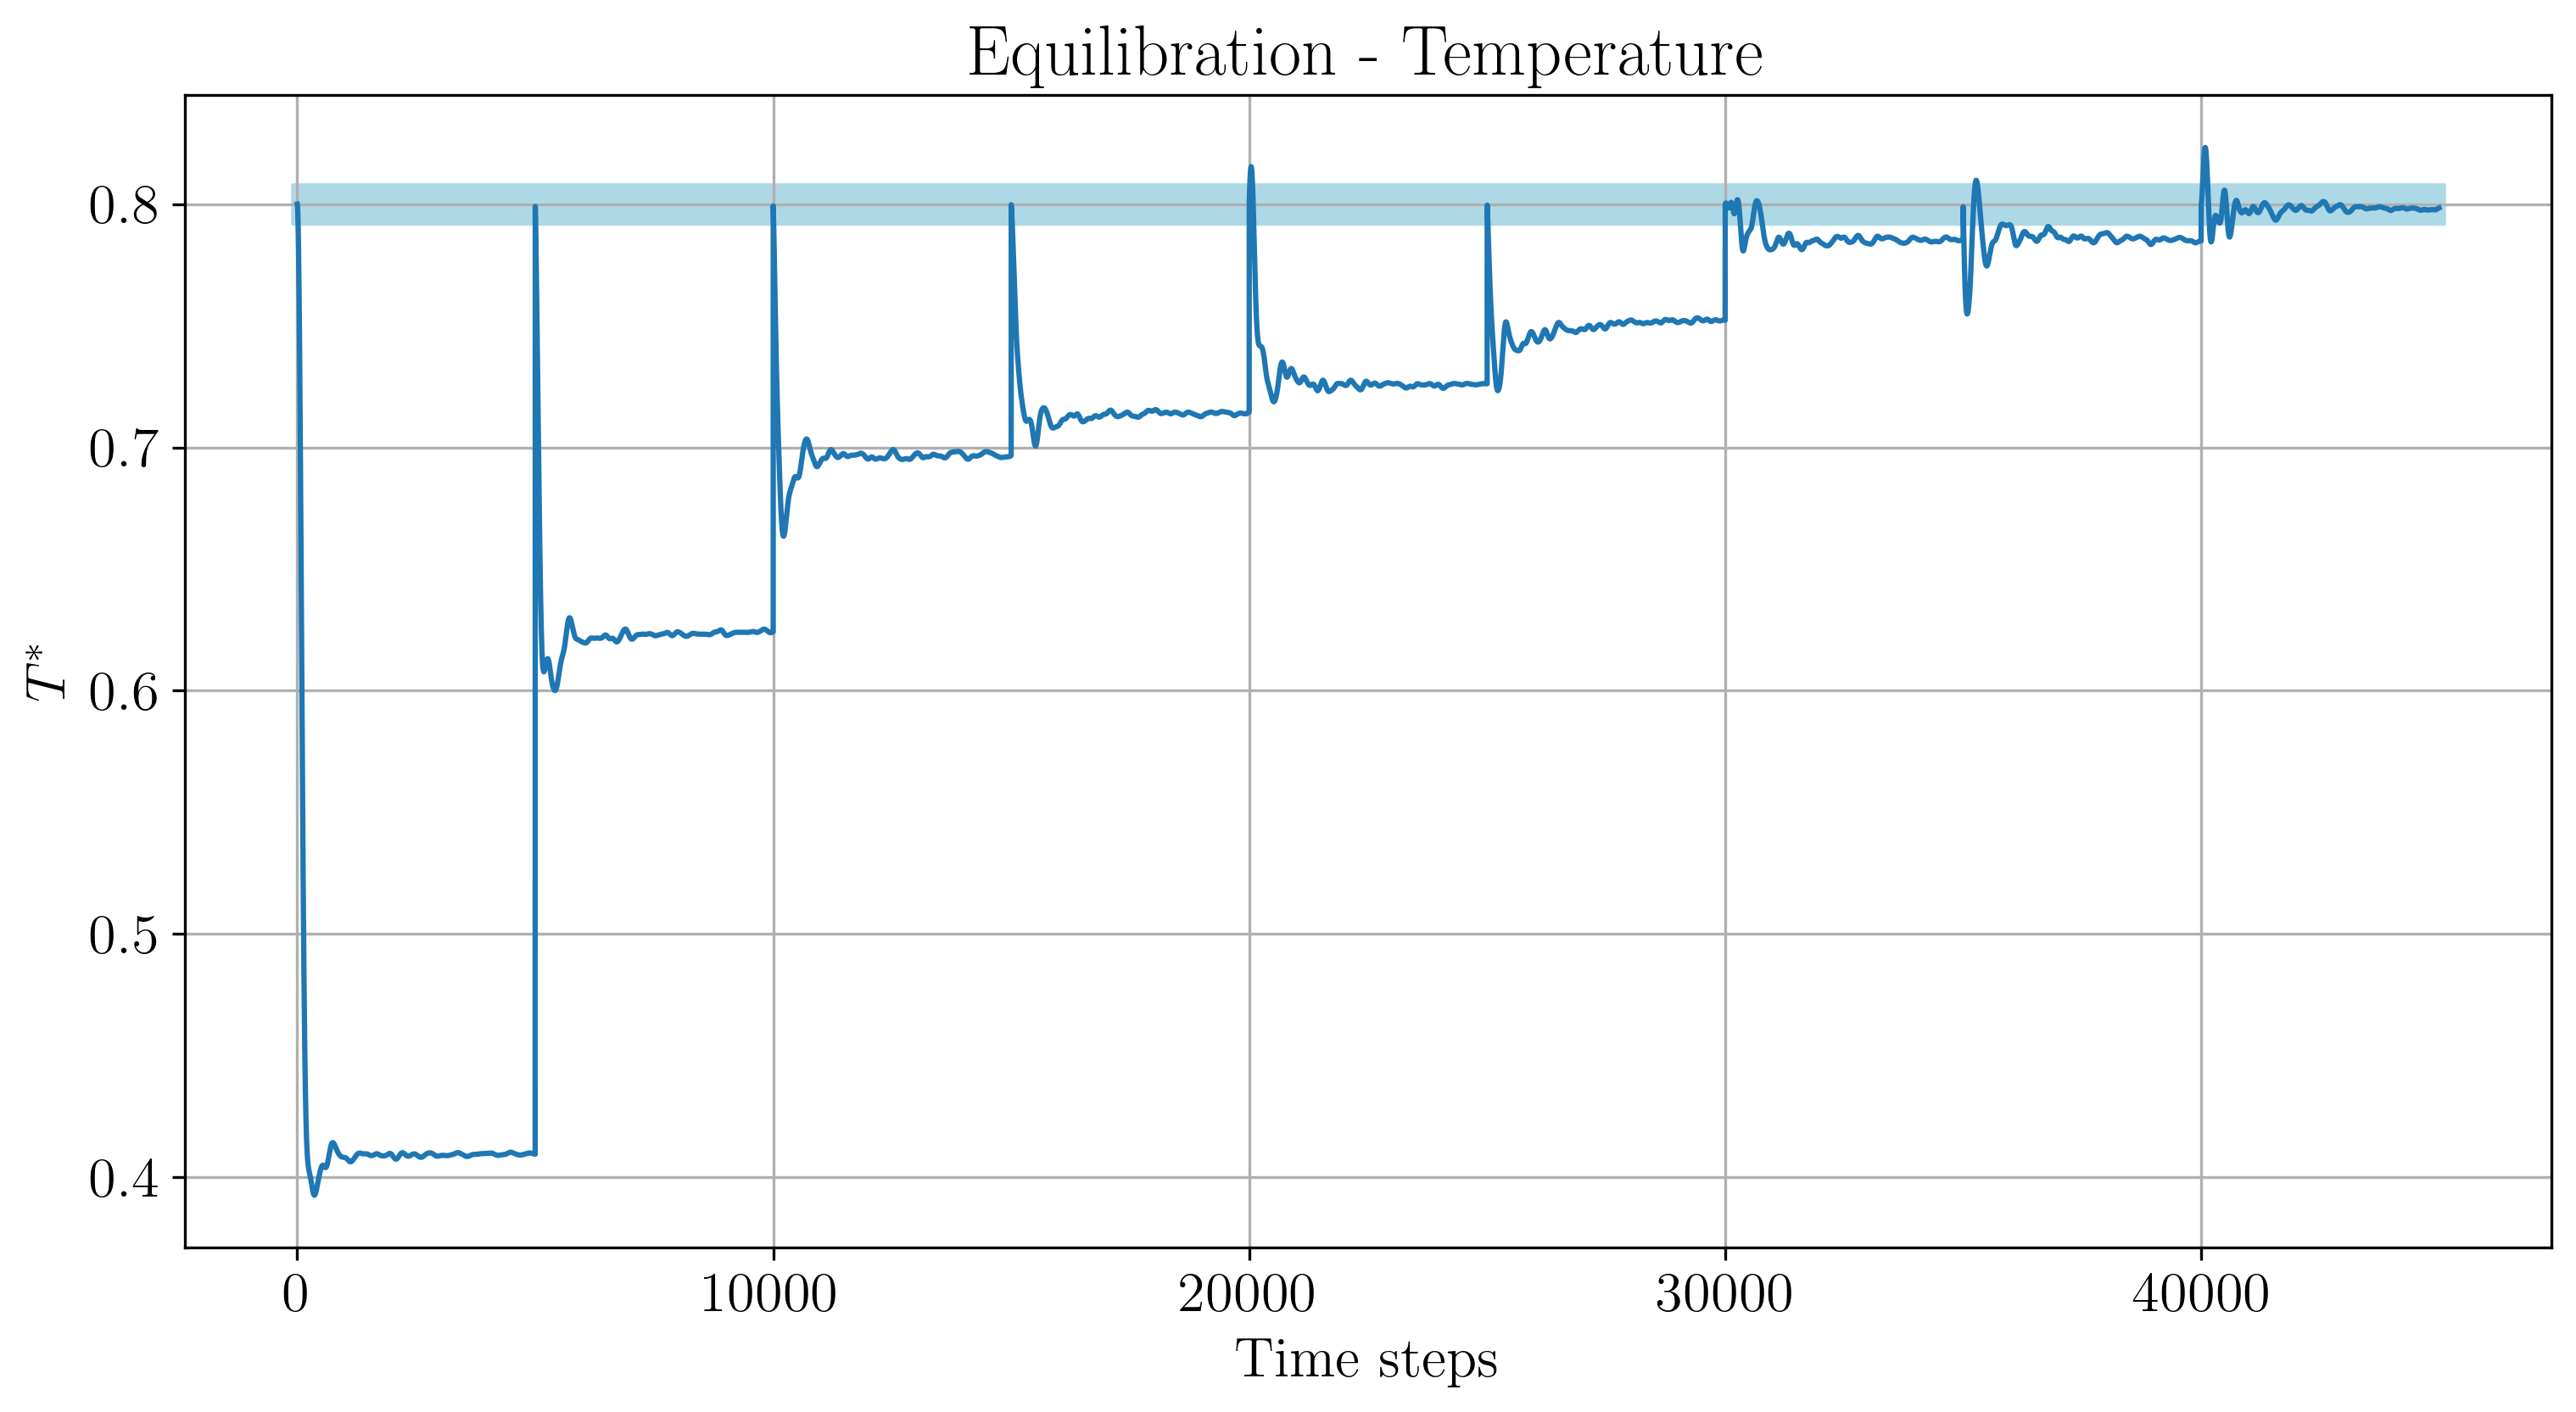

In [2]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/equilibration_solid_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
l = np.arange(-100,len(f1)+100)
plt.plot(x,g1)
plt.fill_between(l, 0.792, 0.808, color='lightblue')
plt.title('Equilibration - Temperature', fontsize=20)
plt.xlabel('Time steps')
plt.ylabel('$T^*$')
plt.grid(True)

plt.show()

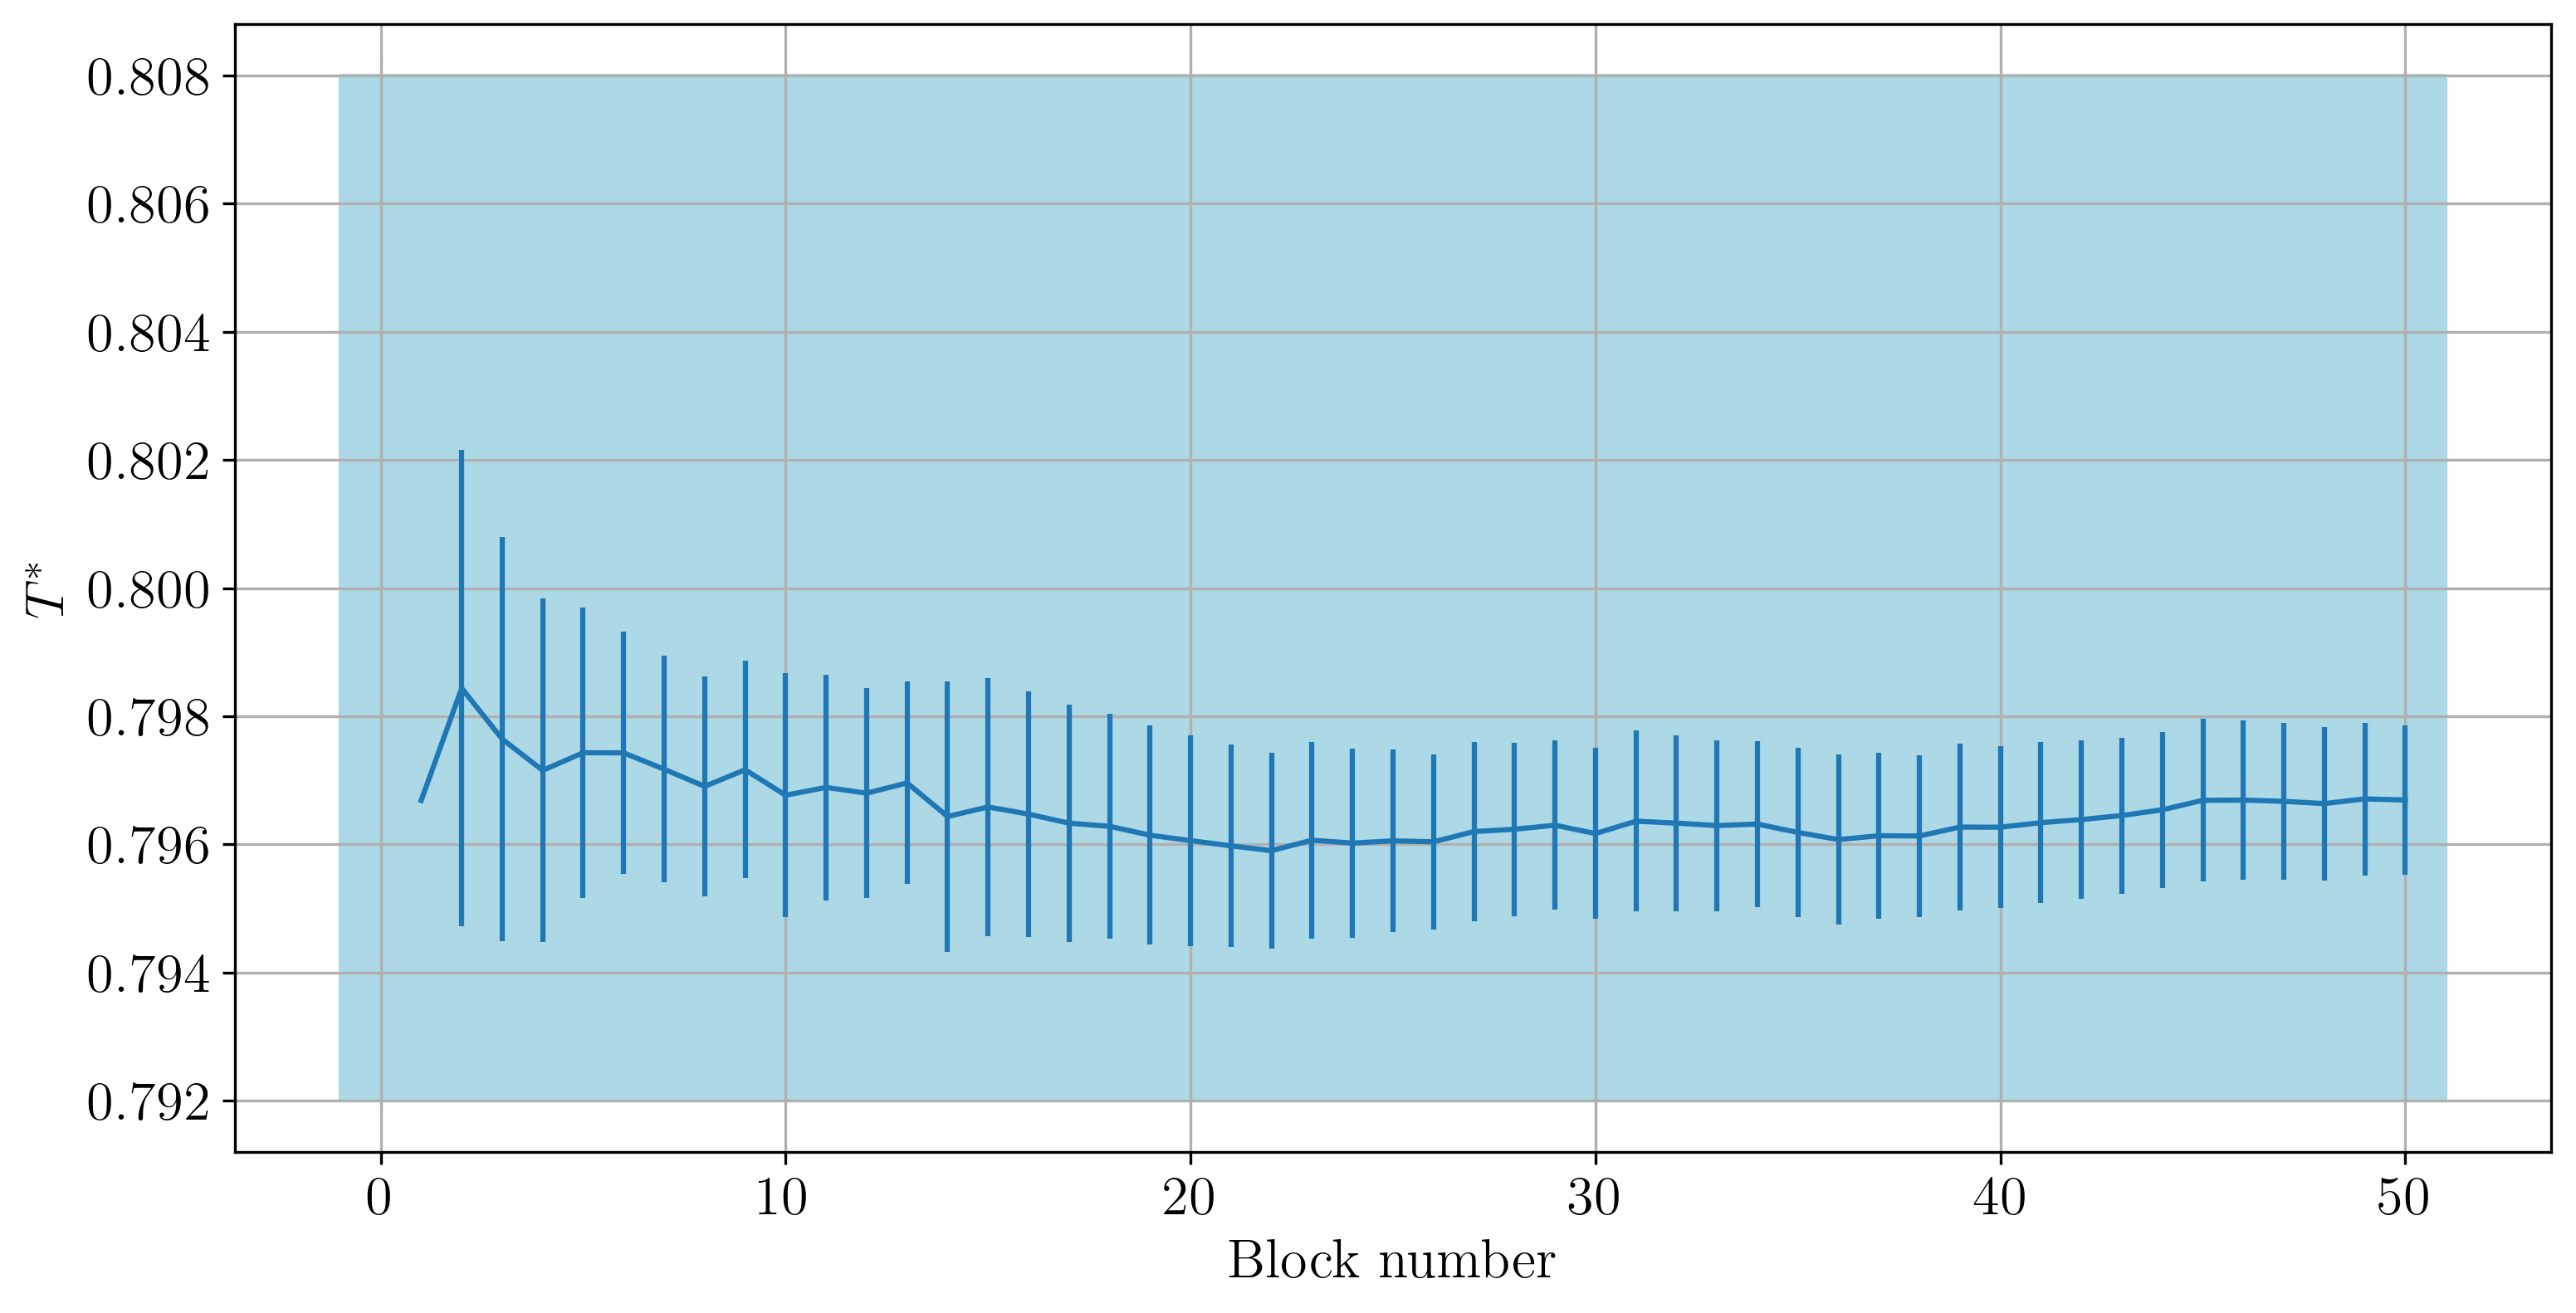

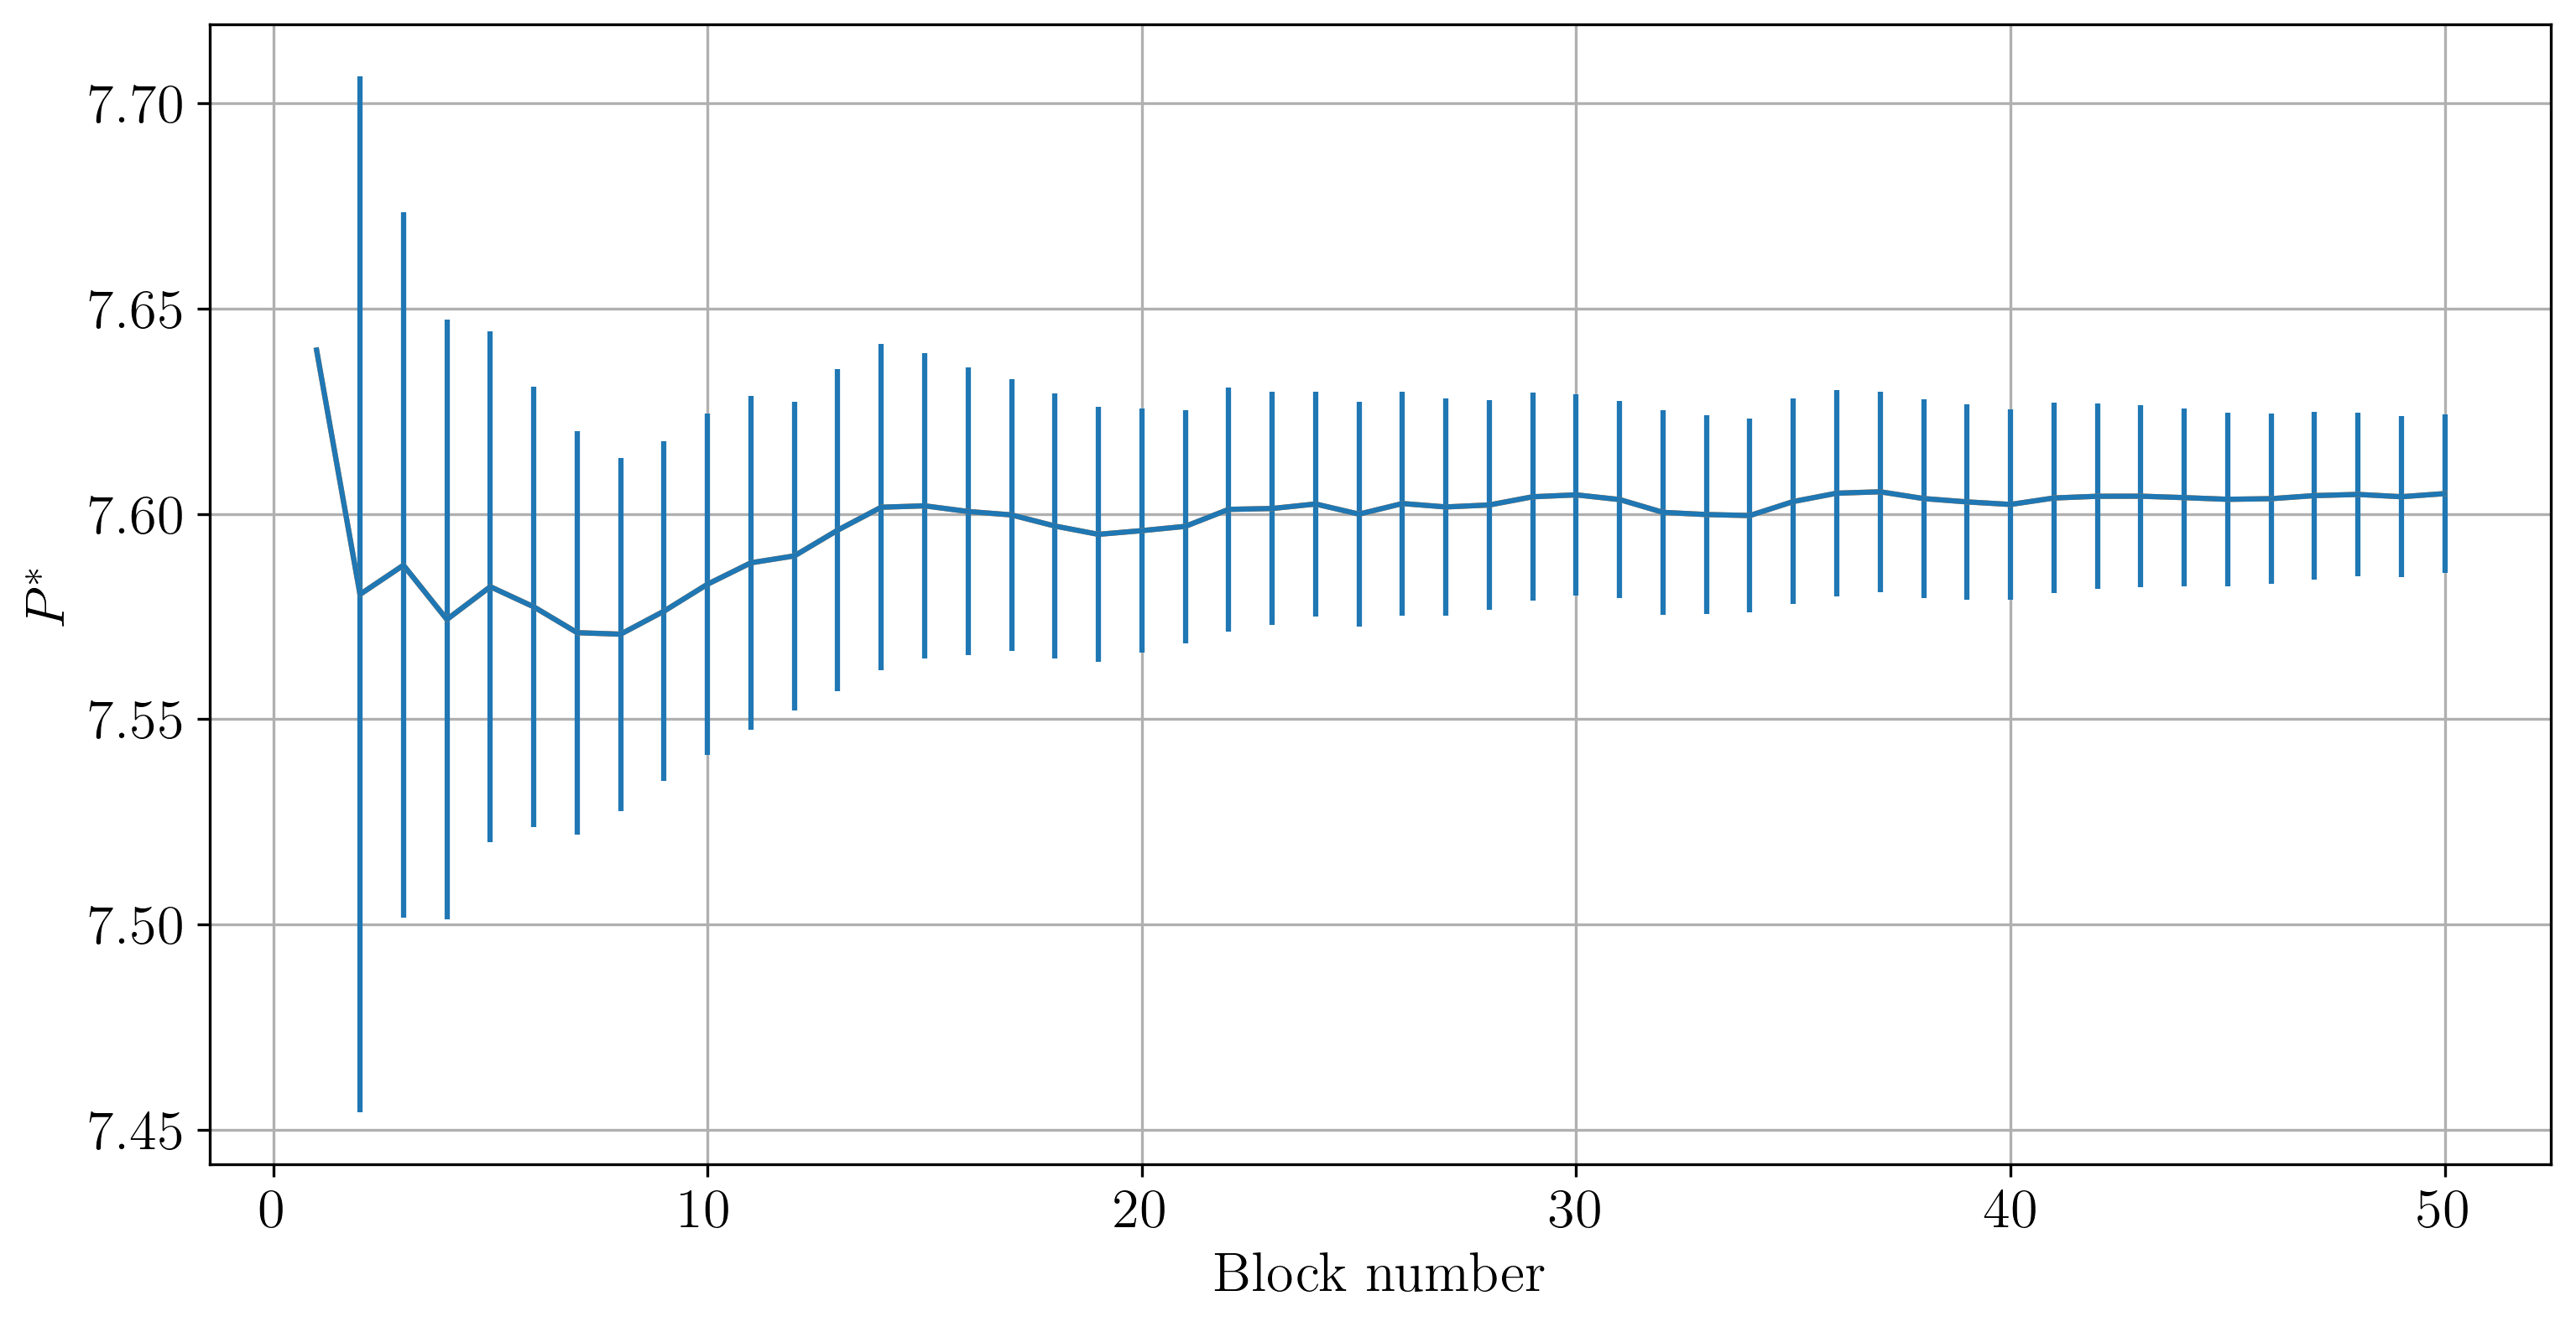

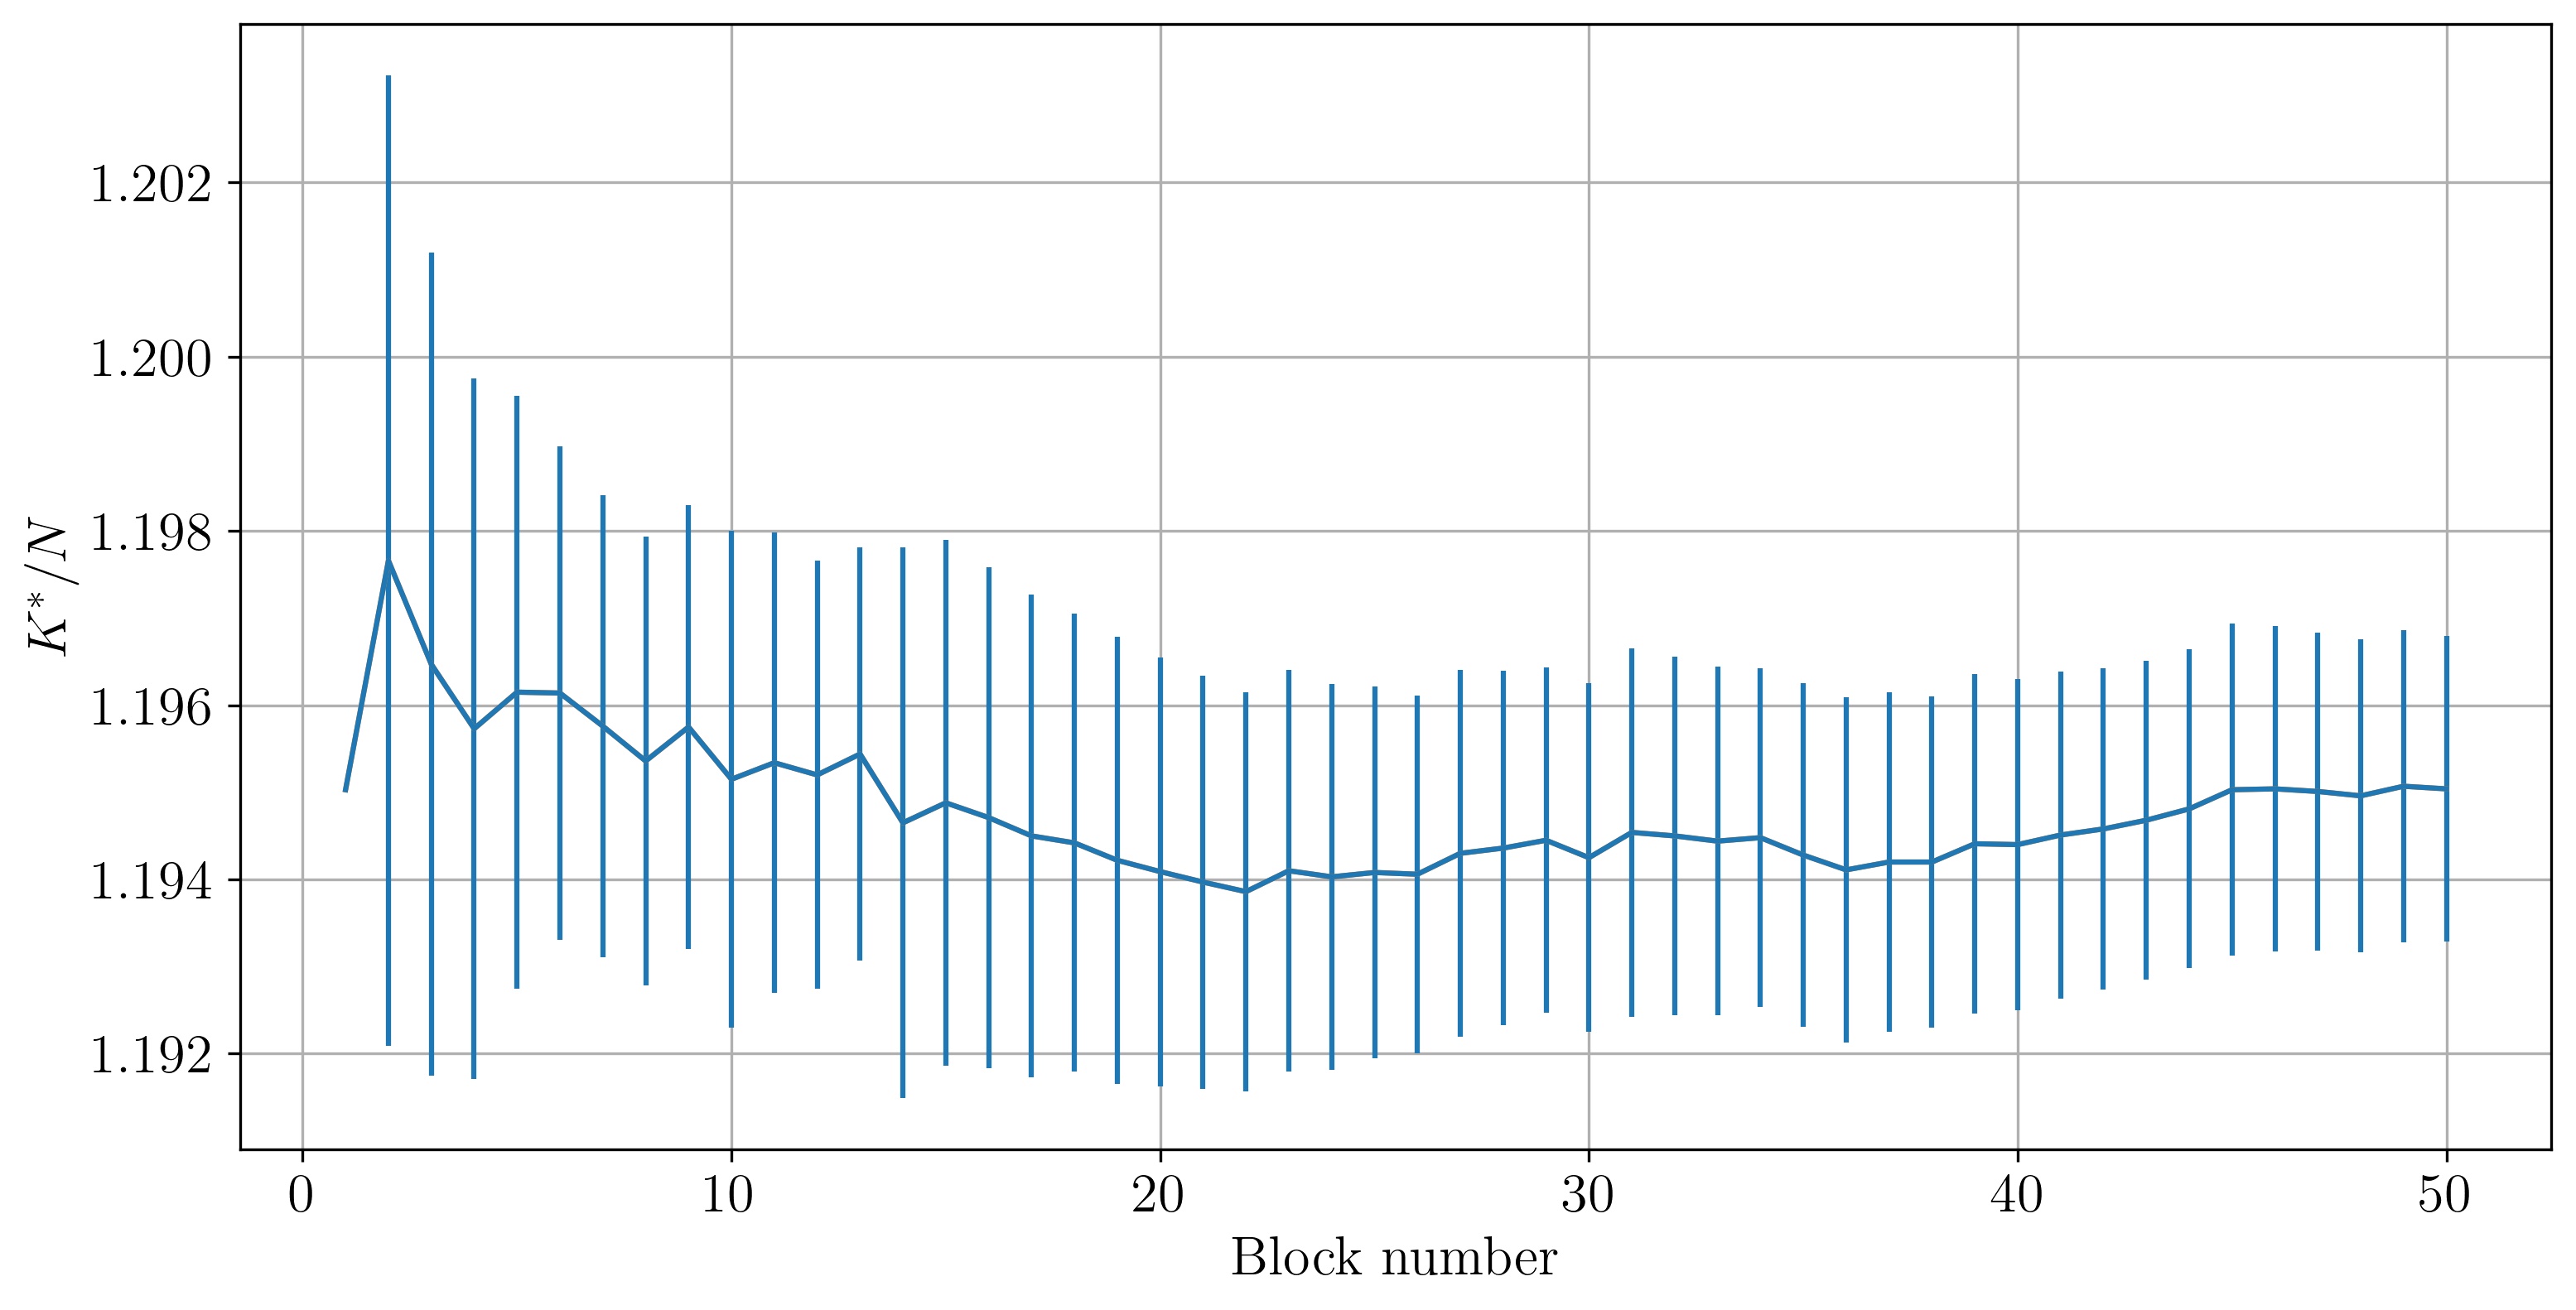

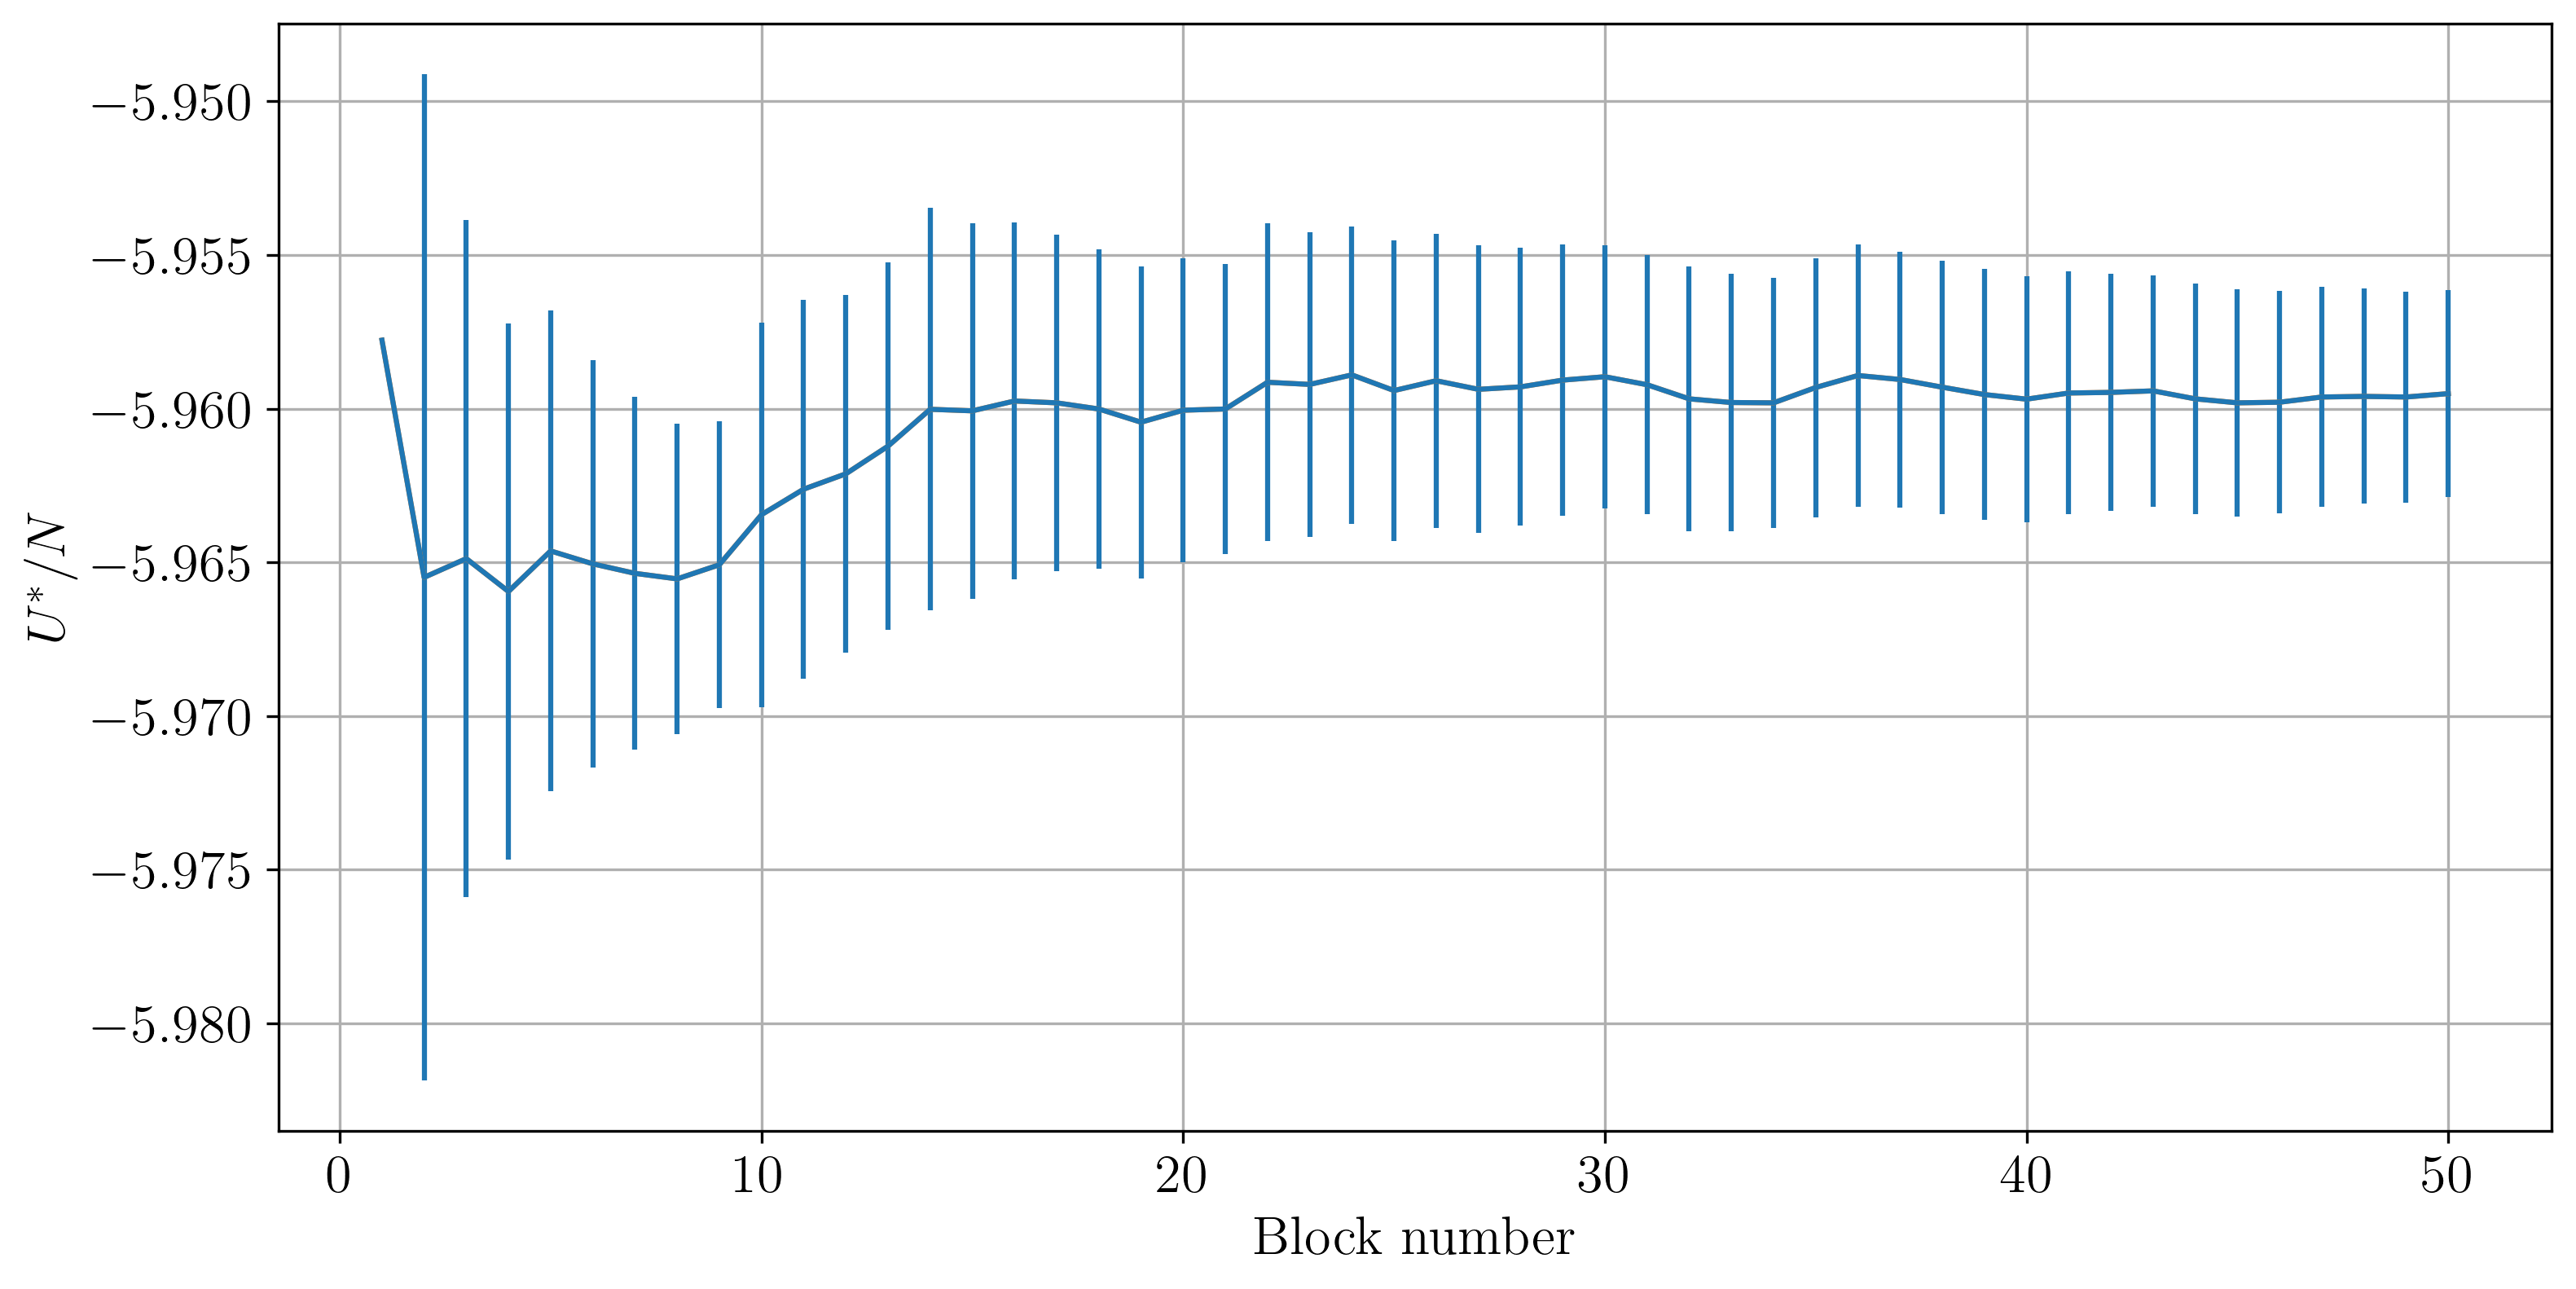

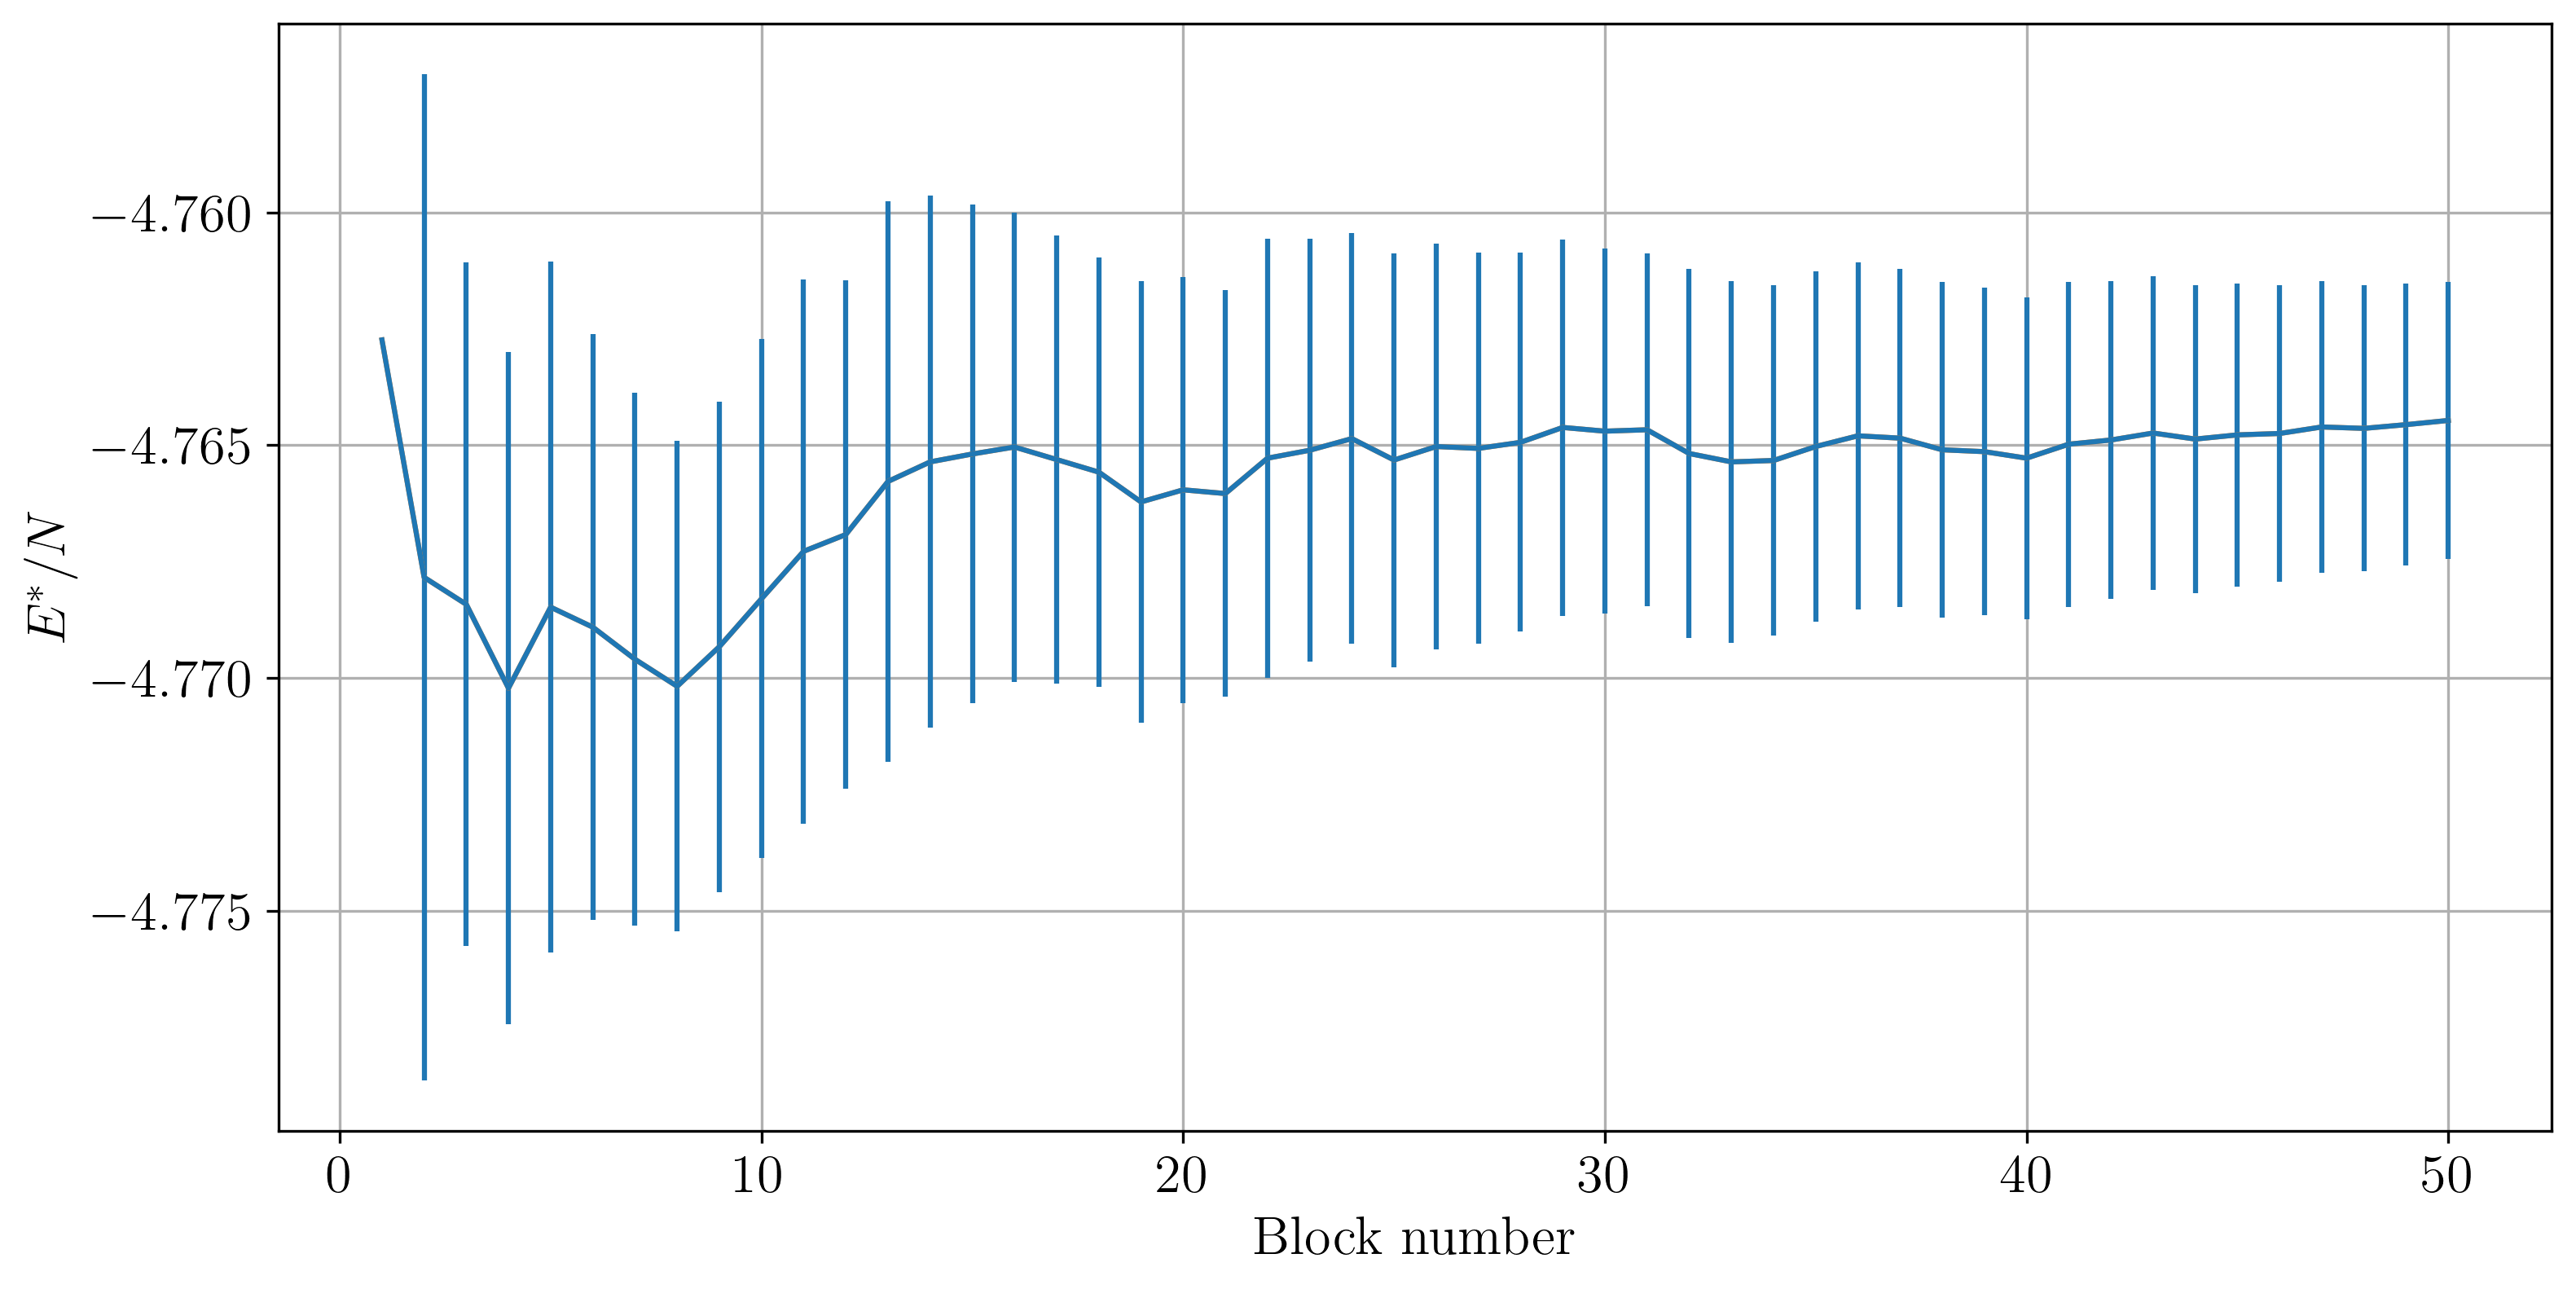

In [3]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/solid_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
ran = np.arange(-1,len(f1)+2)
plt.errorbar(x,g1,yerr=3*error1)
plt.fill_between(ran, 0.792, 0.808, color='lightblue')
plt.xlabel('Block number')
plt.ylabel('$T^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/solid_output_pres.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f2)+1)
plt.errorbar(x,g2,yerr=3*error2)
plt.plot(x,g2)
plt.xlabel('Block number')
plt.ylabel('$P^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/solid_output_ekin.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f3)+1)
plt.errorbar(x,g3,yerr=3*error3)
plt.plot(x,g3)
plt.xlabel('Block number')
plt.ylabel('$K^*/N$')
plt.grid(True)

plt.show()

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f4, g4, error4 = np.loadtxt("MDNVE_MCNVT/data/solid_output_epot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f4)+1)
plt.errorbar(x,g4,yerr=3*error4)
plt.plot(x,g4)
plt.xlabel('Block number')
plt.ylabel('$U^*/N$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f5, g5, error5 = np.loadtxt("MDNVE_MCNVT/data/solid_output_etot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f5)+1)
plt.errorbar(x,g5,yerr=3*error5)
plt.plot(x,g5)
plt.xlabel('Block number')
plt.ylabel('$E^*/N$')
plt.grid(True)

plt.show()

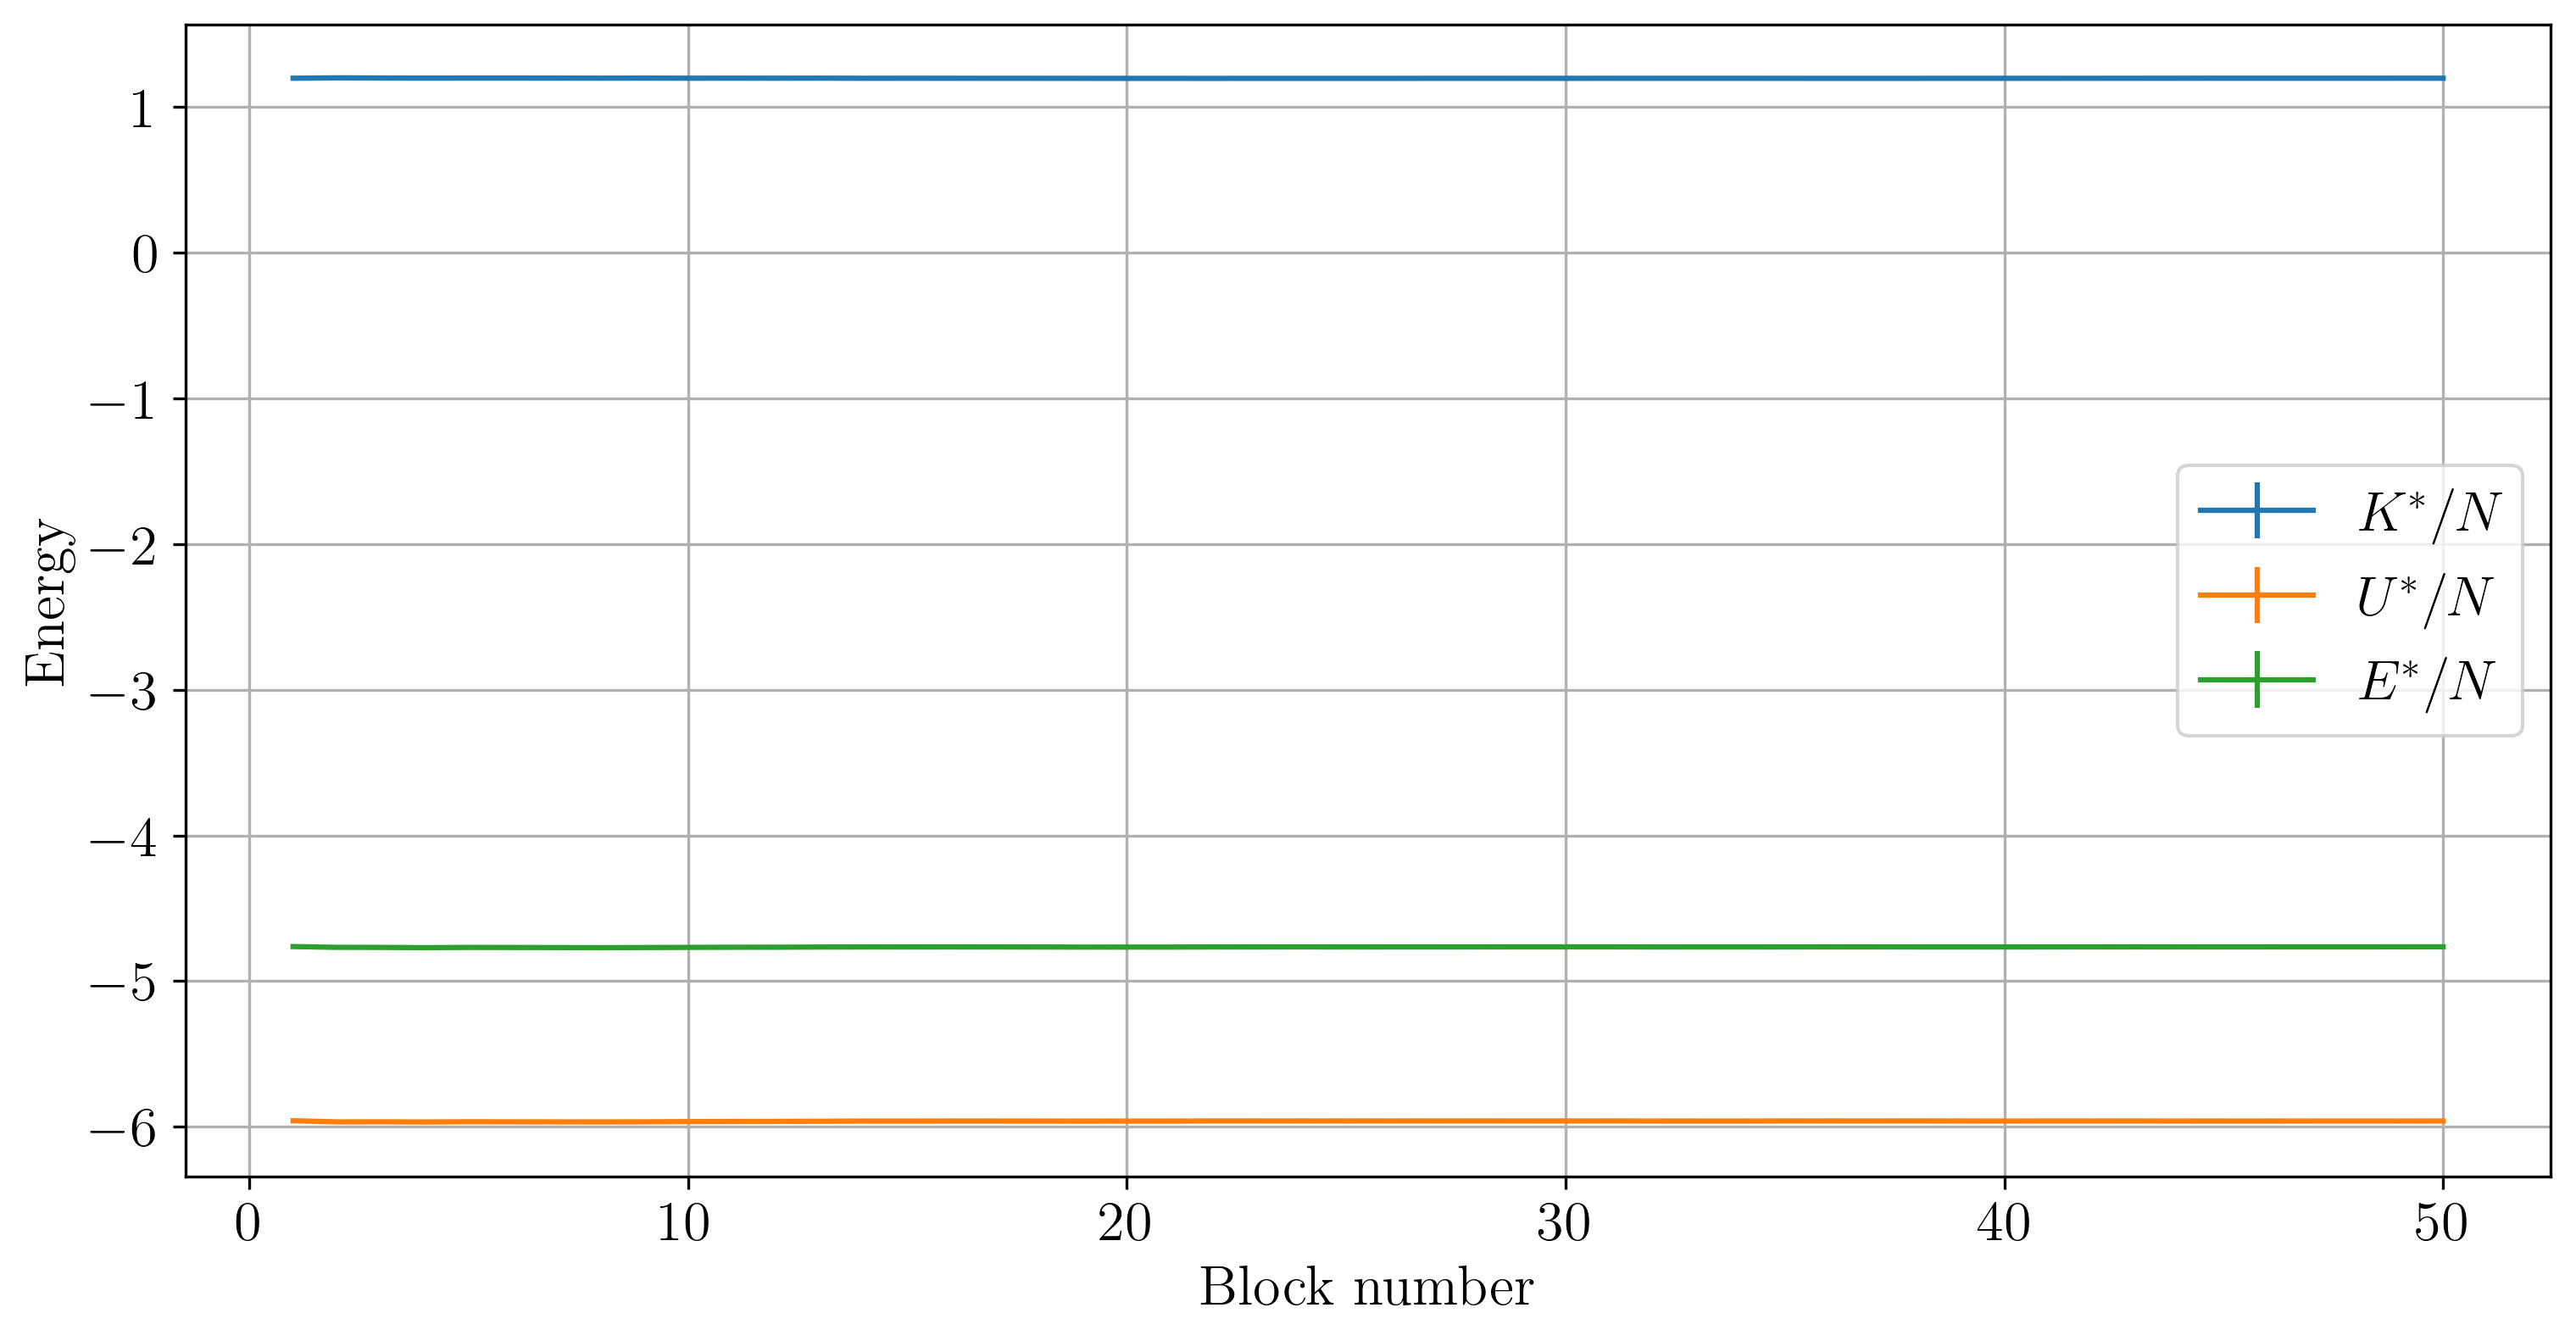

In [4]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/solid_output_ekin.dat", usecols=(1,2,3), unpack='true')
f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/solid_output_epot.dat", usecols=(1,2,3), unpack='true')
f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/solid_output_etot.dat", usecols=(1,2,3), unpack='true')

x = np.arange(1, len(f1)+1)
plt.errorbar(x,g1,yerr=3*error1,label="$K^*/N$")
plt.errorbar(x,g2,yerr=3*error2,label="$U^*/N$")
plt.errorbar(x,g3,yerr=3*error3,label="$E^*/N$")
plt.xlabel('Block number')
plt.ylabel('Energy')
plt.grid(True)

plt.legend()

plt.show()

#### <span style="color:darkblue">LIQUID</span>
**Equilibration**: 

- $\texttt{nblocks=20000}$

- $\texttt{nstep=1}$

- Target $T^* = 1.1$ 

- target error $ \delta T^*/T^* = \pm 1\%$

**Simulation**: 
- $\texttt{nblocks=50}$
- $\texttt{nstep=2000}$

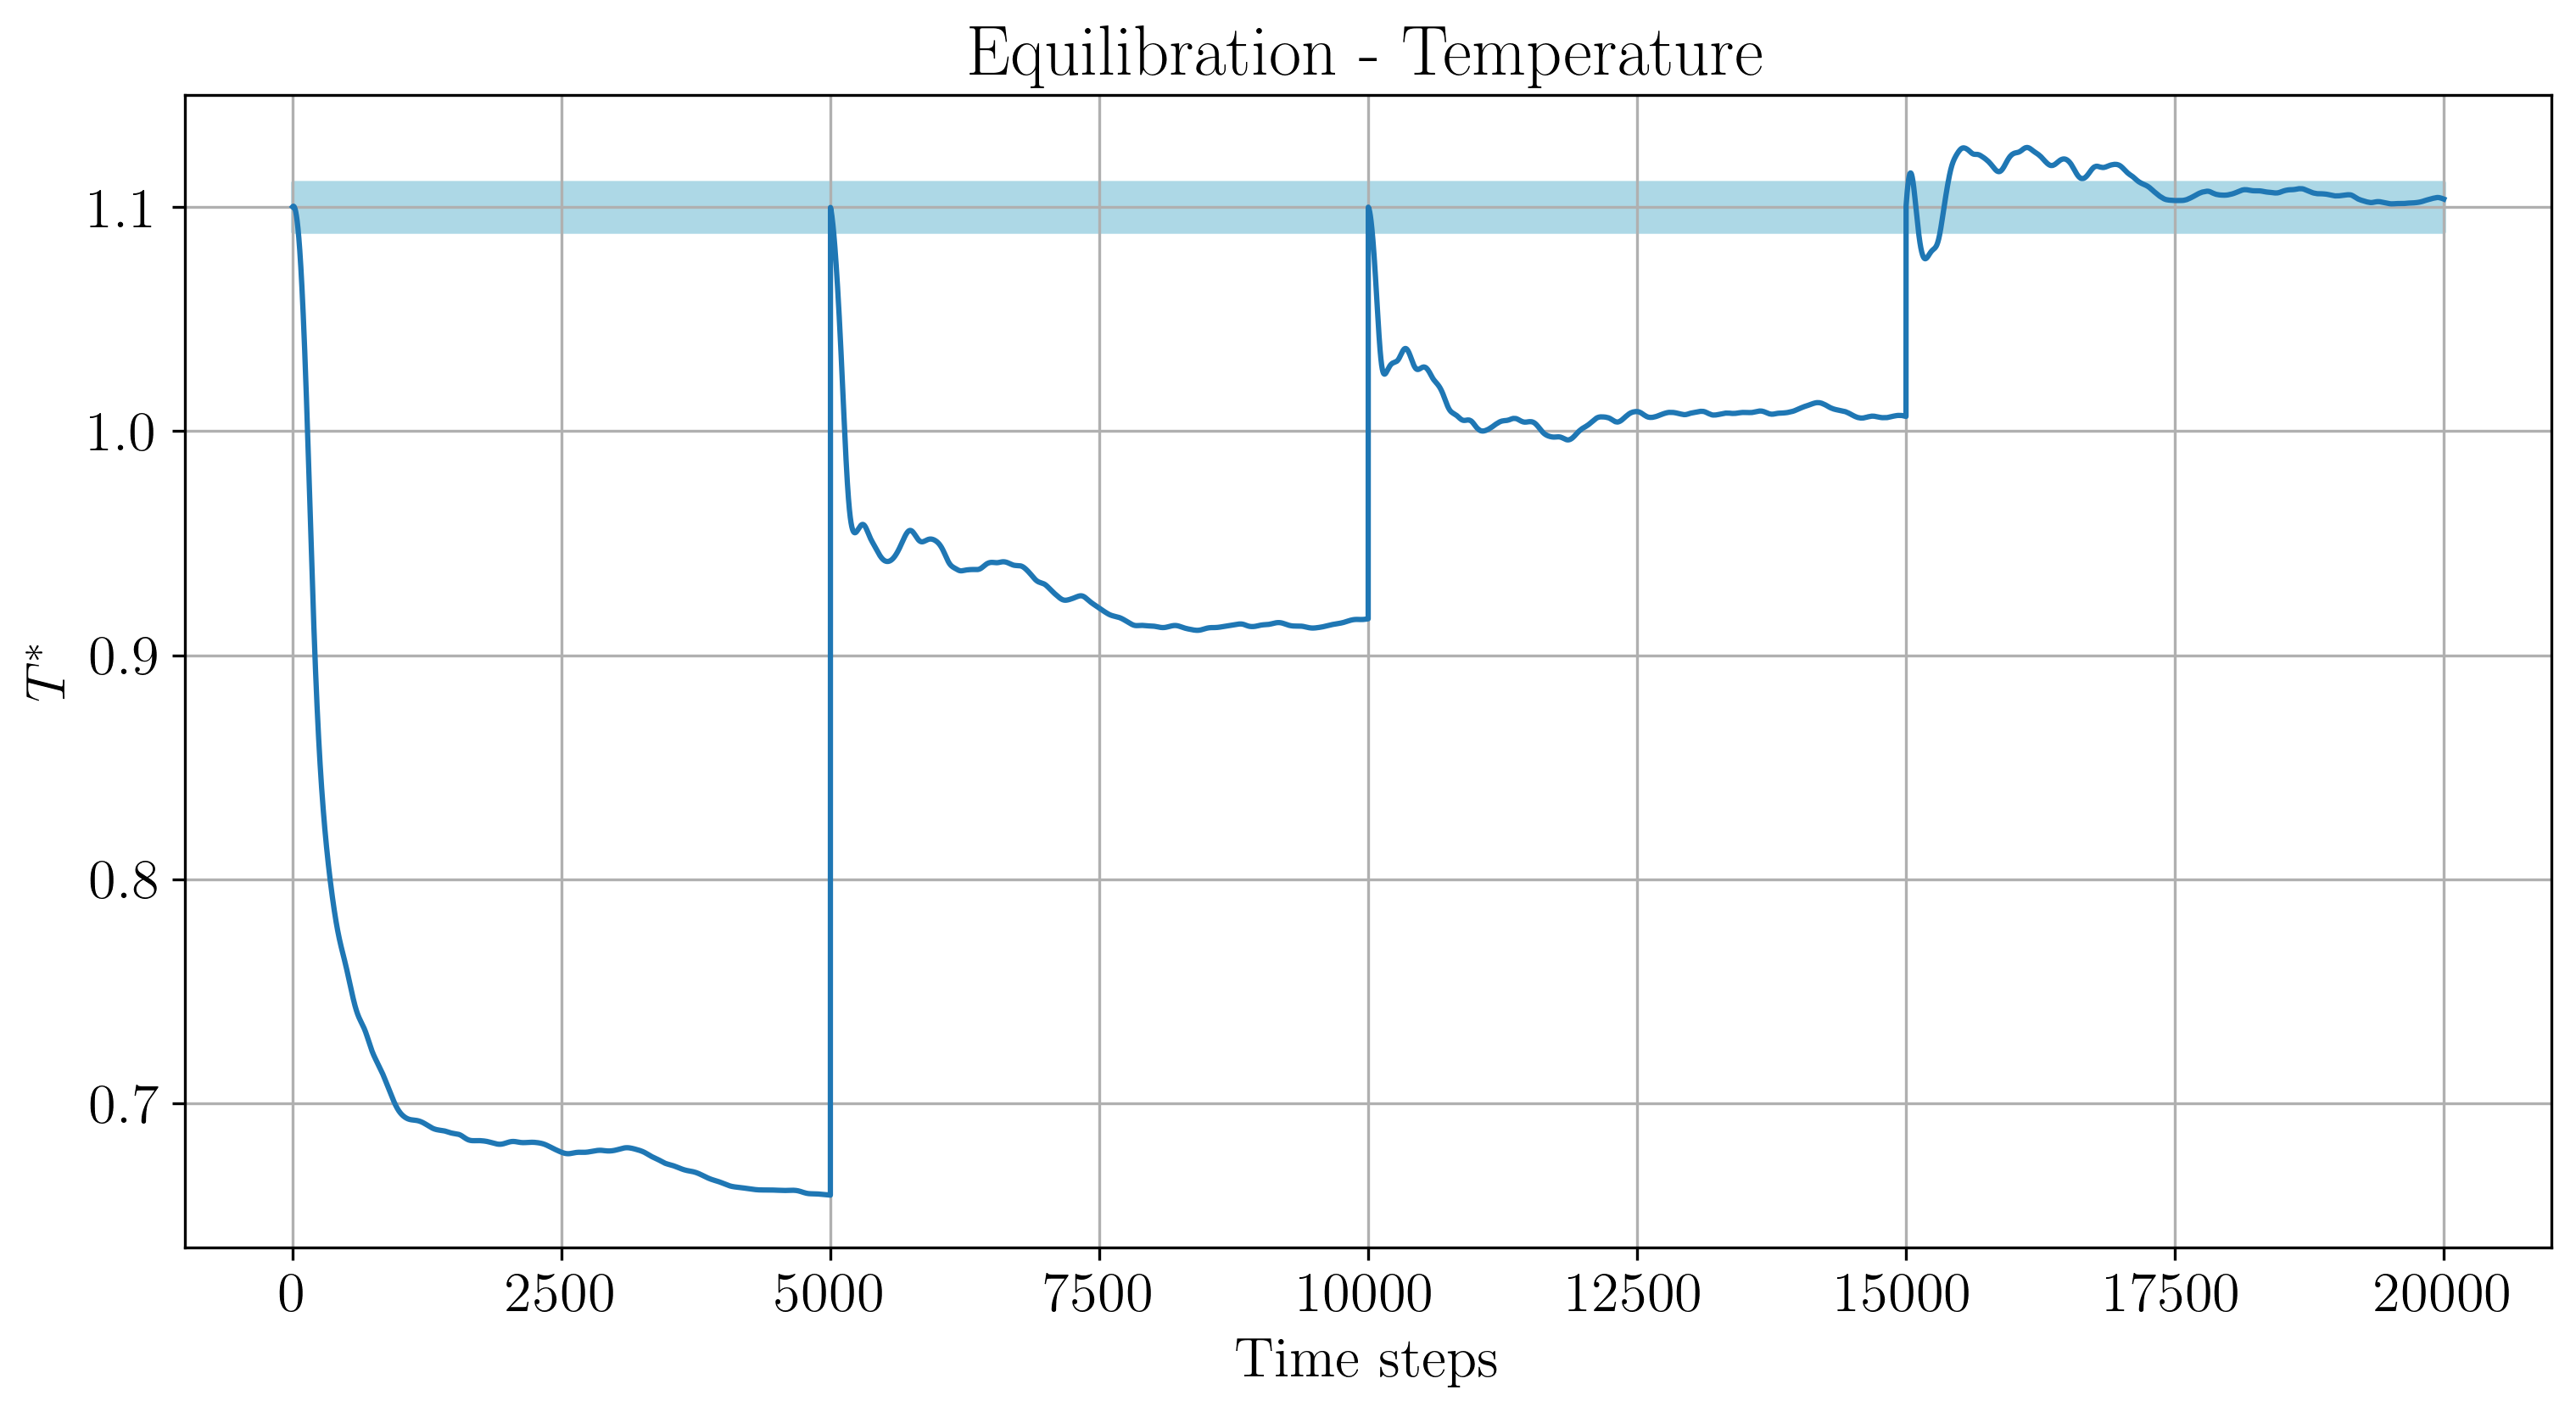

In [5]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/equilibration_liquid_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
l = np.arange(-1,len(f1)+1)
plt.plot(x,g1)
plt.fill_between(l, 1.089, 1.111, color='lightblue')
plt.title('Equilibration - Temperature', fontsize=20)
plt.xlabel('Time steps')
plt.ylabel('$T^*$')
plt.grid(True)

plt.show()

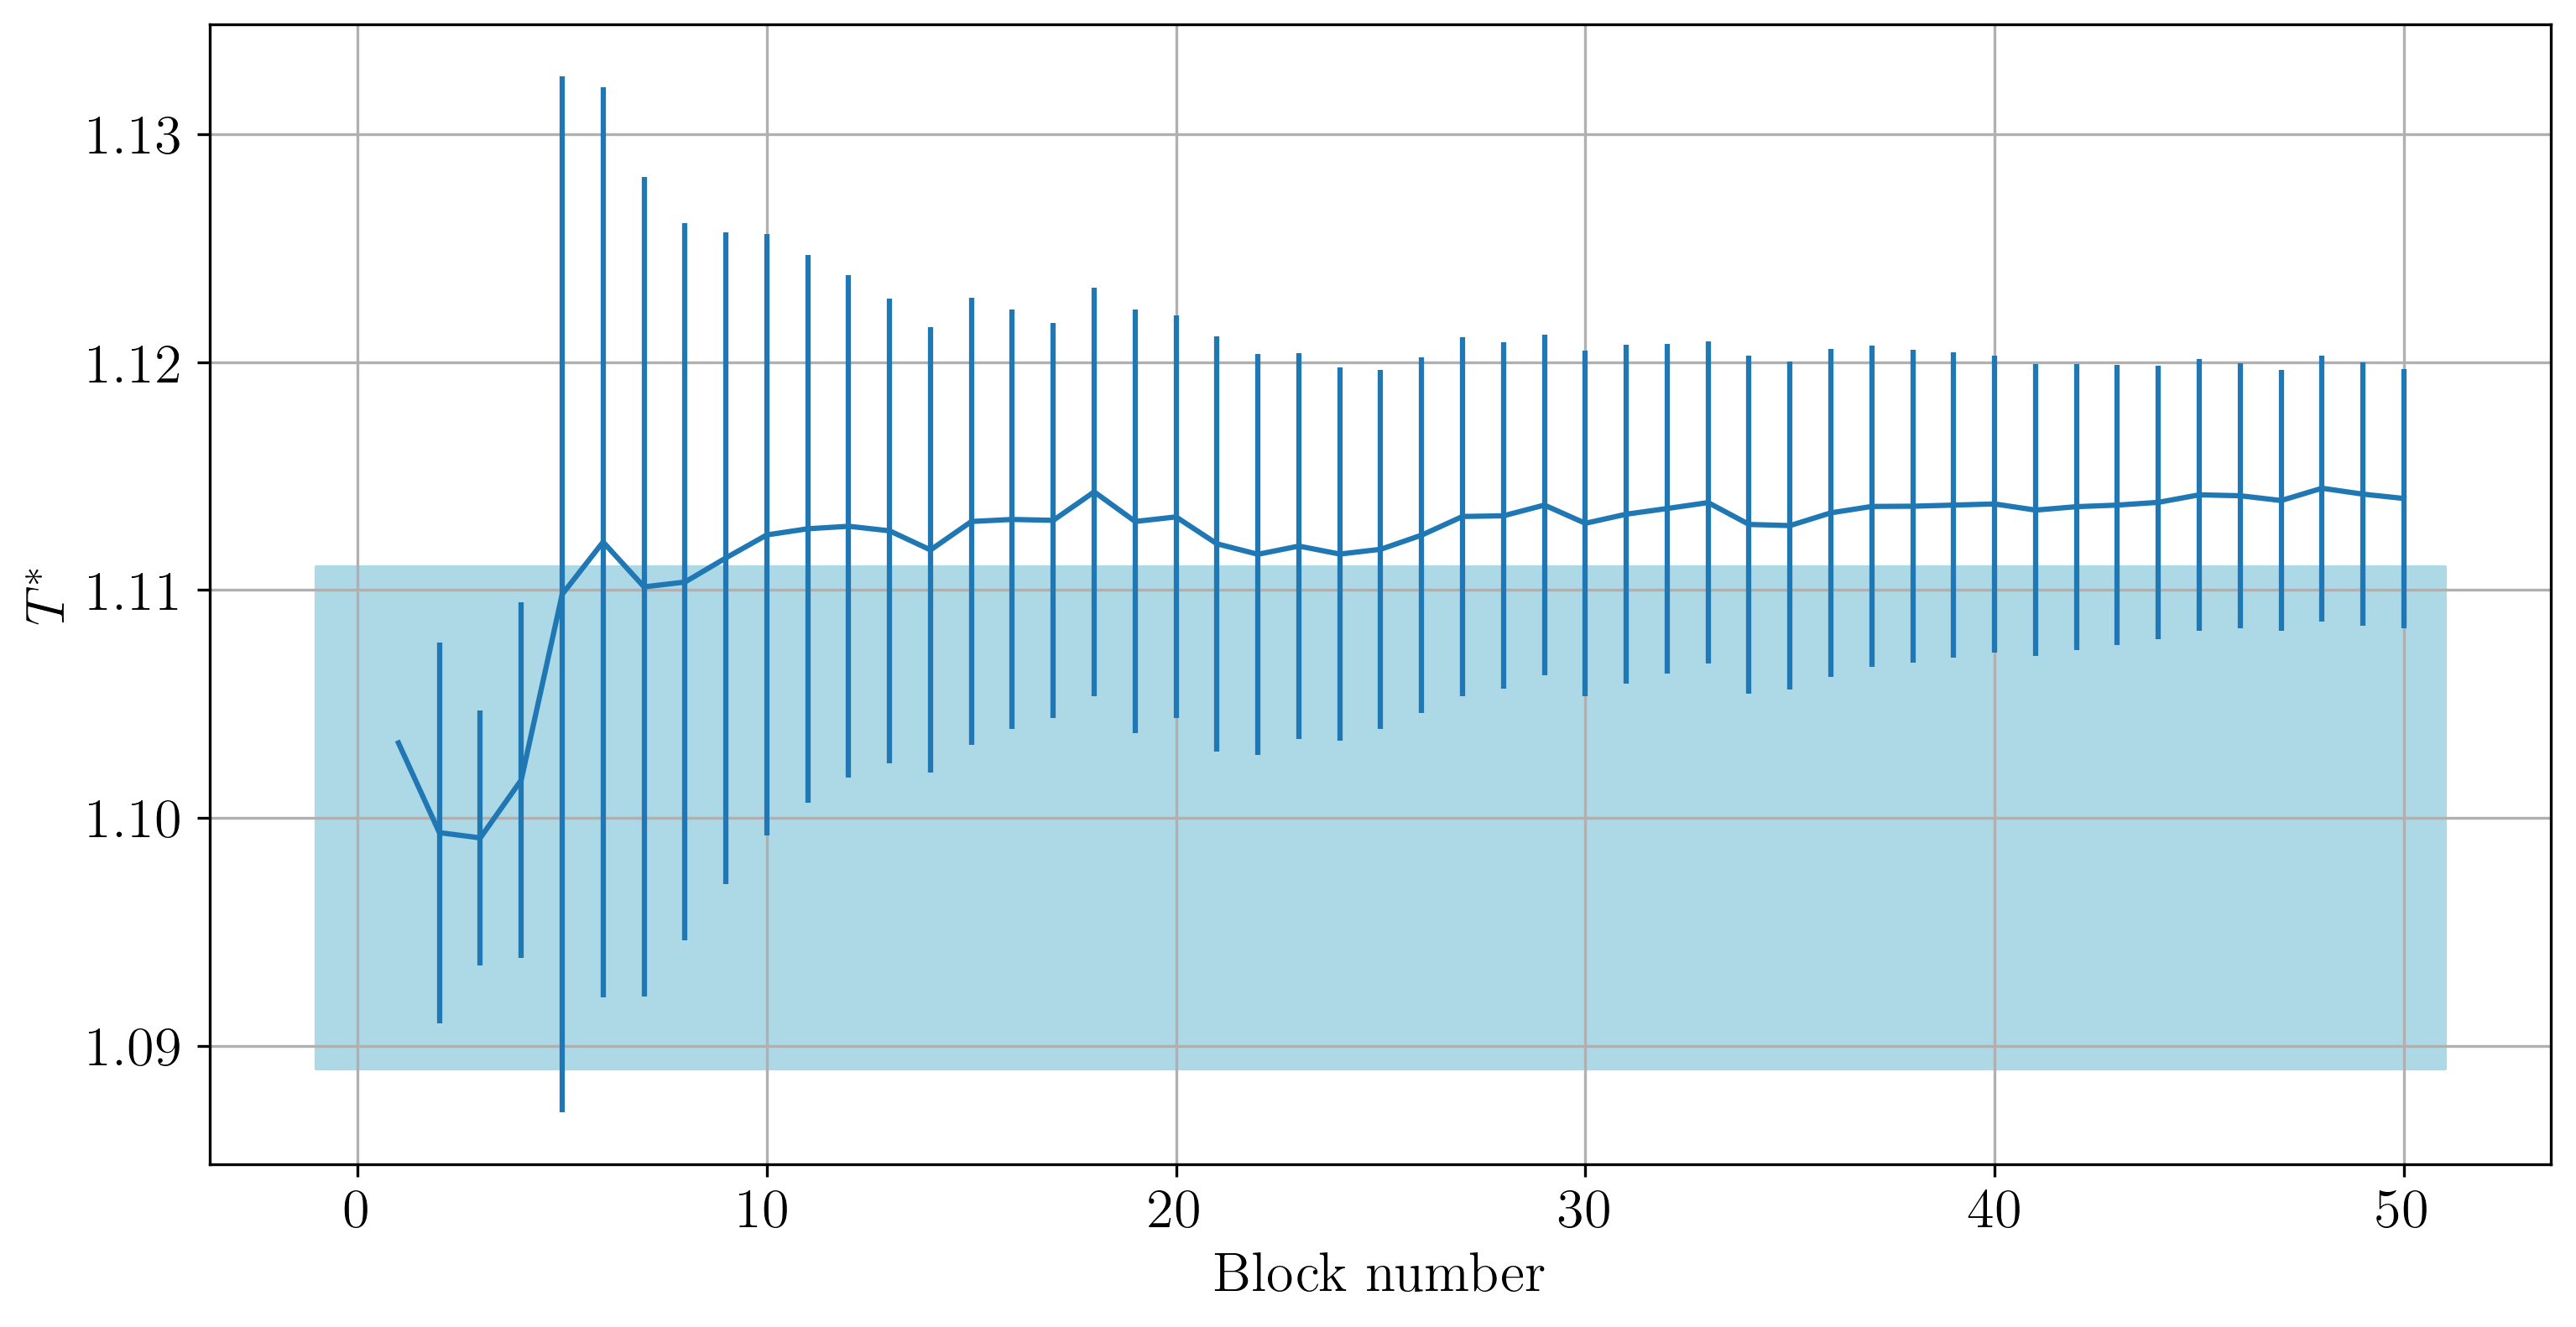

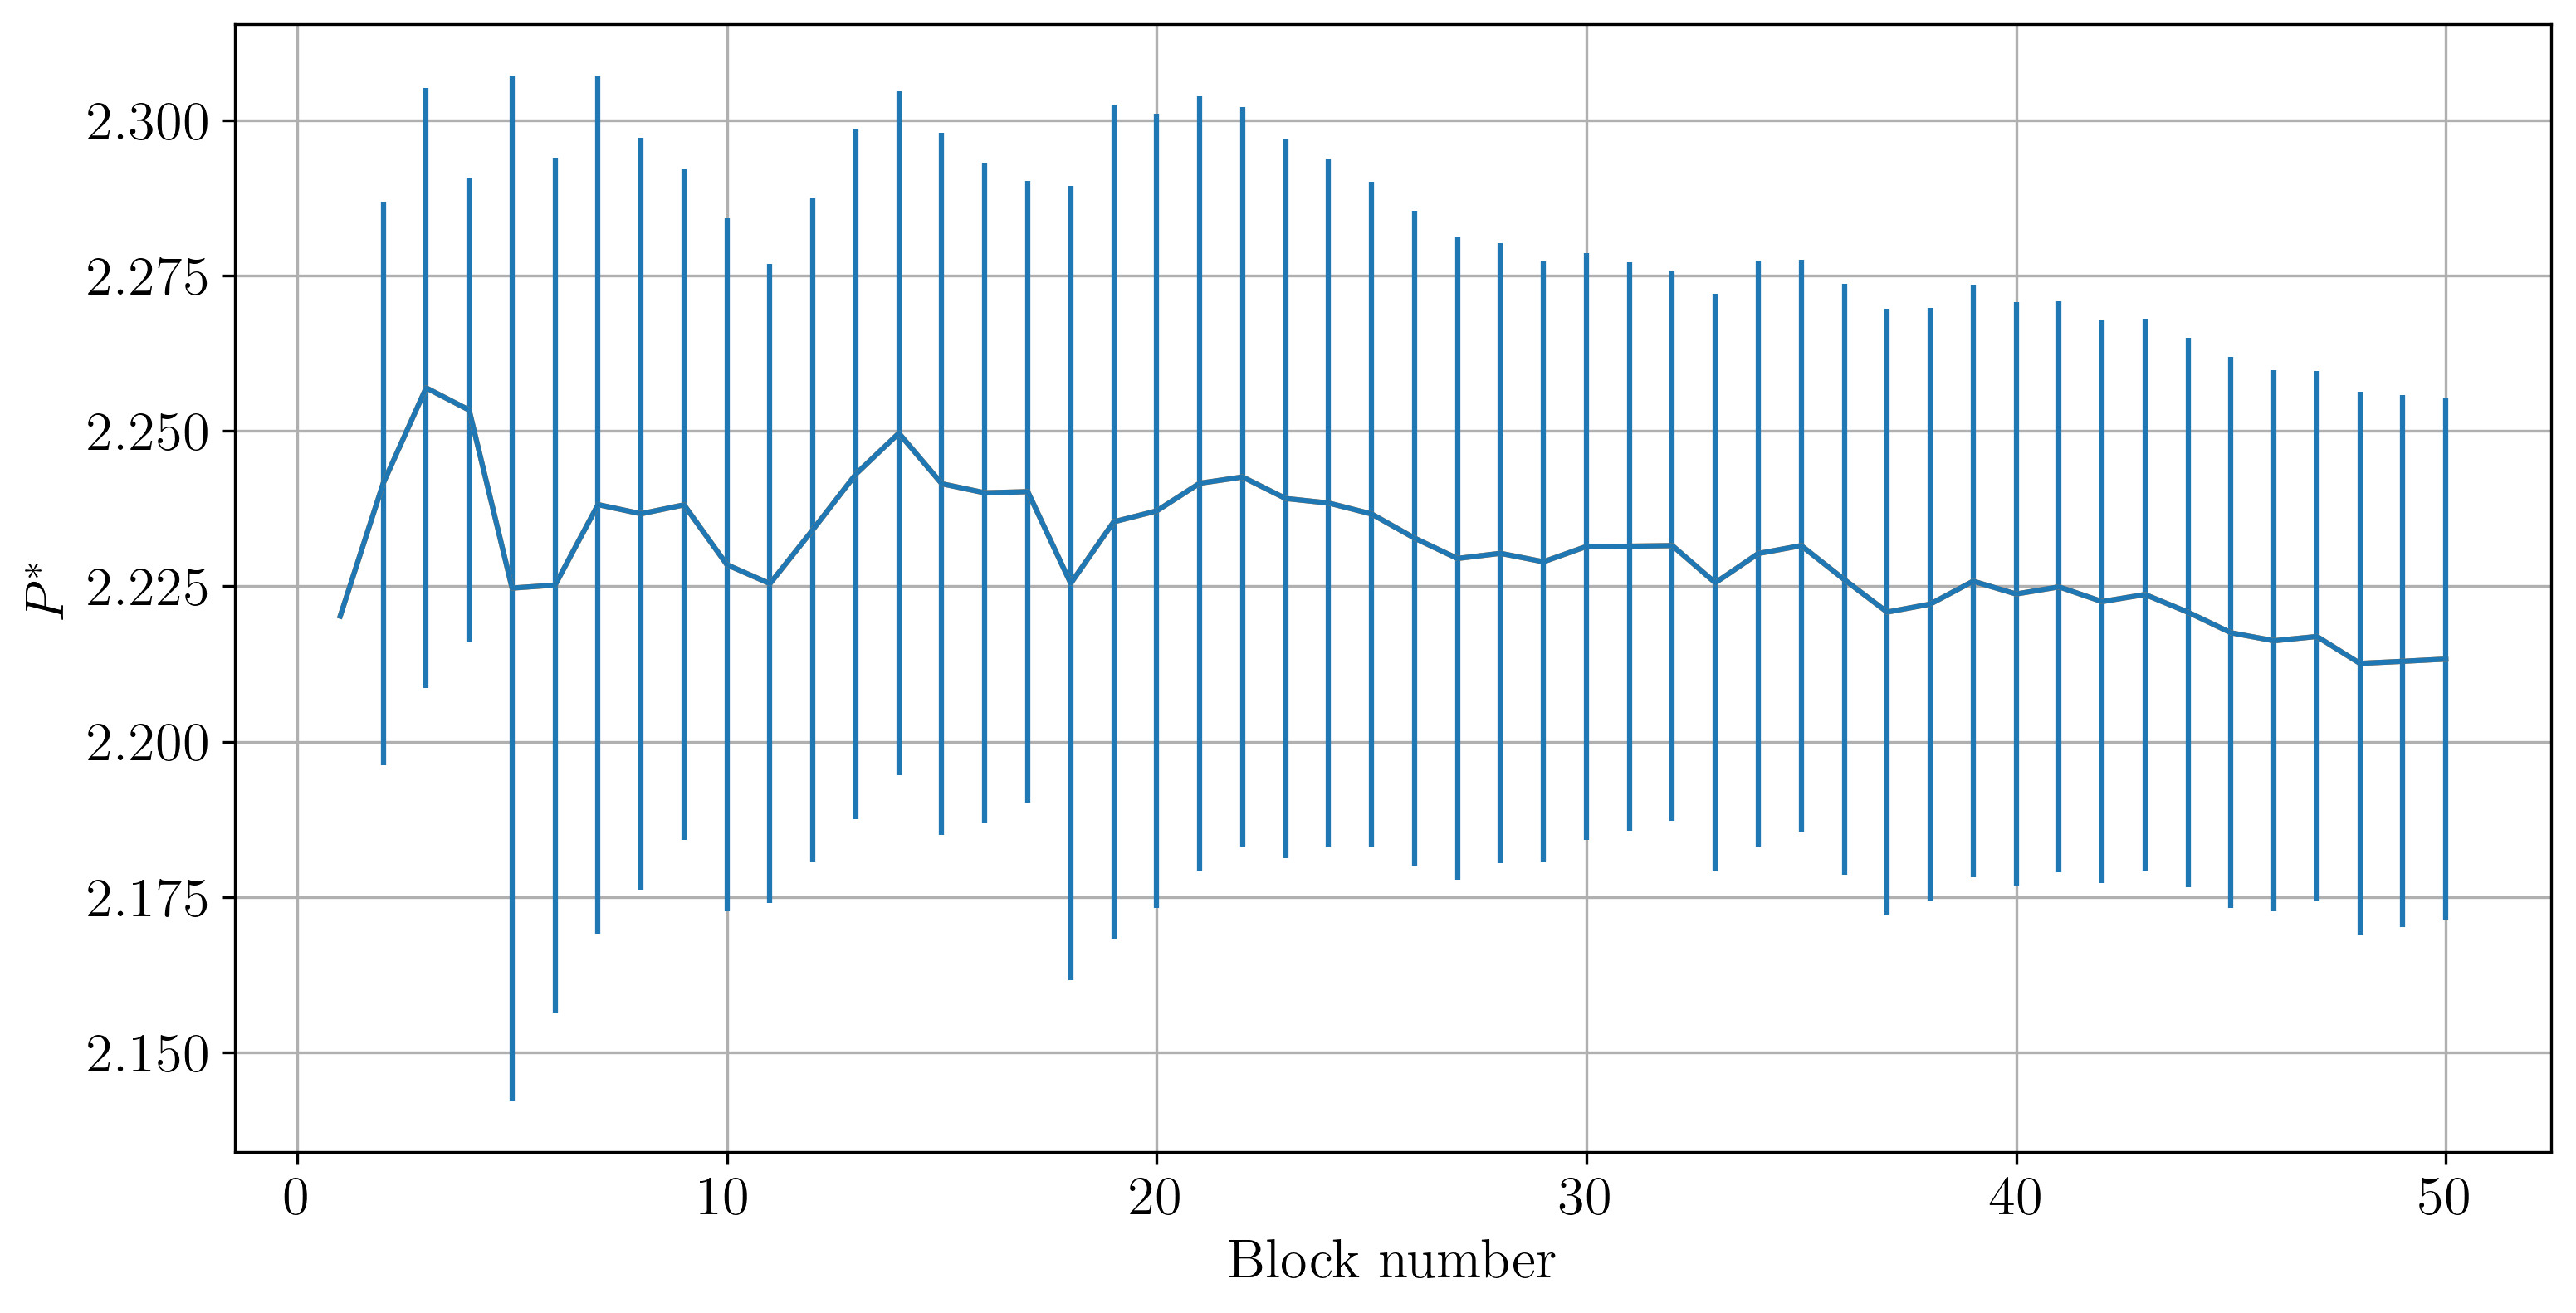

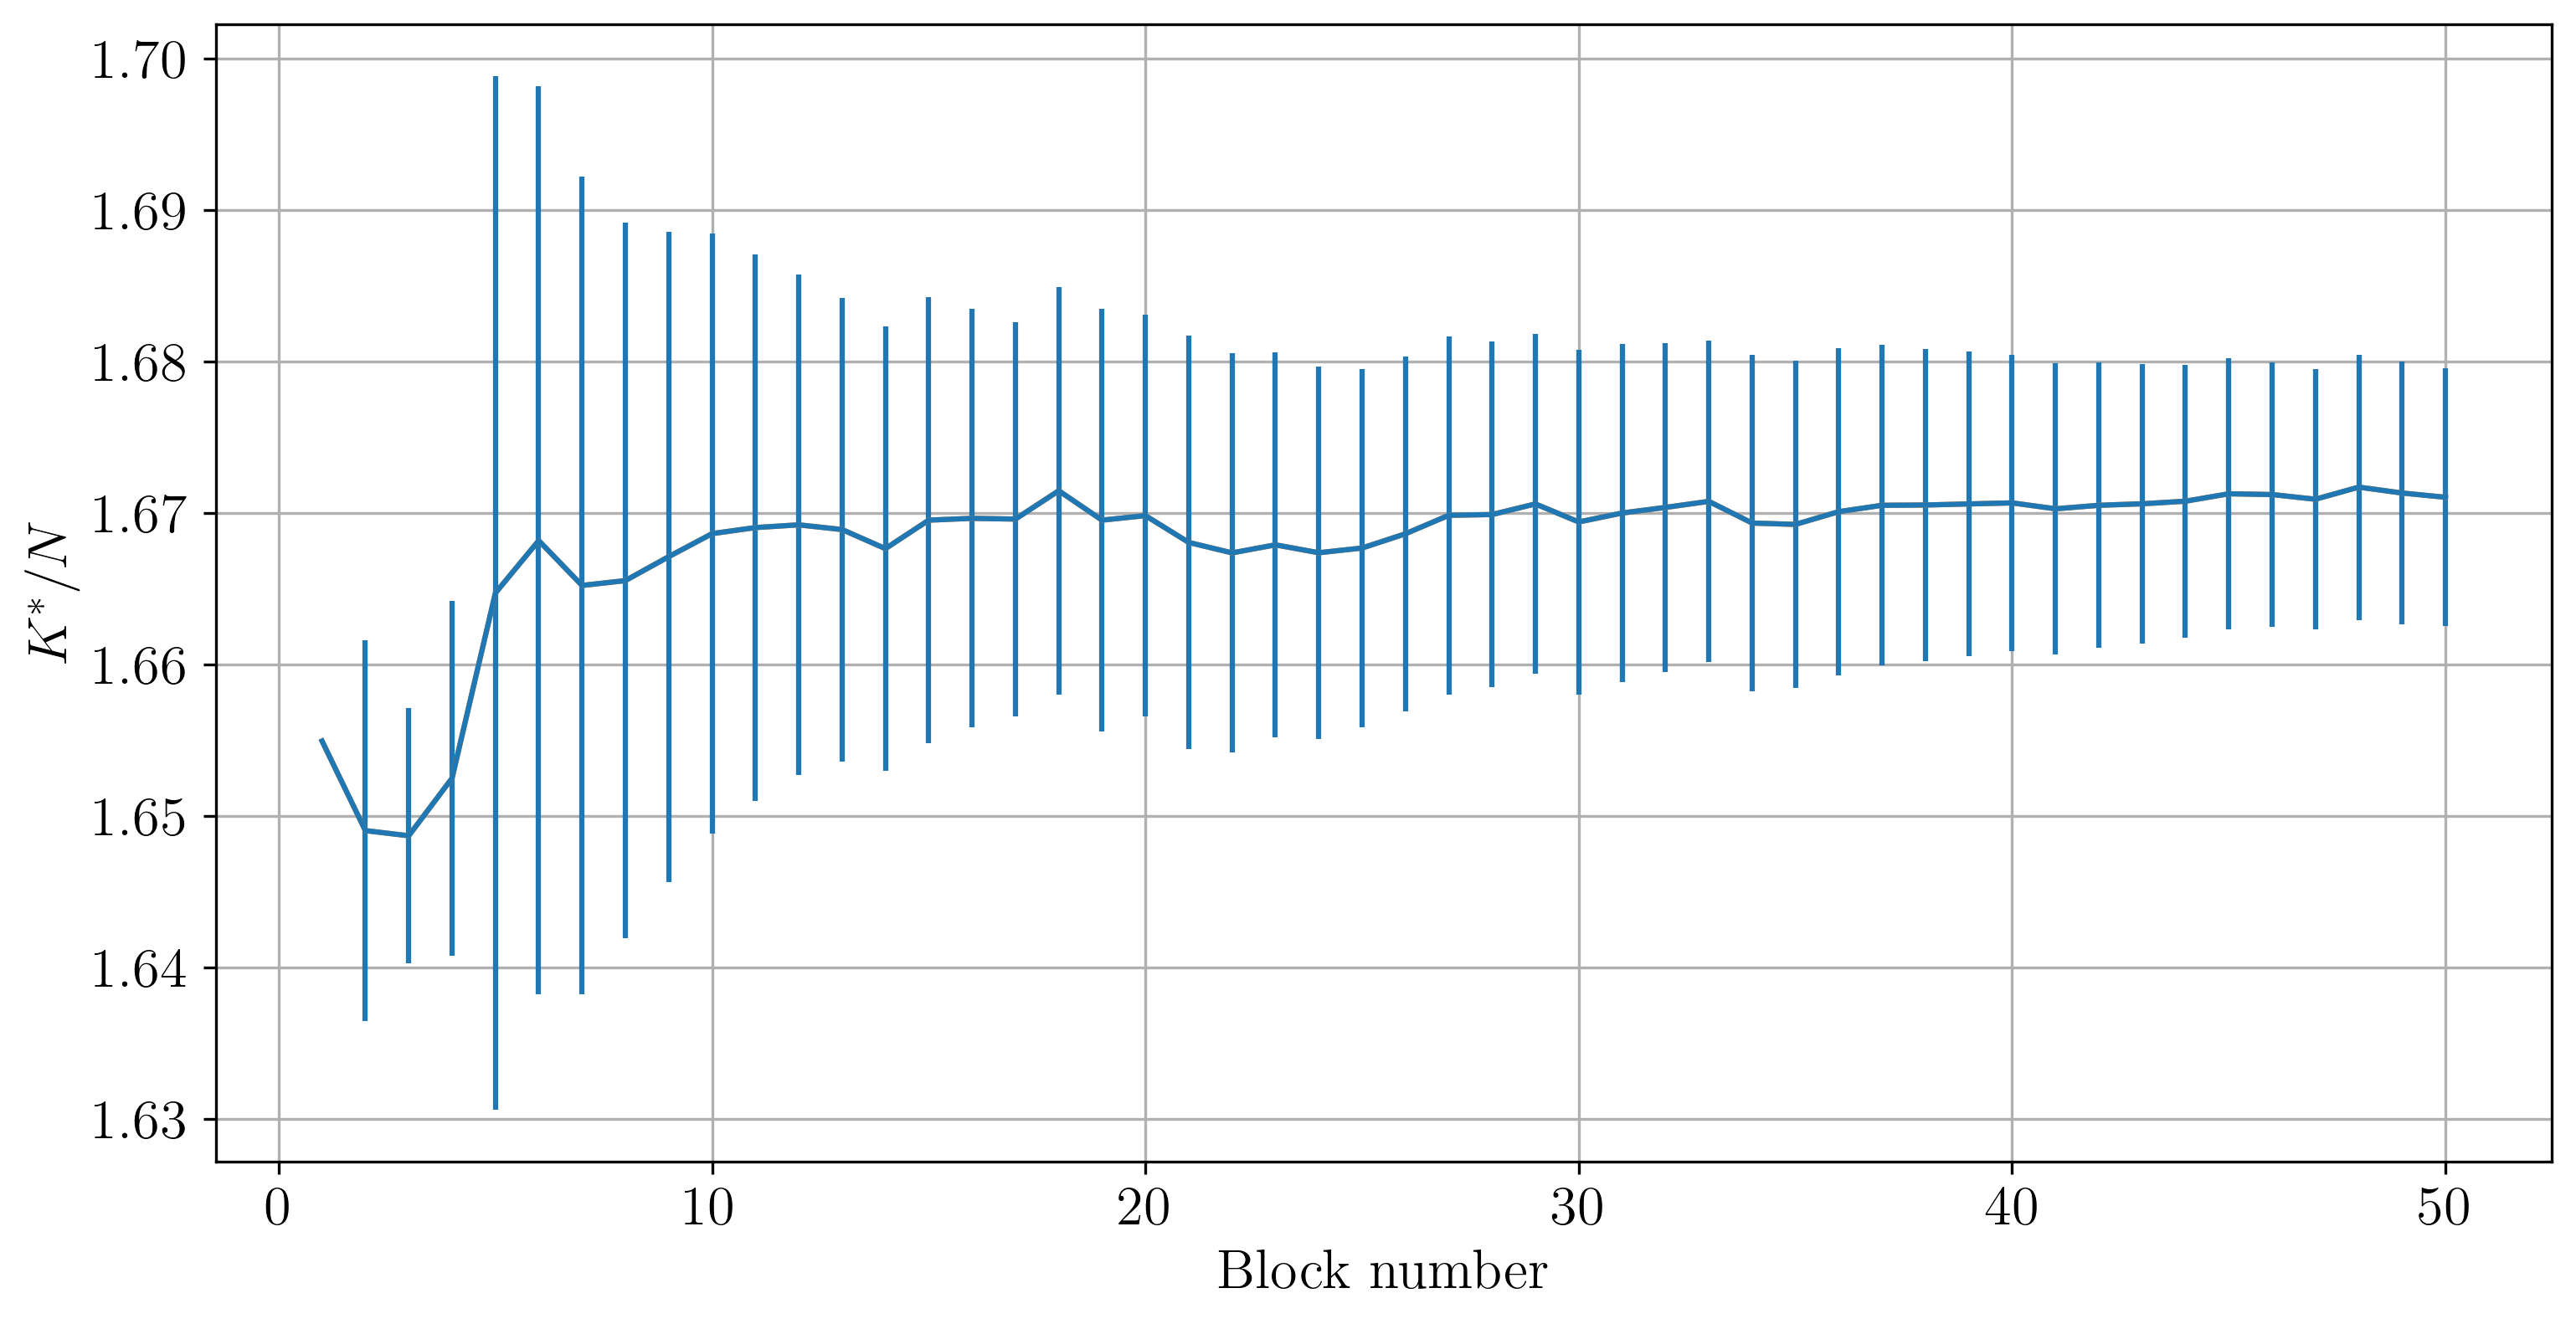

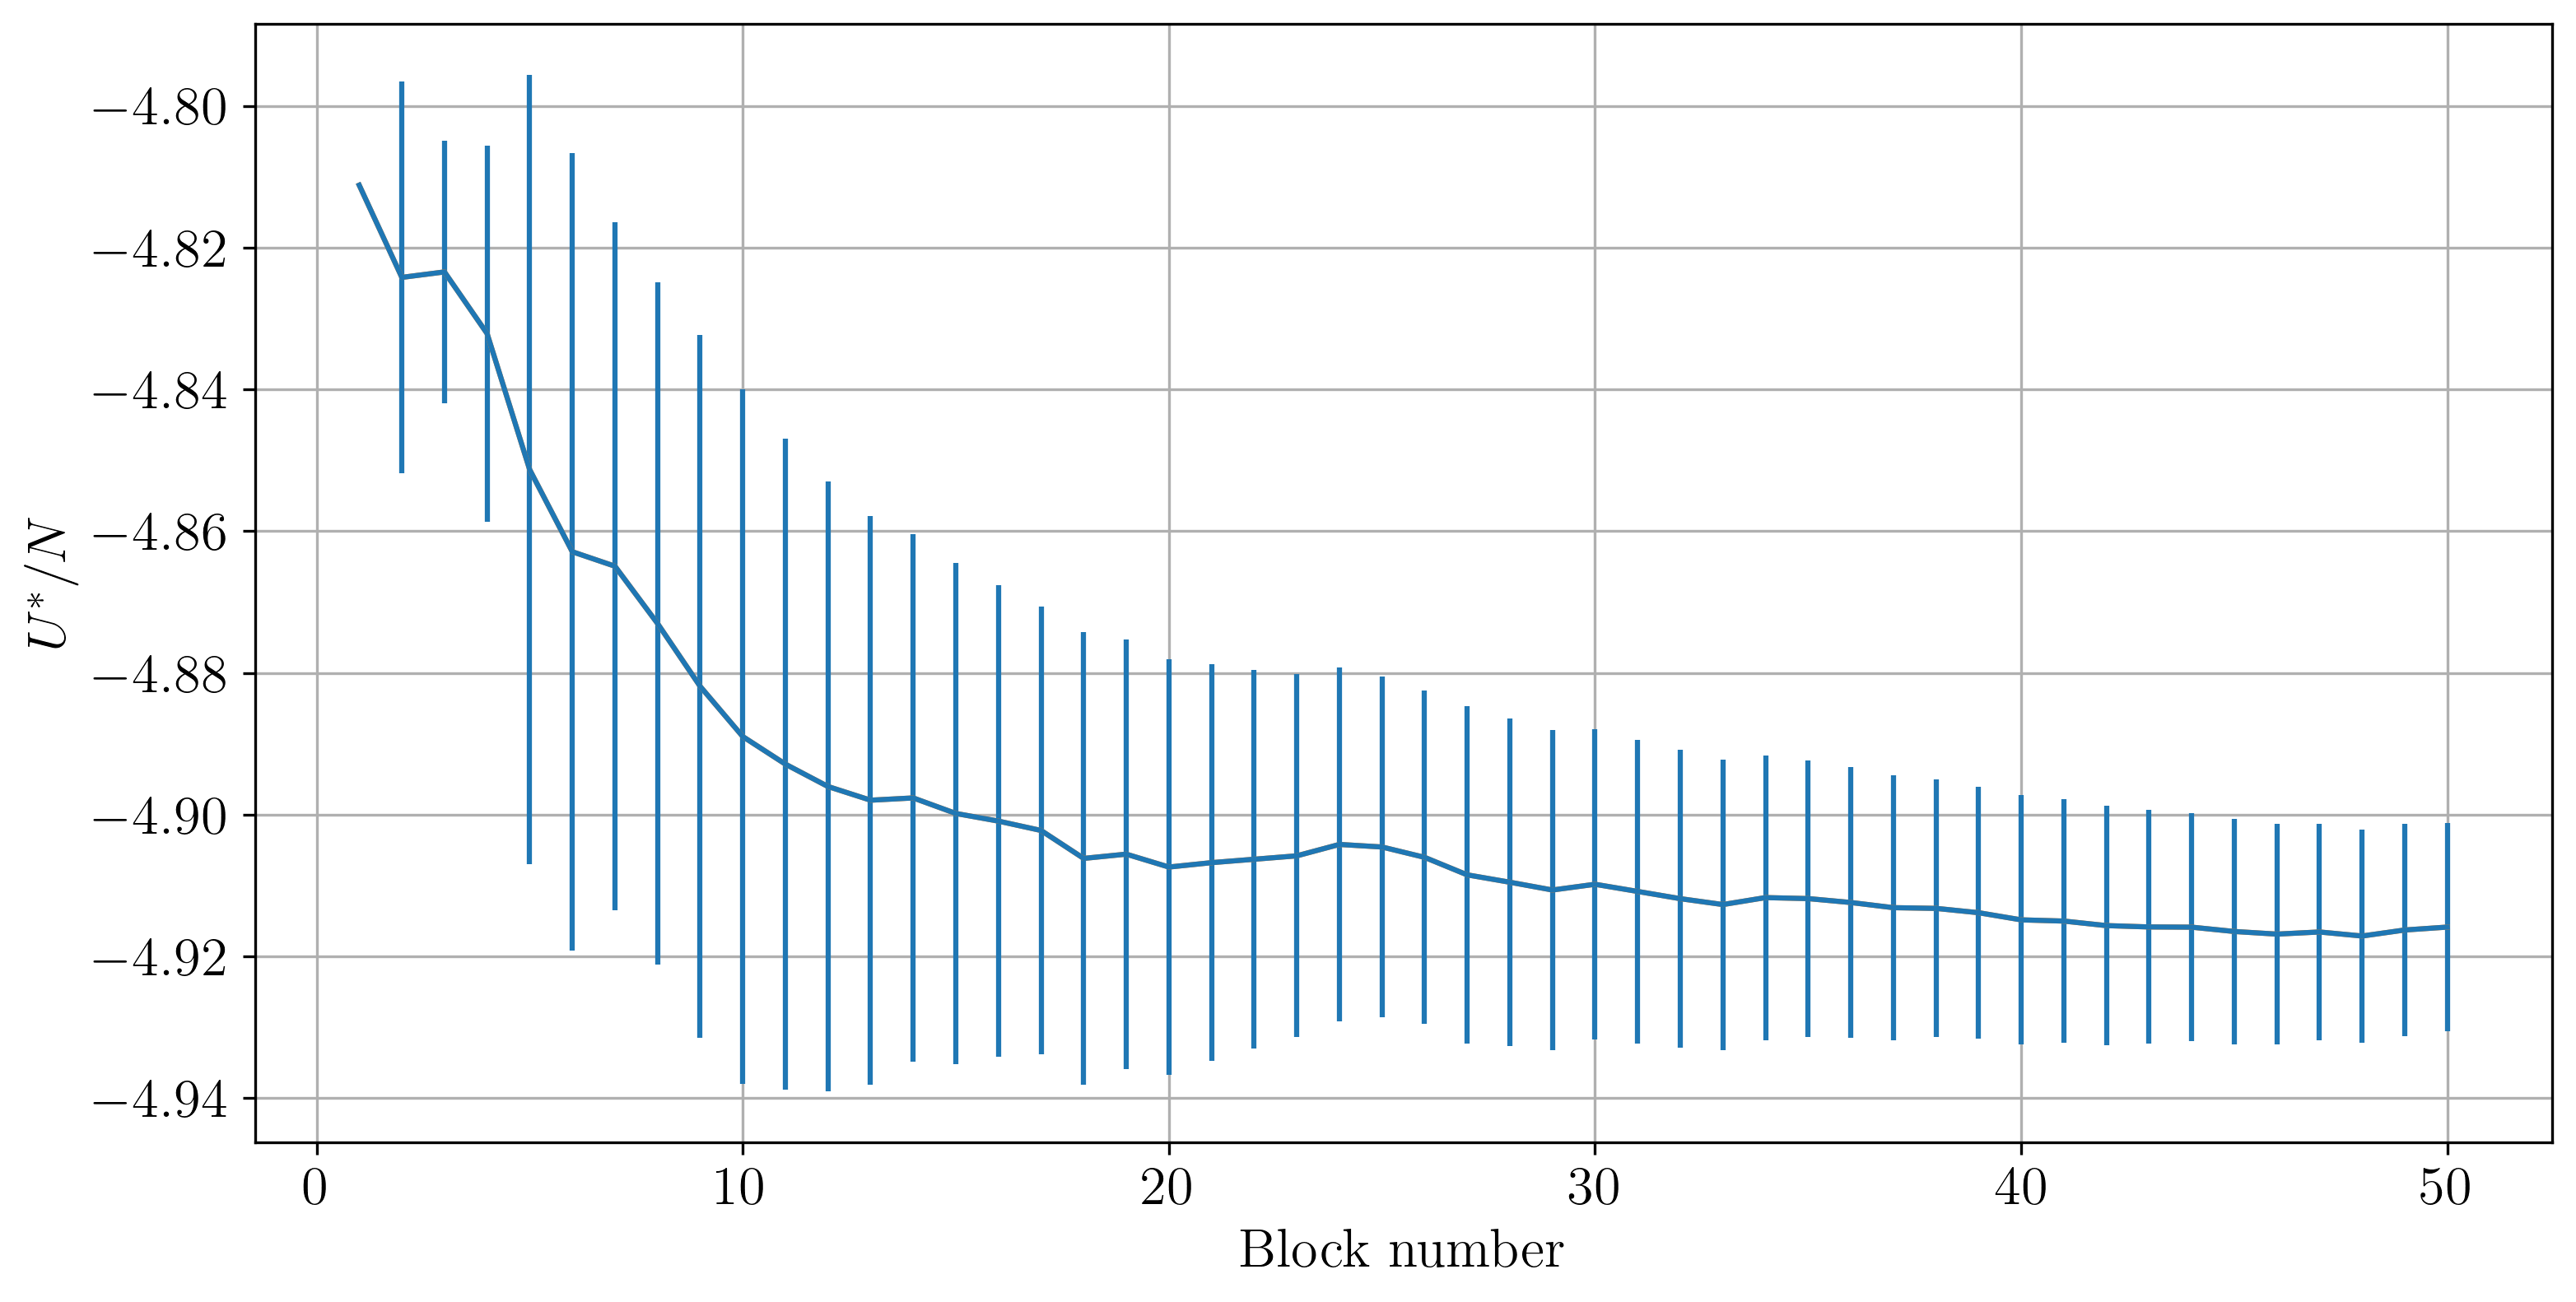

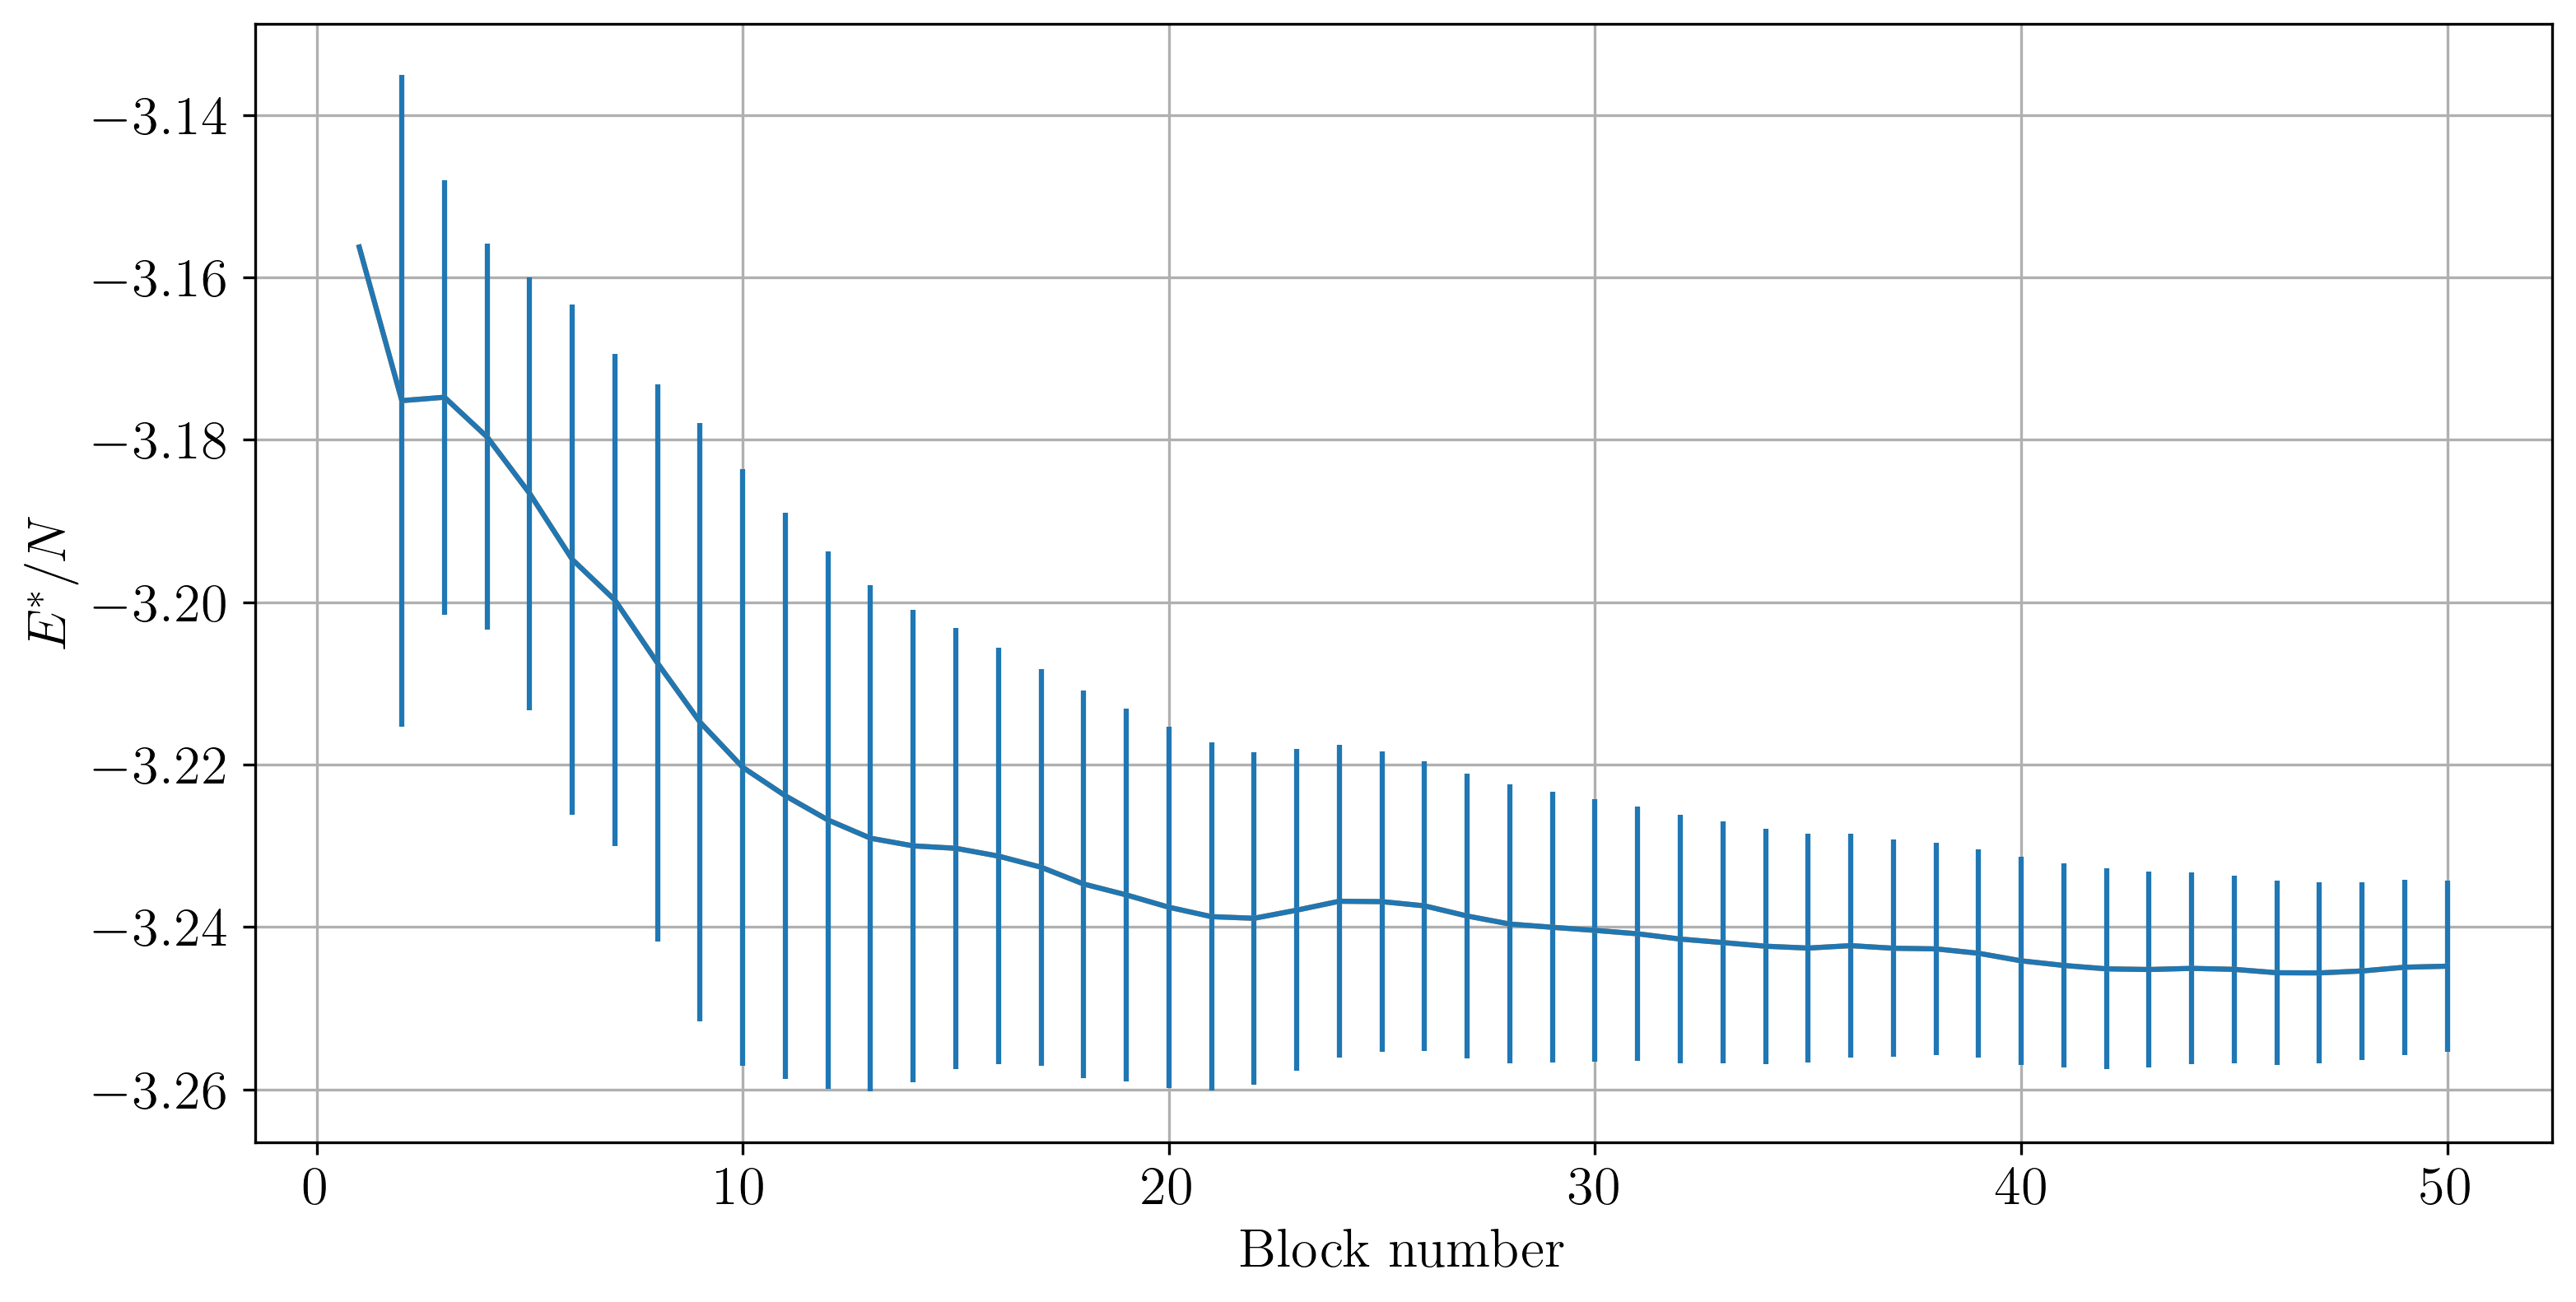

In [6]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
l = np.arange(-1,len(f1)+2)
plt.errorbar(x,g1,yerr=3*error1)
plt.fill_between(l, 1.089, 1.111, color='lightblue')
plt.xlabel('Block number')
plt.ylabel('$T^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_pres.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f2)+1)
plt.errorbar(x,g2,yerr=3*error2)
plt.plot(x,g2)
plt.xlabel('Block number')
plt.ylabel('$P^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_ekin.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f3)+1)
plt.errorbar(x,g3,yerr=3*error3)
plt.plot(x,g3)
plt.xlabel('Block number')
plt.ylabel('$K^*/N$')
plt.grid(True)

plt.show()

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f4, g4, error4 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_epot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f4)+1)
plt.errorbar(x,g4,yerr=3*error4)
plt.plot(x,g4)
plt.xlabel('Block number')
plt.ylabel('$U^*/N$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f5, g5, error5 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_etot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f5)+1)
plt.errorbar(x,g5,yerr=3*error5)
plt.plot(x,g5)
plt.xlabel('Block number')
plt.ylabel('$E^*/N$')
plt.grid(True)

plt.show()

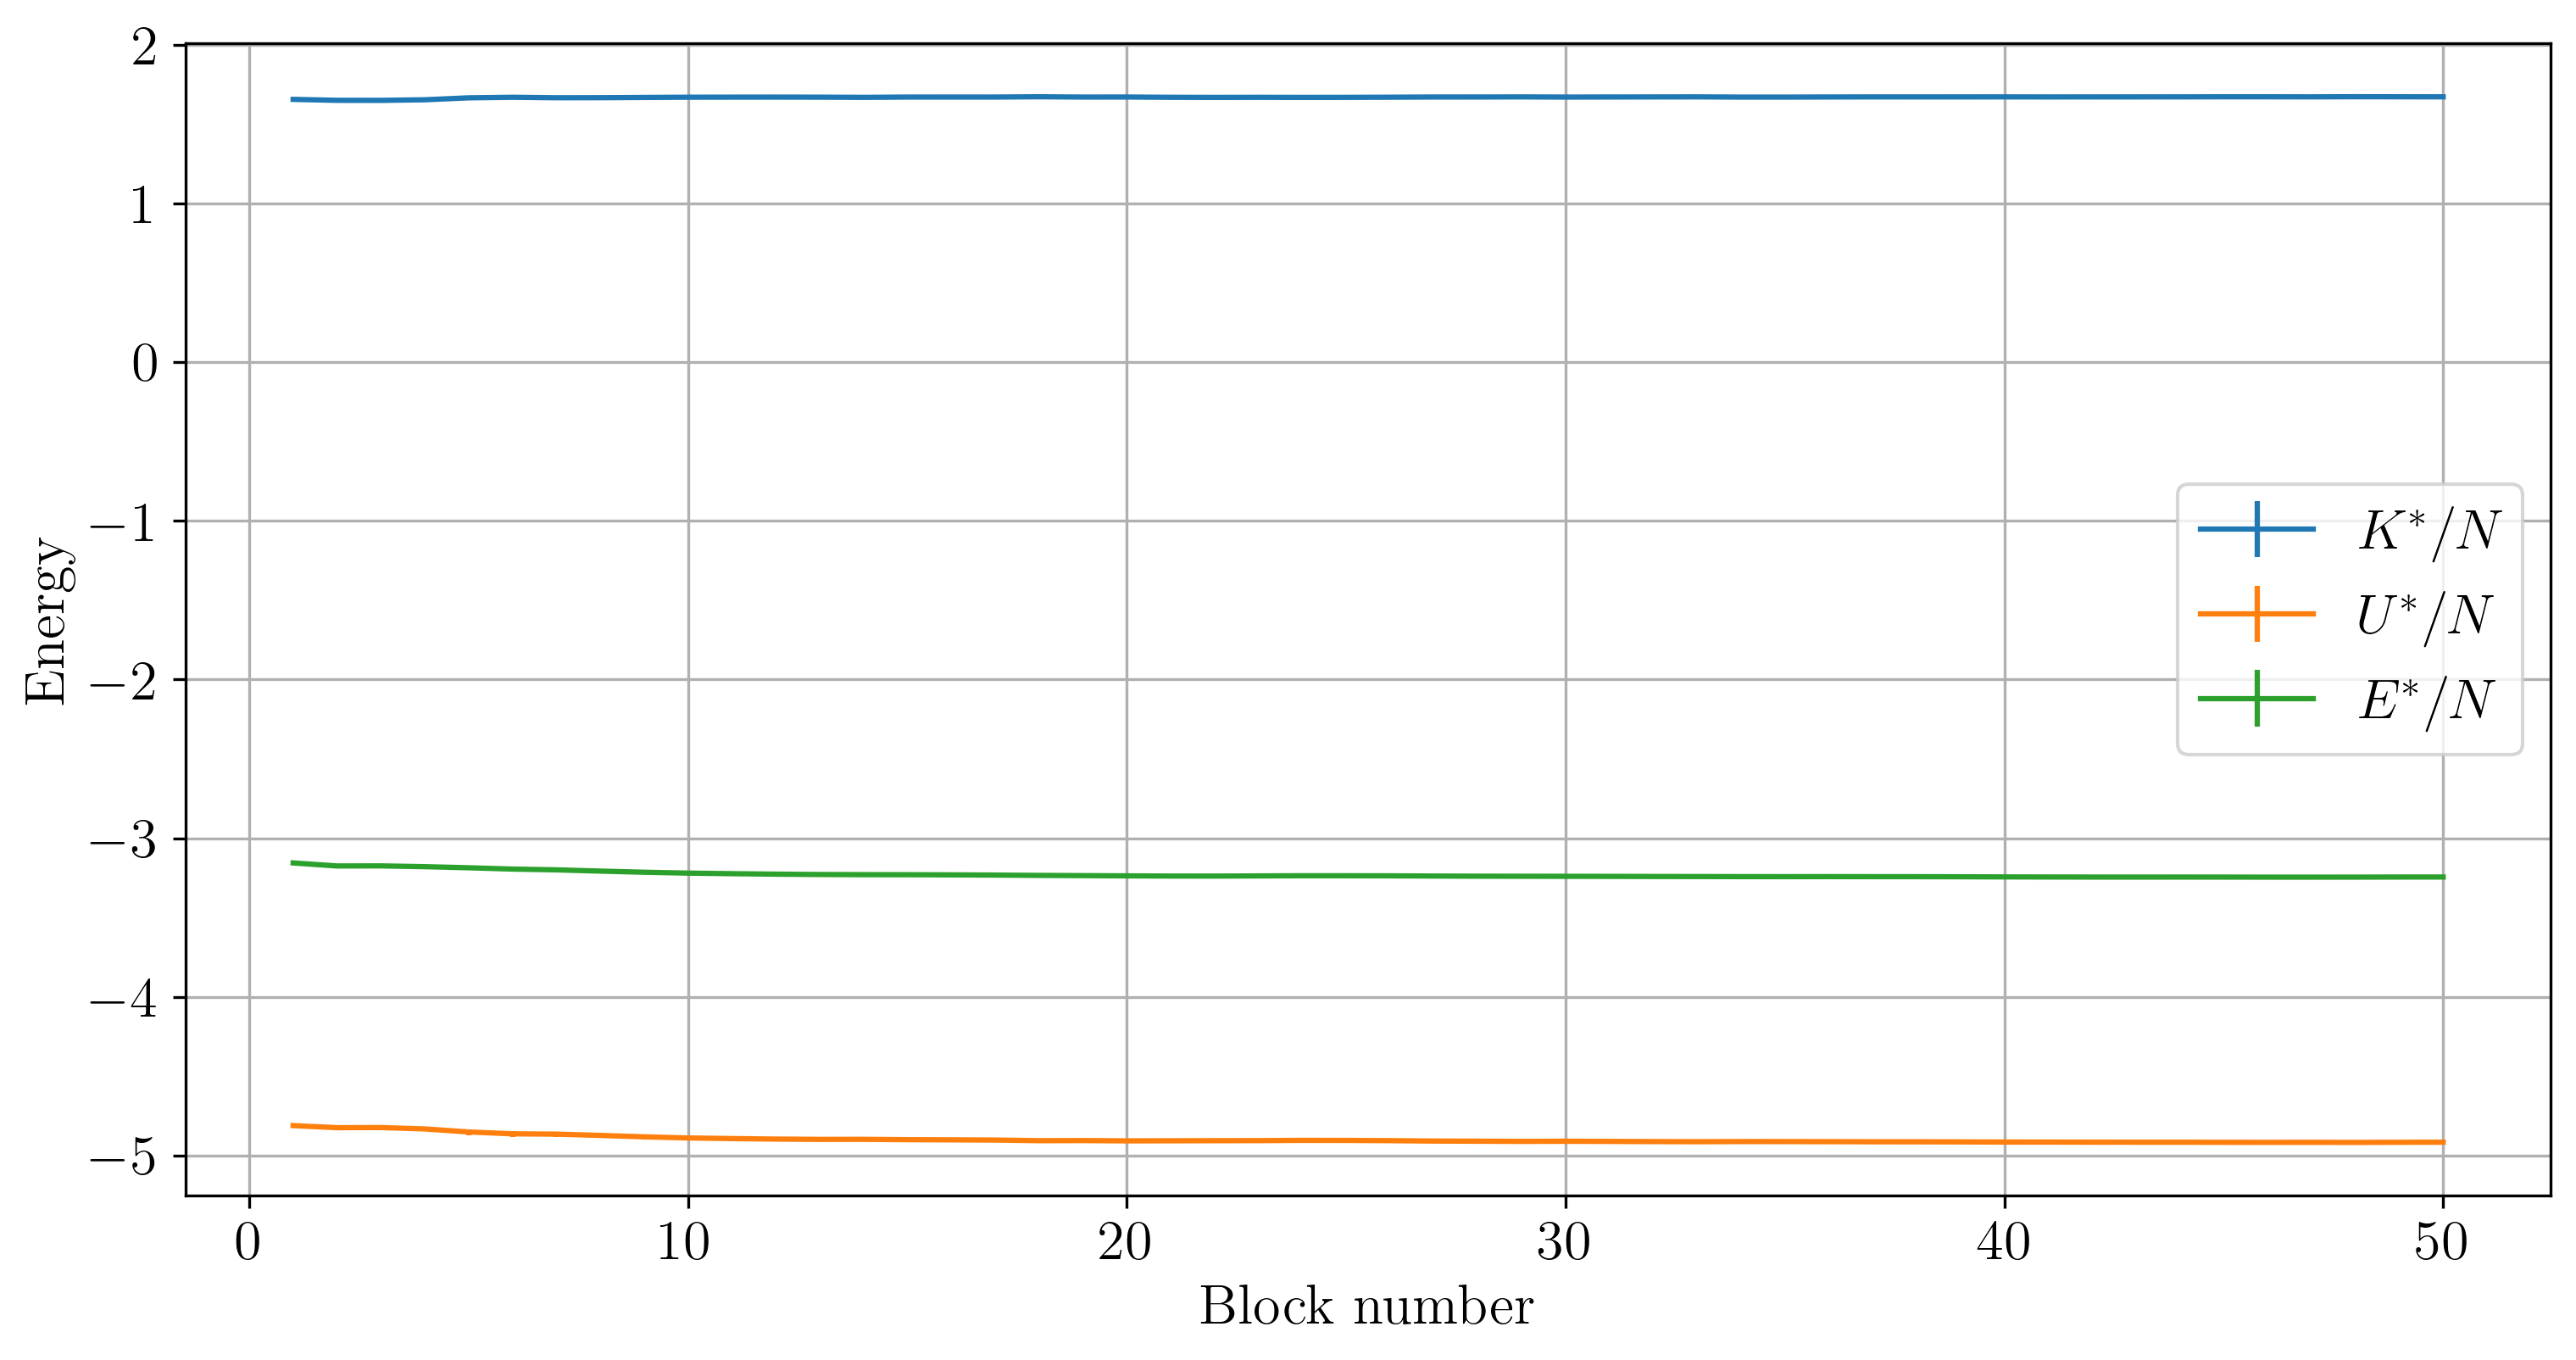

In [7]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_ekin.dat", usecols=(1,2,3), unpack='true')
f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_epot.dat", usecols=(1,2,3), unpack='true')
f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/liquid_output_etot.dat", usecols=(1,2,3), unpack='true')

x = np.arange(1, len(f1)+1)
plt.errorbar(x,g1,yerr=error1,label="$K^*/N$")
plt.errorbar(x,g2,yerr=error2,label="$U^*/N$")
plt.errorbar(x,g3,yerr=error3,label="$E^*/N$")
plt.xlabel('Block number')
plt.ylabel('Energy')
plt.grid(True)

plt.legend()

plt.show()

#### <span style="color:darkblue">GAS</span>
**Equilibration**: 

- $\texttt{nblocks=30000}$

- $\texttt{nstep=1}$

- Target $T^* = 1.2$ 

- target error $ \delta T^*/T^* = \pm 1\%$

**Simulation**: 
- $\texttt{nblocks=50}$
- $\texttt{nstep=2000}$

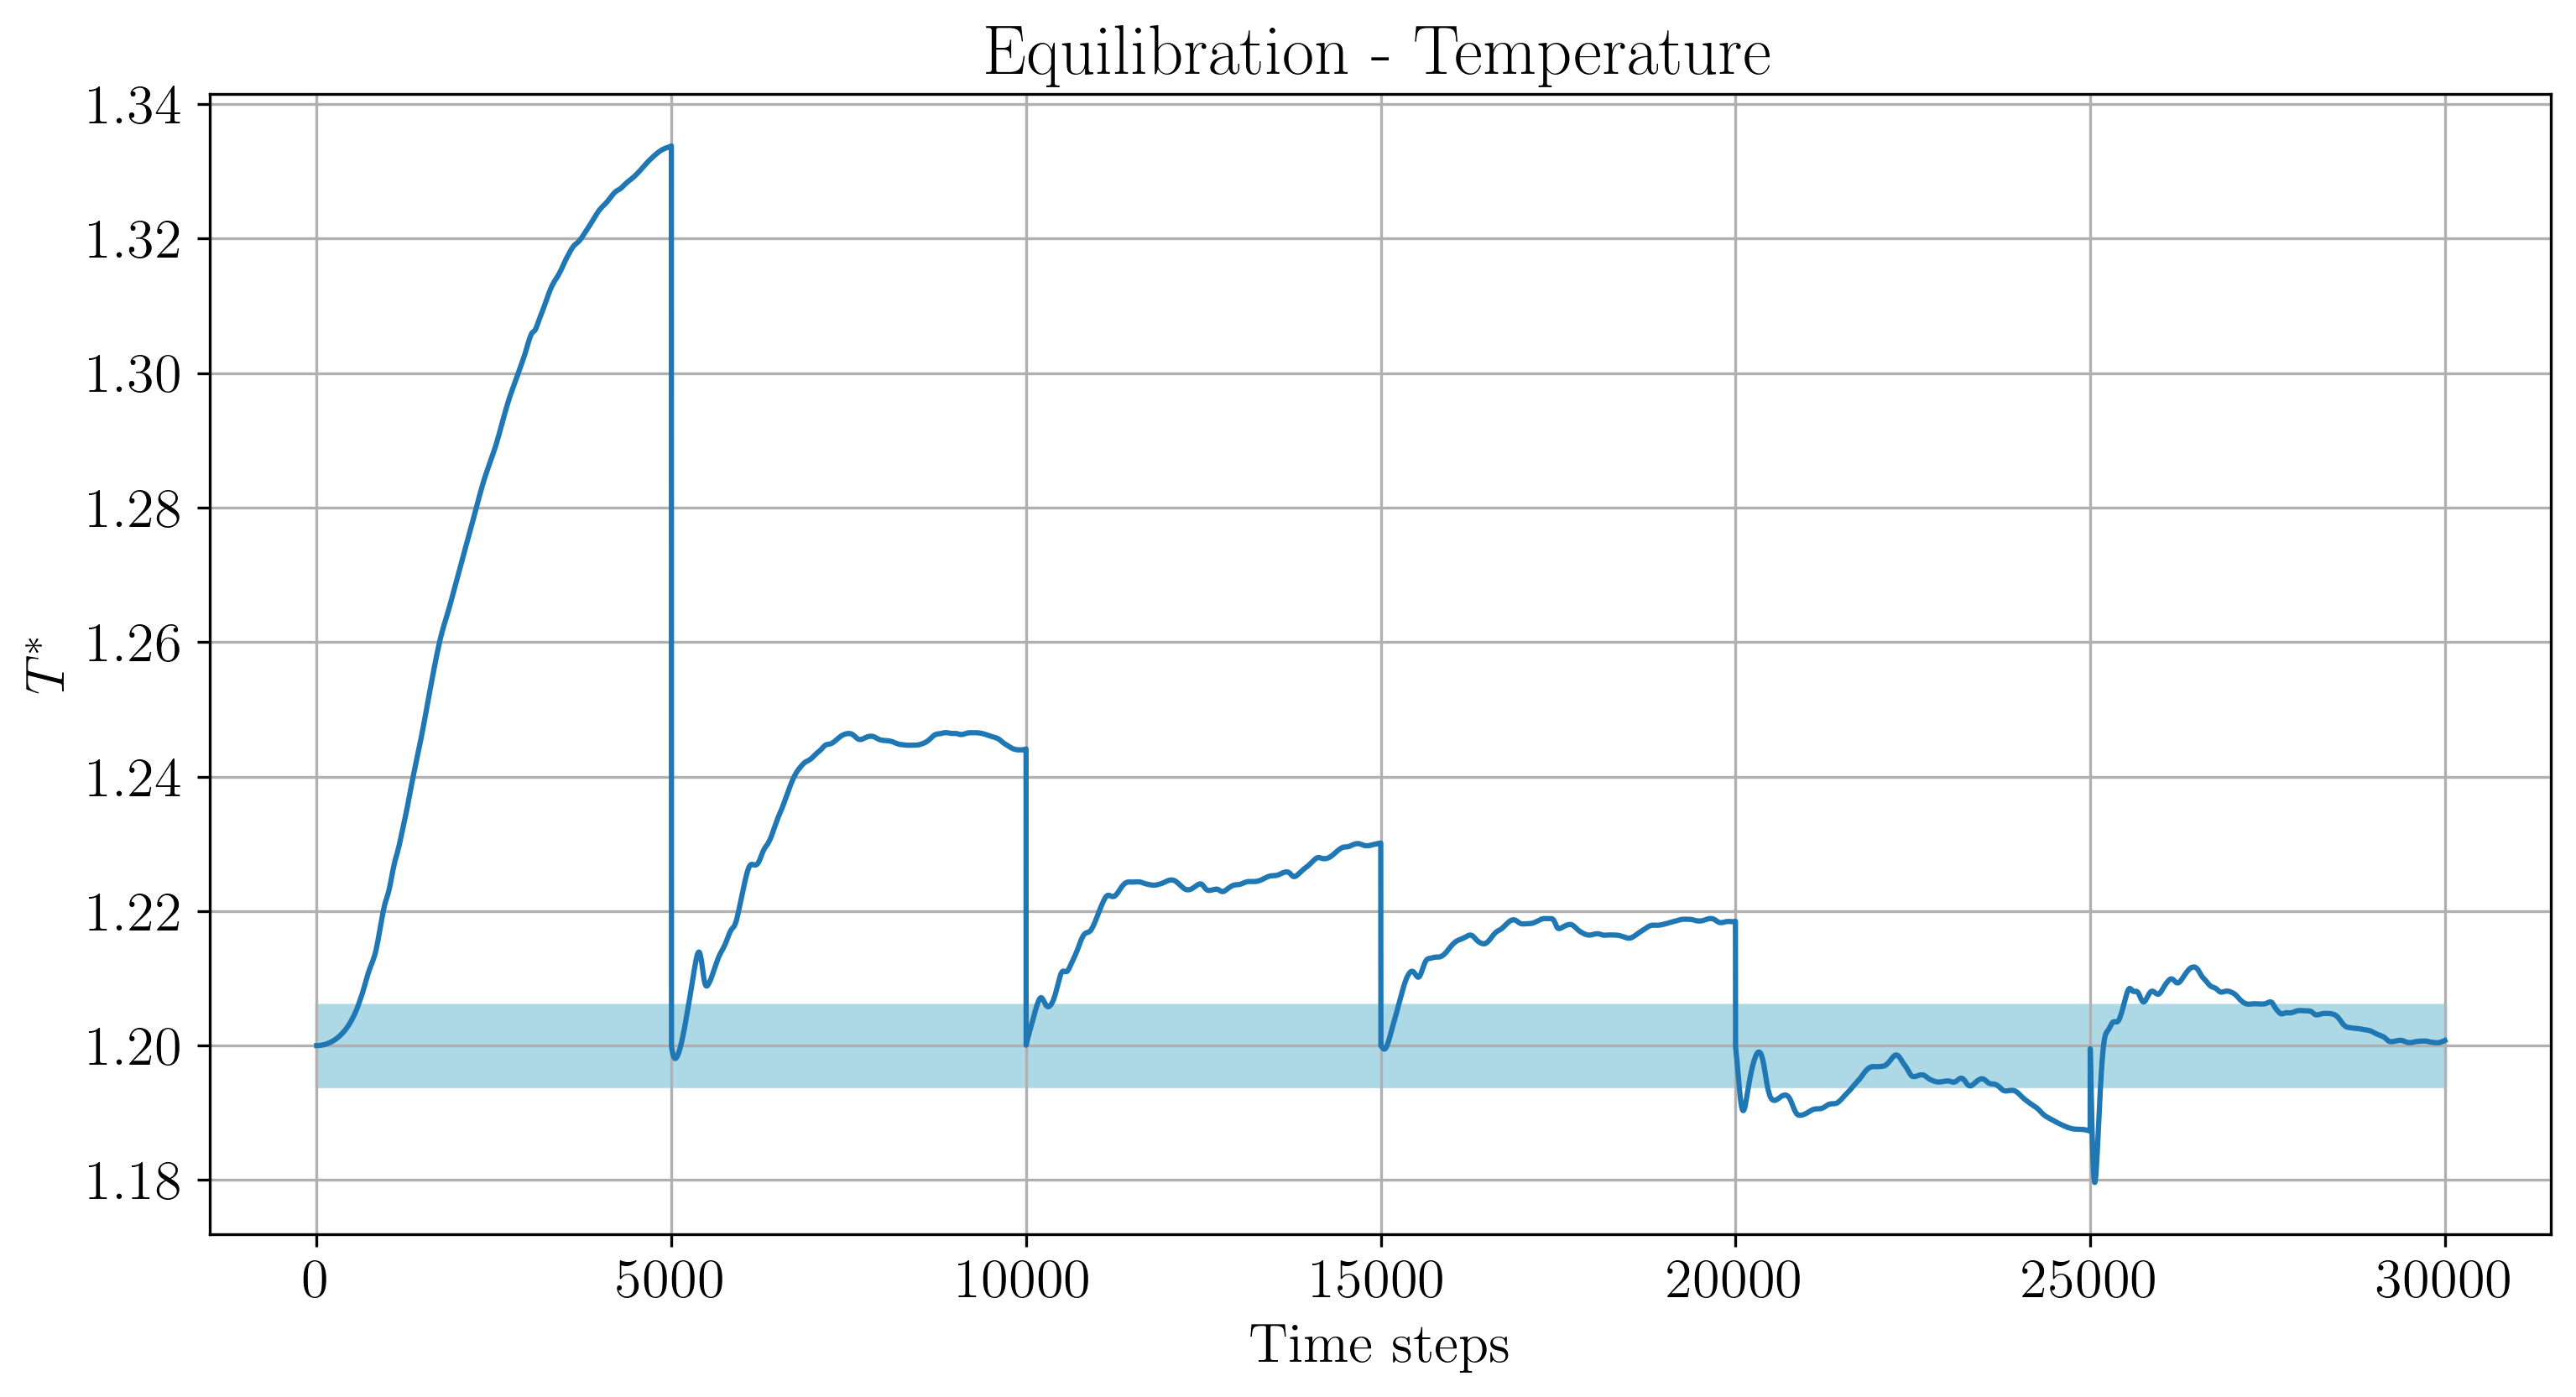

In [8]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/equilibration_gas_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
l = np.arange(-1,len(f1)+1)
plt.plot(x,g1)
#plt.plot(x,f1)
plt.fill_between(l, 1.194, 1.206, color='lightblue')
plt.title('Equilibration - Temperature', fontsize=20)
plt.xlabel('Time steps')
plt.ylabel('$T^*$')
plt.grid(True)

plt.show()

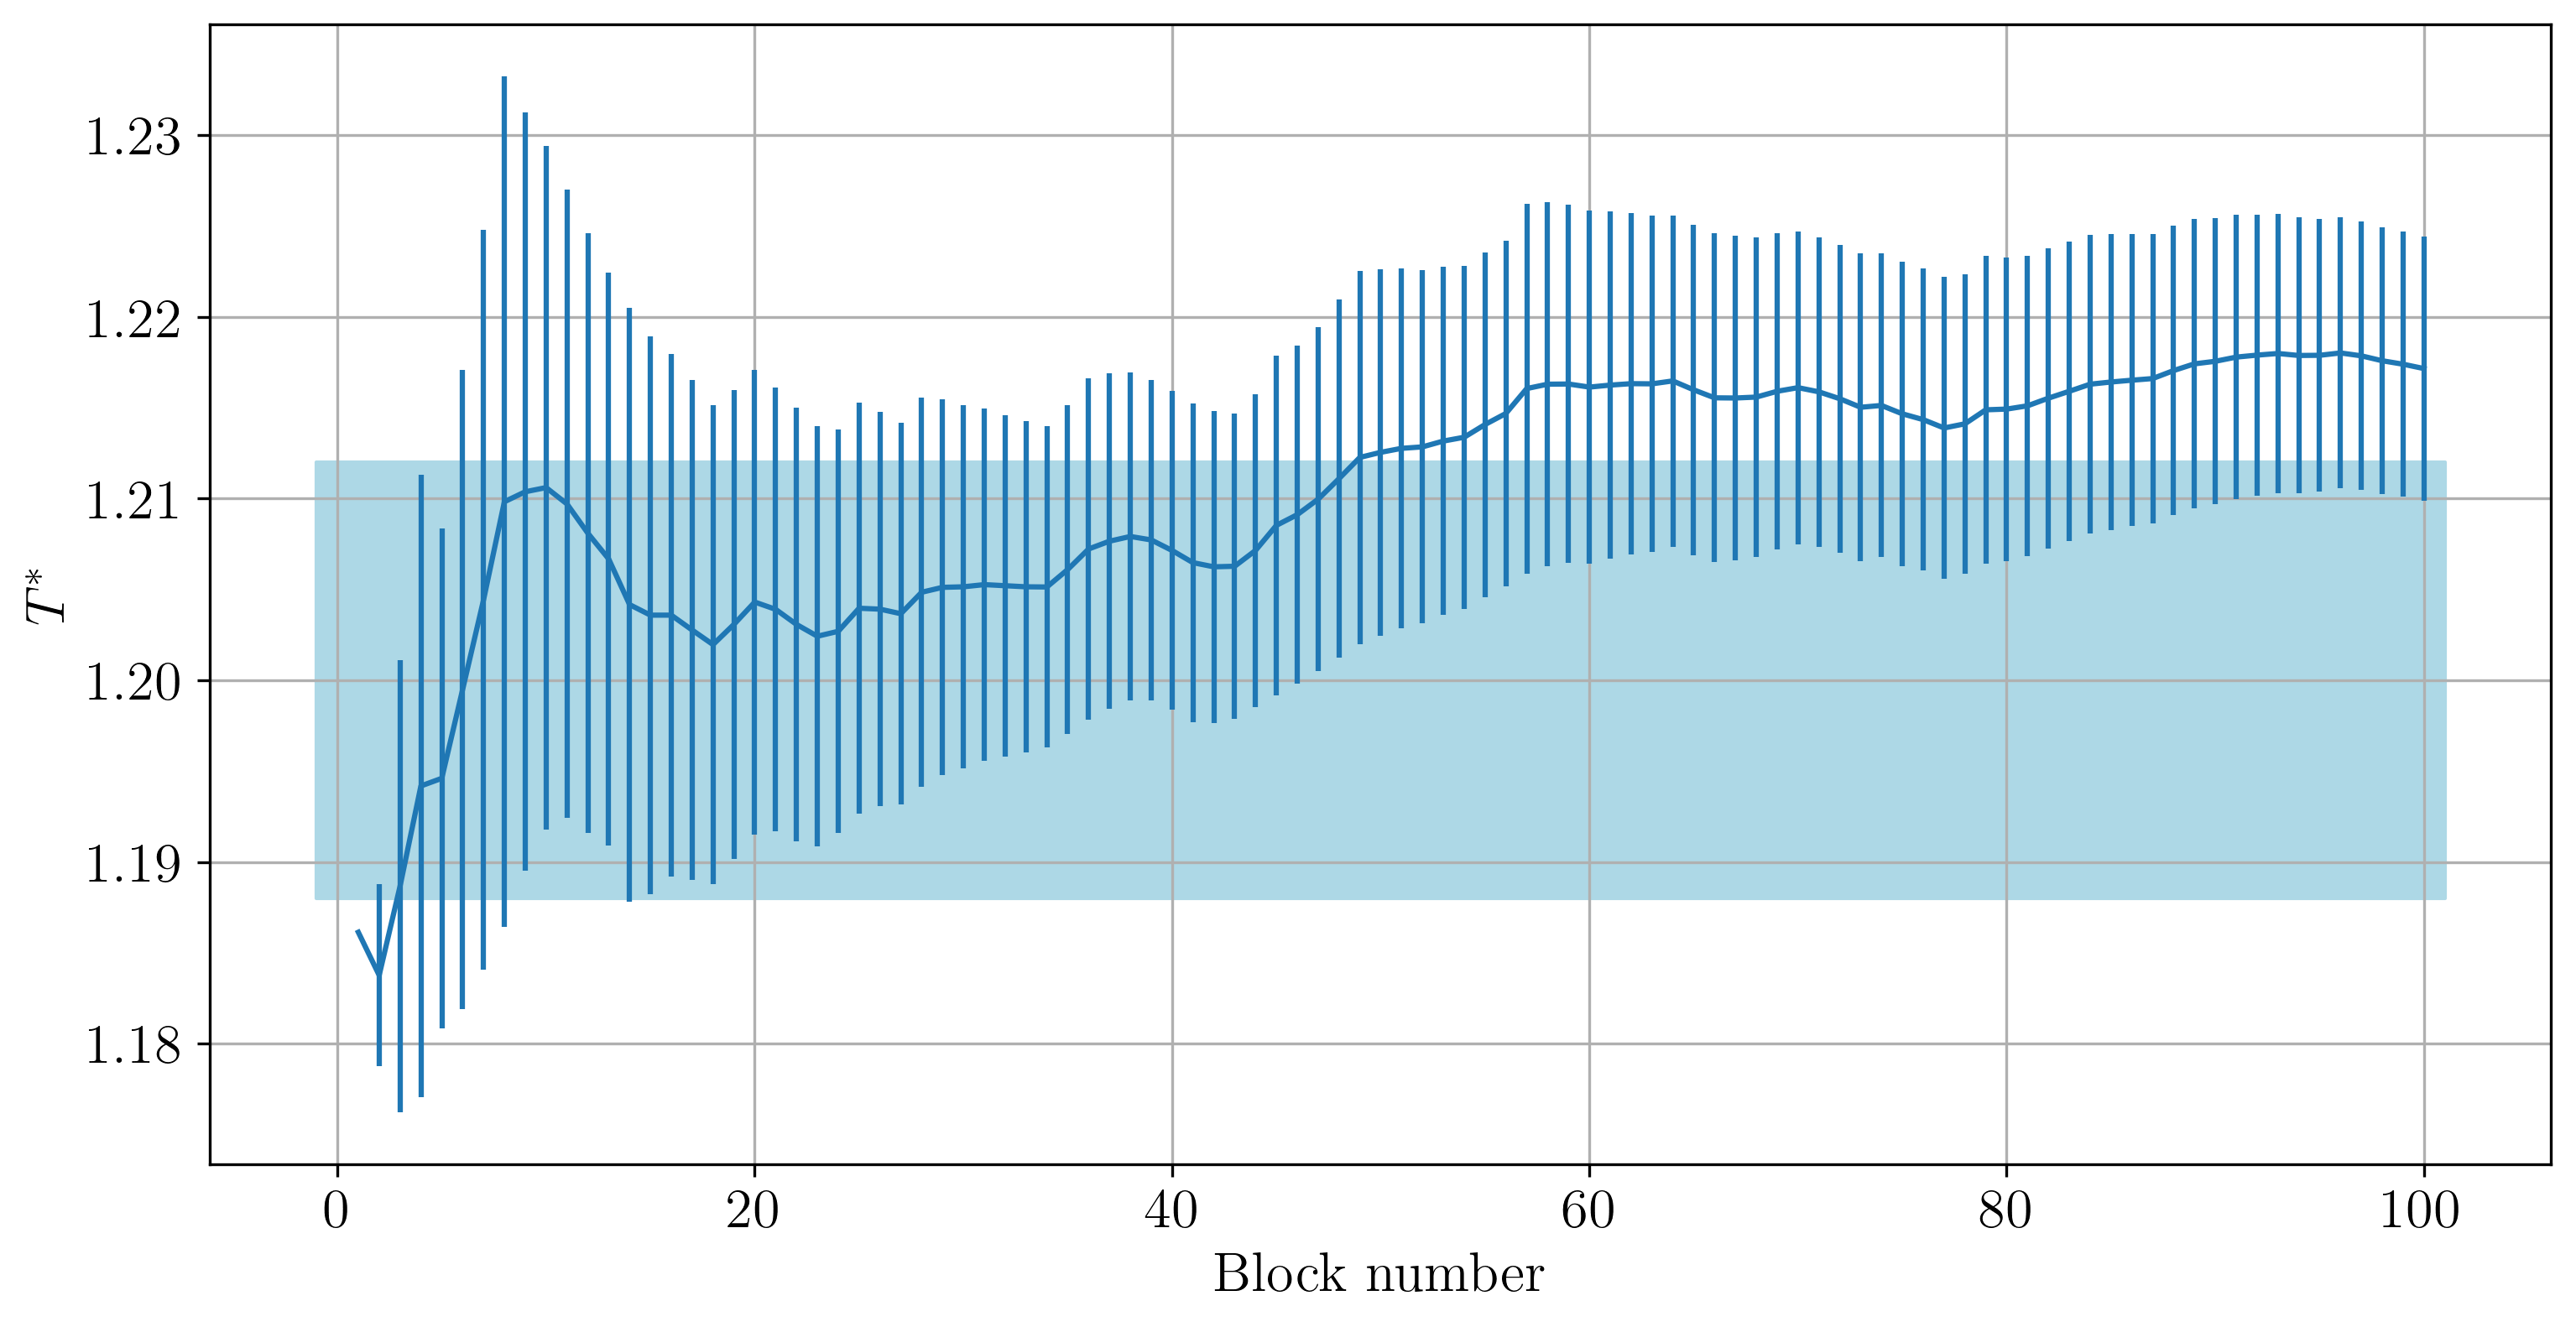

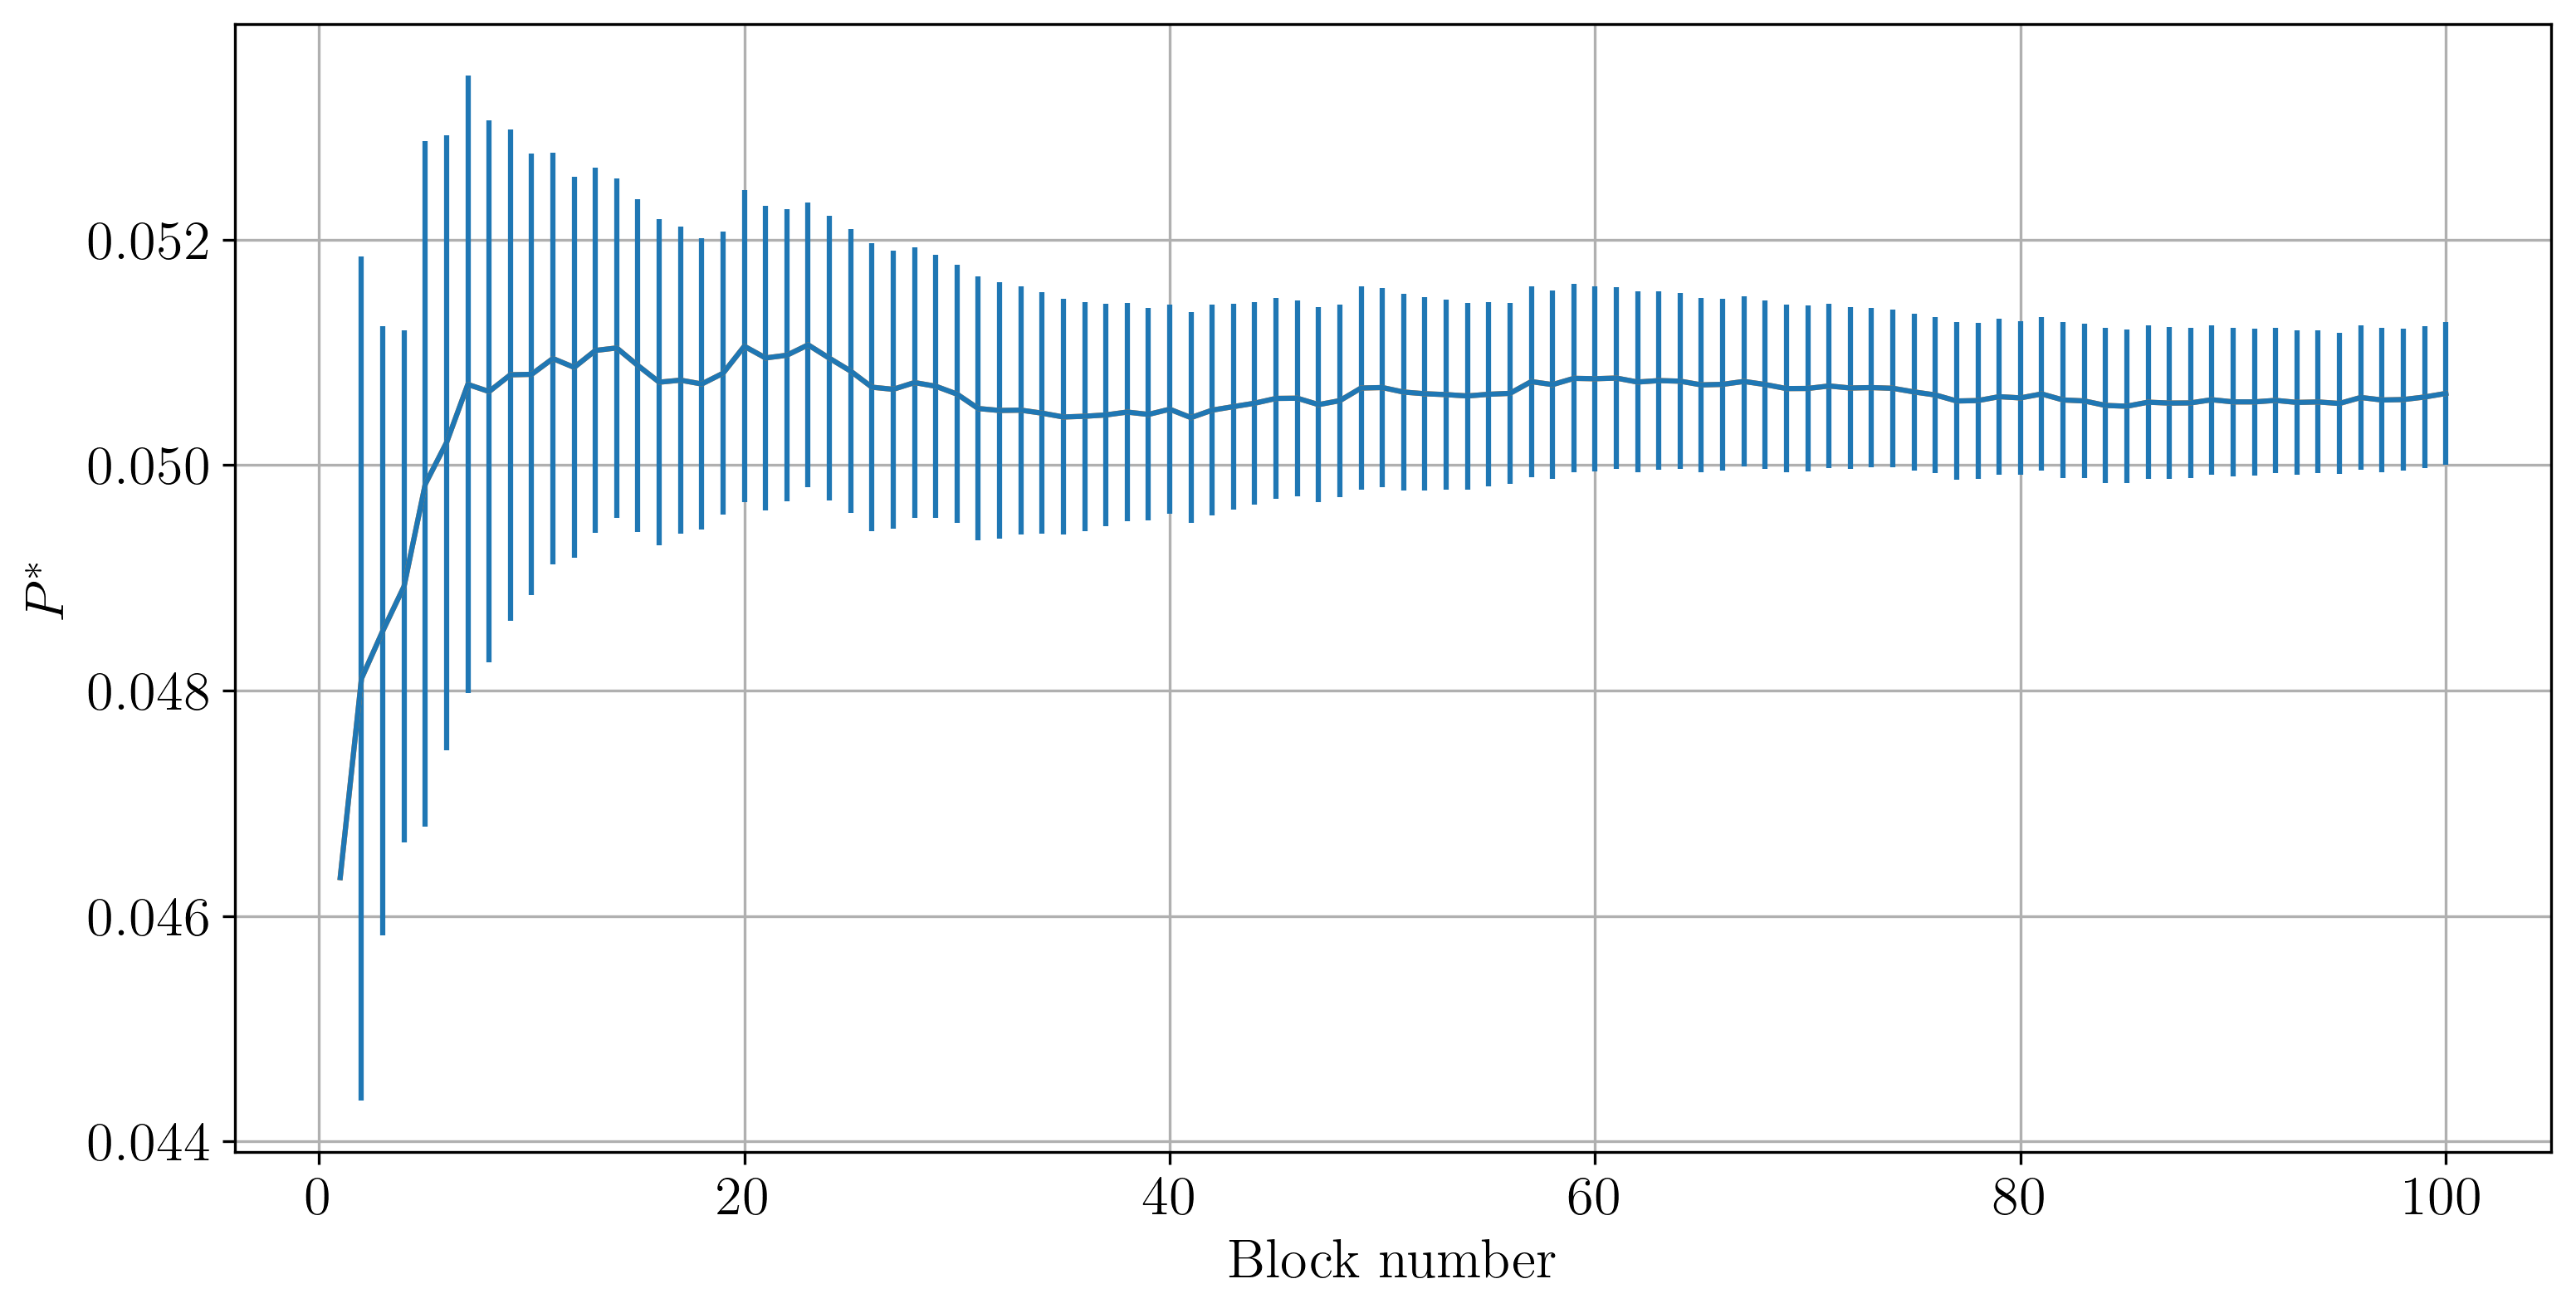

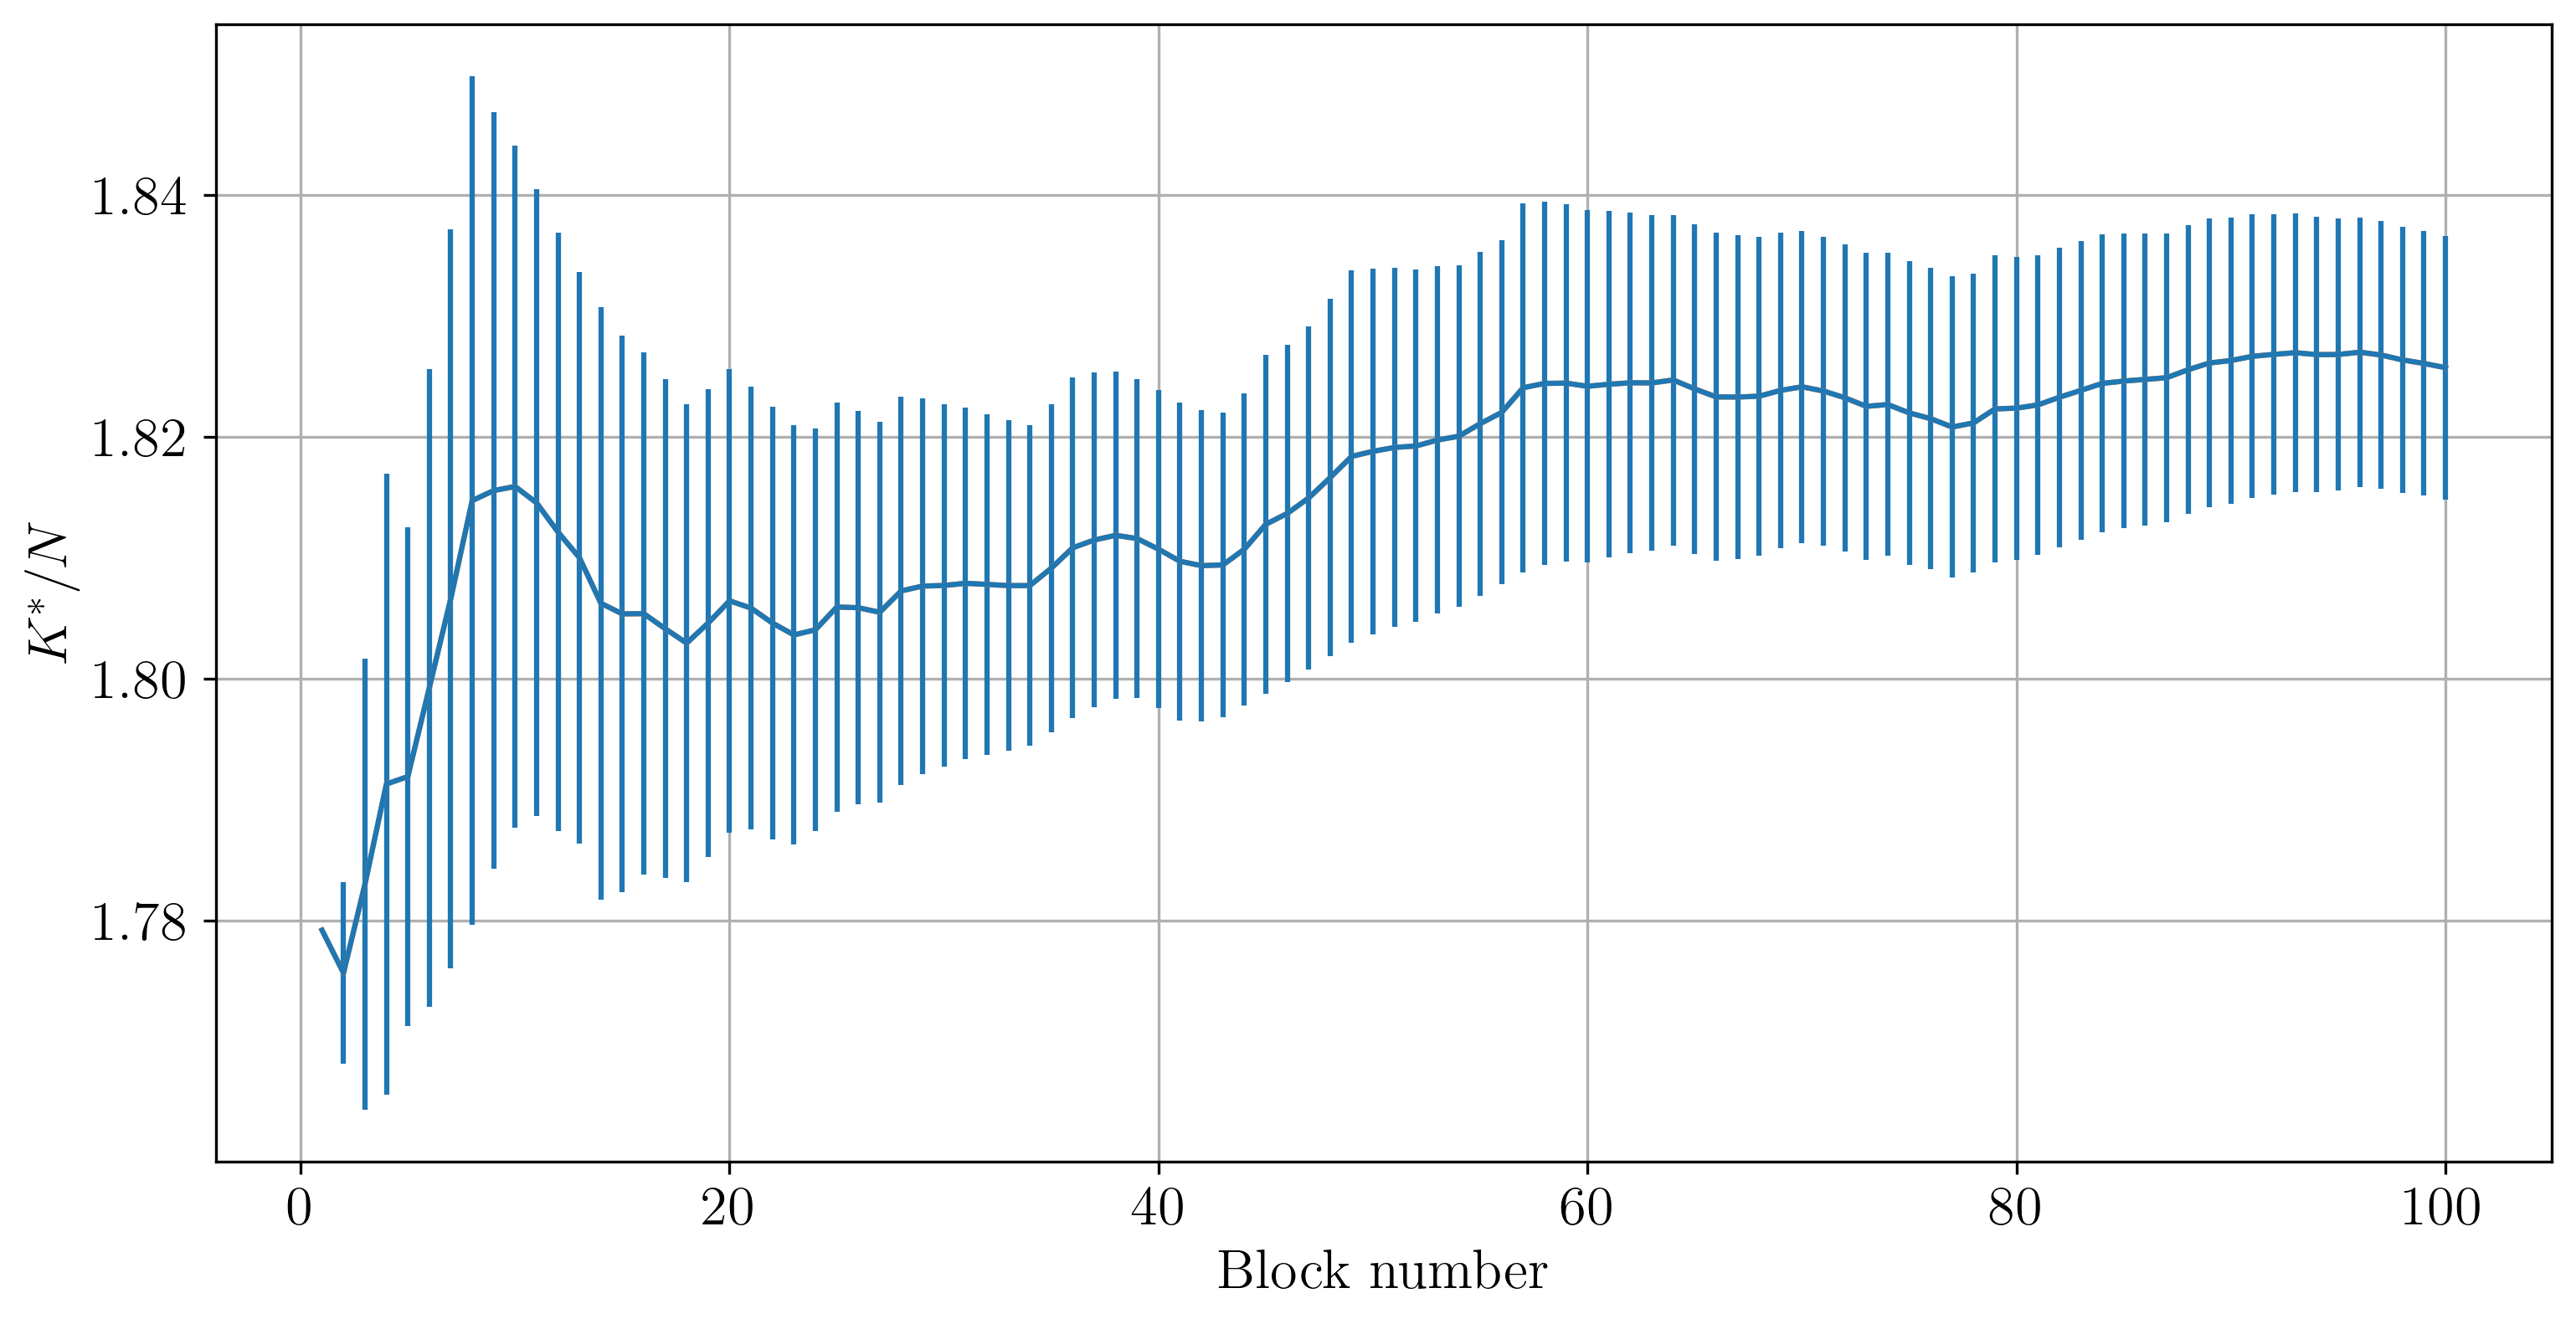

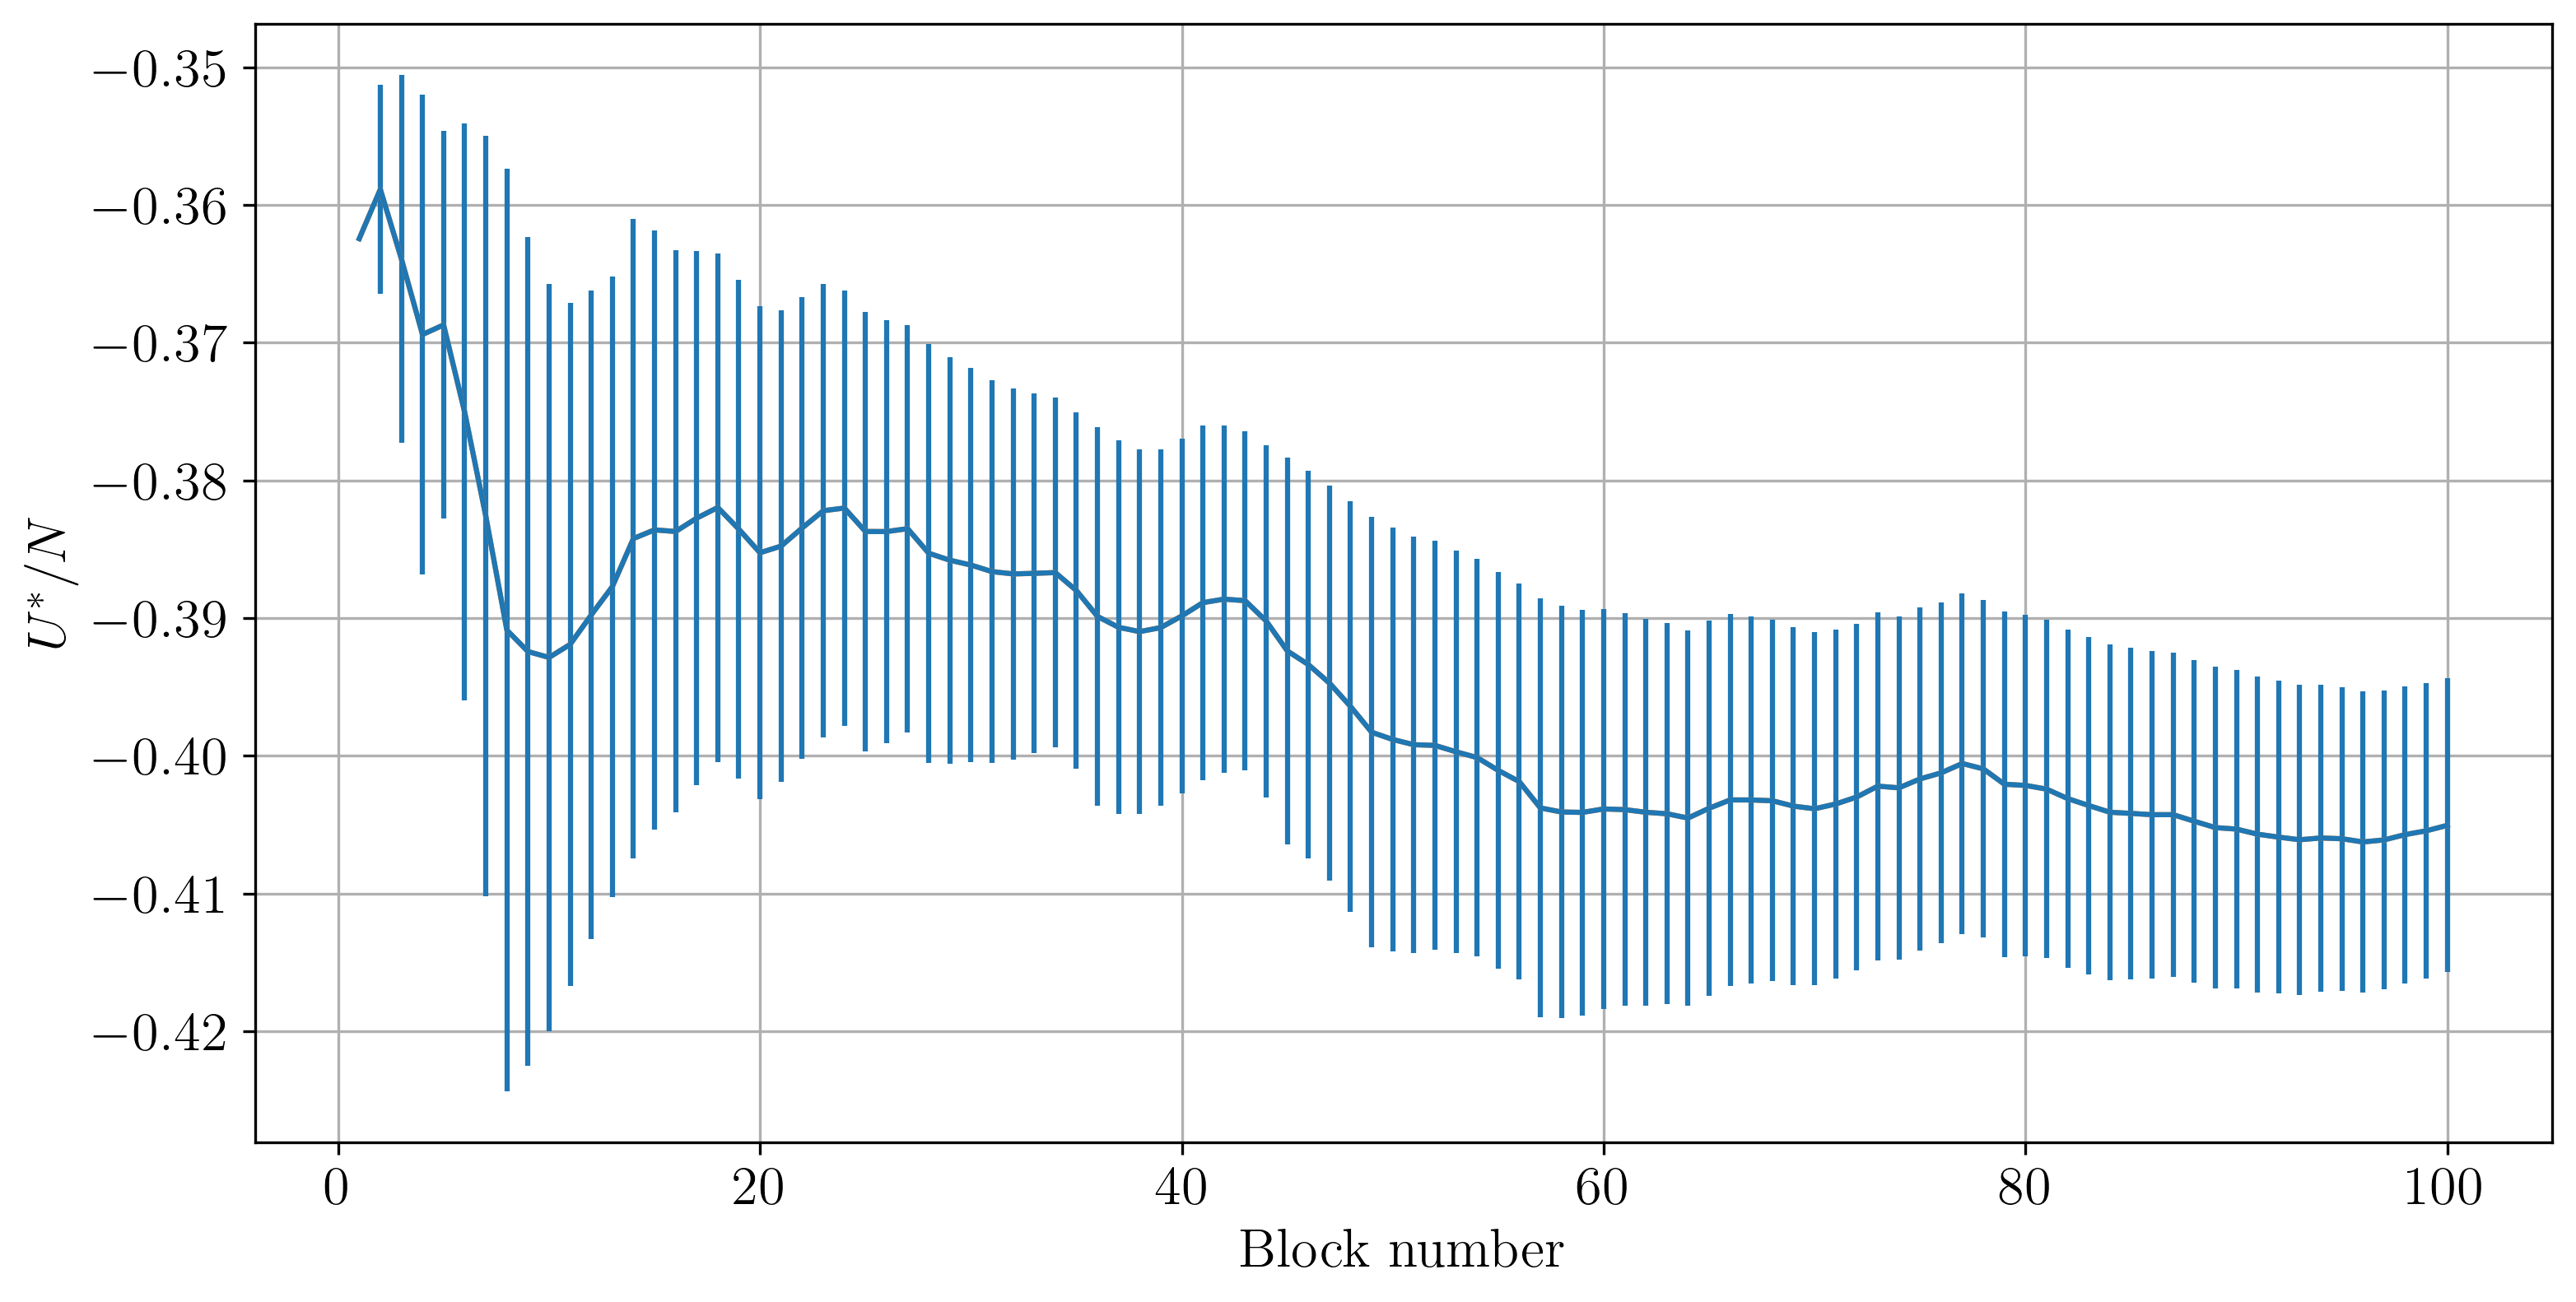

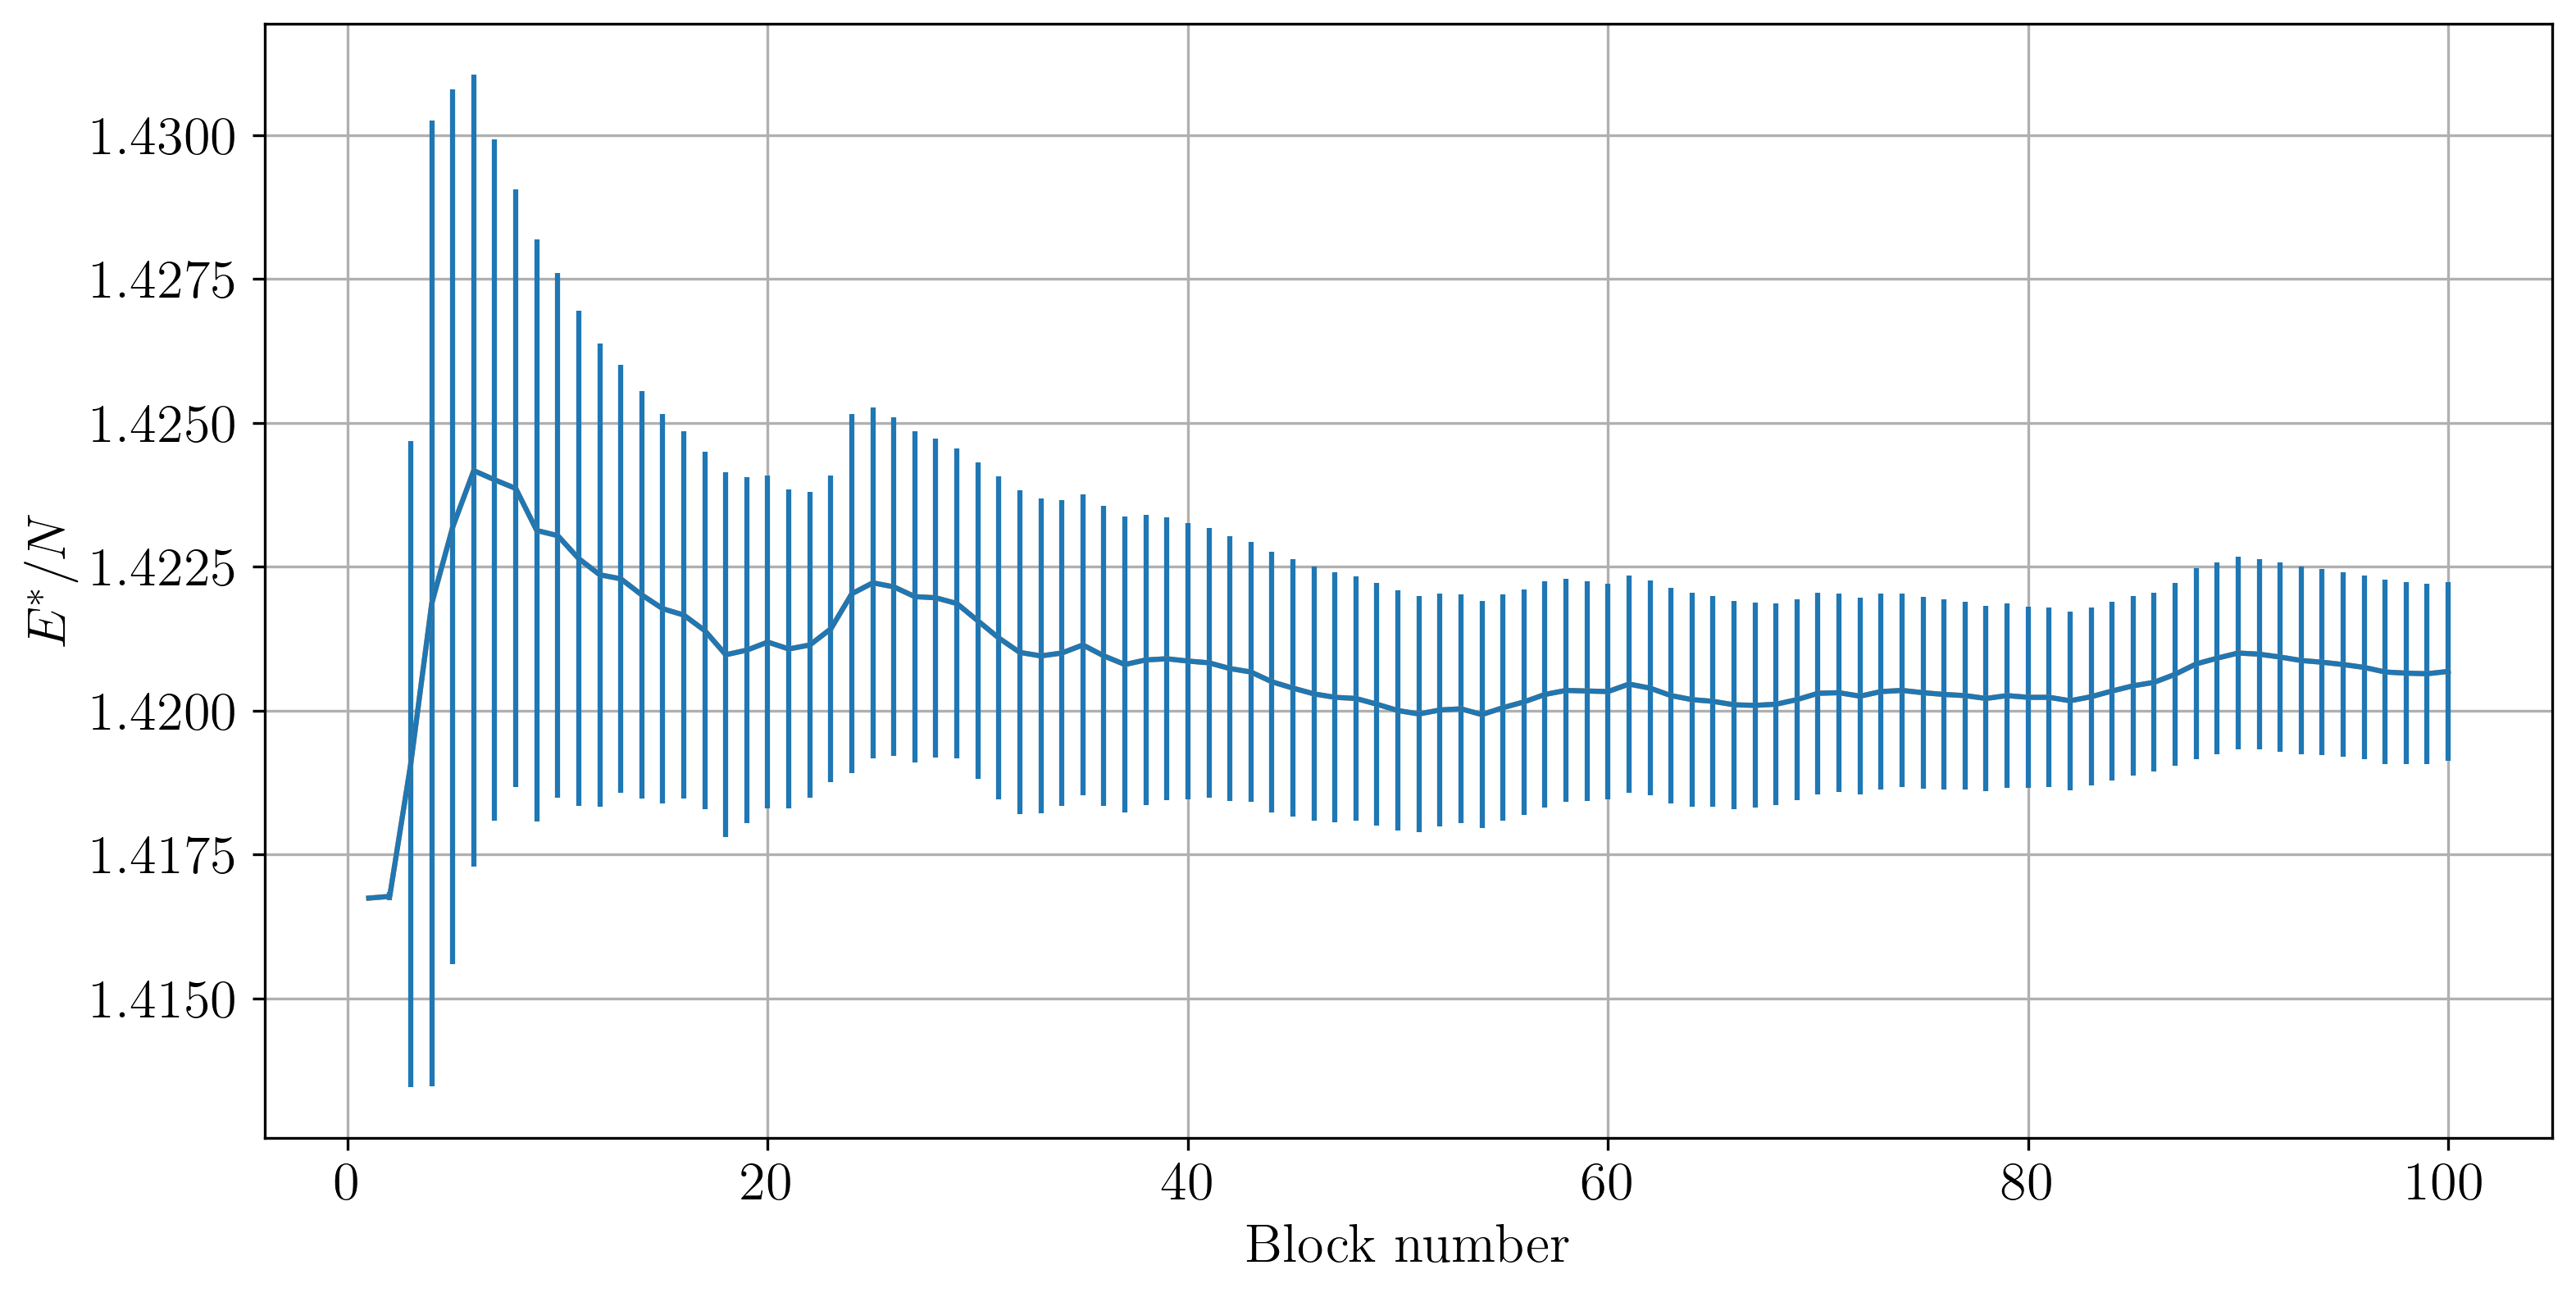

In [9]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/gas_output_temp.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f1)+1)
l = np.arange(-1,len(f1)+2)
plt.errorbar(x,g1,yerr=3*error1)
plt.fill_between(l, 1.188, 1.212, color='lightblue')
plt.xlabel('Block number')
plt.ylabel('$T^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/gas_output_pres.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f2)+1)
plt.errorbar(x,g2,yerr=3*error2)
plt.plot(x,g2)
plt.xlabel('Block number')
plt.ylabel('$P^*$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/gas_output_ekin.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f3)+1)
plt.errorbar(x,g3,yerr=3*error3)
plt.plot(x,g3)
plt.xlabel('Block number')
plt.ylabel('$K^*/N$')
plt.grid(True)

plt.show()

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f4, g4, error4 = np.loadtxt("MDNVE_MCNVT/data/gas_output_epot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f4)+1)
plt.errorbar(x,g4,yerr=3*error4)
plt.plot(x,g4)
plt.xlabel('Block number')
plt.ylabel('$U^*/N$')
plt.grid(True)

plt.subplots(1, 1, figsize=(12,6), dpi=300)

f5, g5, error5 = np.loadtxt("MDNVE_MCNVT/data/gas_output_etot.dat", usecols=(1,2,3), unpack='true')
x = np.arange(1, len(f5)+1)
plt.errorbar(x,g5,yerr=3*error5)
plt.plot(x,g5)
plt.xlabel('Block number')
plt.ylabel('$E^*/N$')
plt.grid(True)

plt.show()

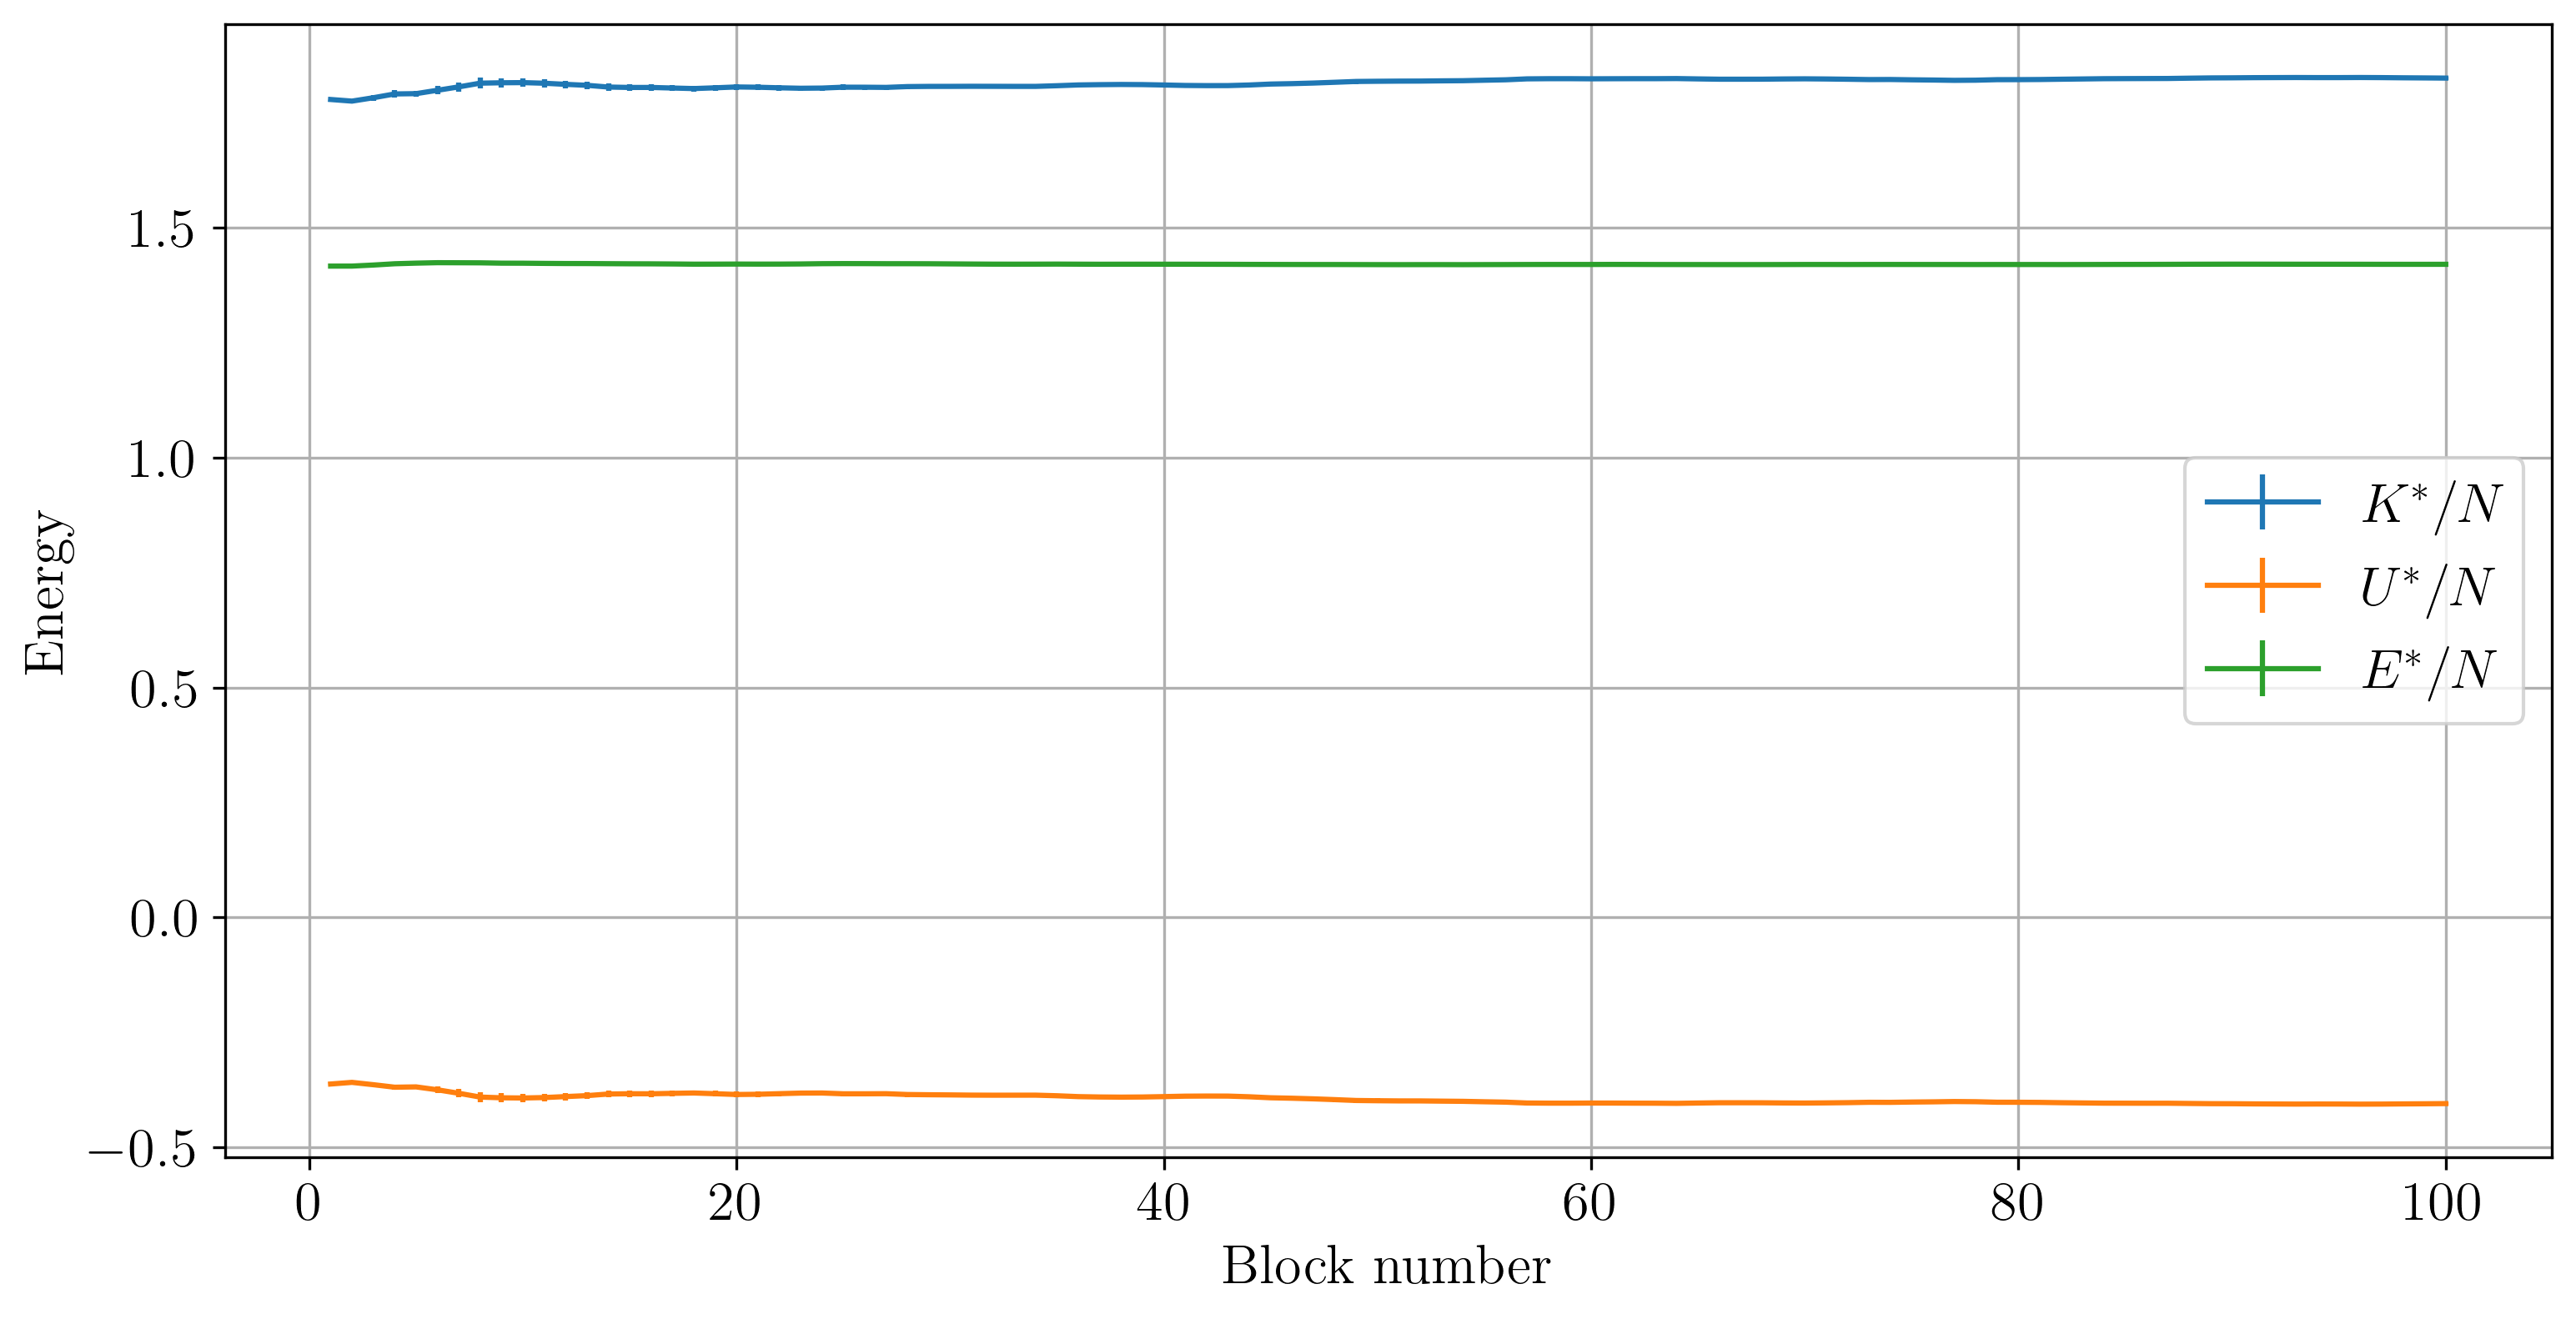

In [10]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

f1, g1, error1 = np.loadtxt("MDNVE_MCNVT/data/gas_output_ekin.dat", usecols=(1,2,3), unpack='true')
f2, g2, error2 = np.loadtxt("MDNVE_MCNVT/data/gas_output_epot.dat", usecols=(1,2,3), unpack='true')
f3, g3, error3 = np.loadtxt("MDNVE_MCNVT/data/gas_output_etot.dat", usecols=(1,2,3), unpack='true')

x = np.arange(1, len(f1)+1)
plt.errorbar(x,g1,yerr=error1,label="$K^*/N$")
plt.errorbar(x,g2,yerr=error2,label="$U^*/N$")
plt.errorbar(x,g3,yerr=error3,label="$E^*/N$")
plt.xlabel('Block number')
plt.ylabel('Energy')
plt.grid(True)

plt.legend()

plt.show()